<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-MC-Results" data-toc-modified-id="Loading-MC-Results-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading MC Results</a></span></li><li><span><a href="#Constants" data-toc-modified-id="Constants-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Magmatic-Outgassing" data-toc-modified-id="Magmatic-Outgassing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Magmatic Outgassing</a></span></li><li><span><a href="#Oxygen-Fugacity" data-toc-modified-id="Oxygen-Fugacity-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Oxygen Fugacity</a></span></li><li><span><a href="#Outgassing-Flux-Calculation" data-toc-modified-id="Outgassing-Flux-Calculation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Outgassing Flux Calculation</a></span></li><li><span><a href="#Example-(JKT)" data-toc-modified-id="Example-(JKT)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Example (JKT)</a></span></li><li><span><a href="#Integrating-through-Column-of-Crust" data-toc-modified-id="Integrating-through-Column-of-Crust-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Integrating through Column of Crust</a></span><ul class="toc-item"><li><span><a href="#Solidus-Function" data-toc-modified-id="Solidus-Function-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Solidus Function</a></span></li></ul></li><li><span><a href="#Exploring-the-Parameter-Space" data-toc-modified-id="Exploring-the-Parameter-Space-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exploring the Parameter Space</a></span></li><li><span><a href="#Explore-All-Parameters-At-Once" data-toc-modified-id="Explore-All-Parameters-At-Once-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Explore All Parameters At Once</a></span><ul class="toc-item"><li><span><a href="#Full-Calculation" data-toc-modified-id="Full-Calculation-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Full Calculation</a></span><ul class="toc-item"><li><span><a href="#Constant-Temperature" data-toc-modified-id="Constant-Temperature-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>Constant Temperature</a></span></li><li><span><a href="#Calculate-Mean-Arrays" data-toc-modified-id="Calculate-Mean-Arrays-9.1.2"><span class="toc-item-num">9.1.2&nbsp;&nbsp;</span>Calculate Mean Arrays</a></span></li><li><span><a href="#Plot-Outgassing-Fluxes" data-toc-modified-id="Plot-Outgassing-Fluxes-9.1.3"><span class="toc-item-num">9.1.3&nbsp;&nbsp;</span>Plot Outgassing Fluxes</a></span></li></ul></li></ul></li></ul></div>

In [2]:
import numpy as np
import pandas as pd 
from scipy import optimize
import sys
import random


%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
plt.rc("savefig", dpi=300)
plt.rc('figure', dpi=300)
plt.rc('text', usetex=True)
plt.rc('font', size=12)
plt.rc('xtick', direction='in') 
plt.rc('ytick', direction='in')
plt.rc('xtick.major', pad=5) 
plt.rc('xtick.minor', pad=5)
plt.rc('ytick.major', pad=5) 
plt.rc('ytick.minor', pad=5)
plt.rc('lines', dotted_pattern = [0.5, 1.1])

font={'weight':'bold',
     'size': 12}
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (7,5)

## Loading MC Results 

In [3]:
#Note loading these results now allows you to skip steps 1 - 9 and go straight to plotting. But the below code will generate these files
IW_RES_Full = pd.read_csv('IW_RES_Full.csv', header=0)
IWm1_RES_Full = pd.read_csv('IWm1_RES_Full.csv', header=0)
IWm2_RES_Full = pd.read_csv('IWm2_RES_Full.csv', header=0)
IWm3_RES_Full = pd.read_csv('IWm3_RES_Full.csv', header=0)
IWm5_RES_Full = pd.read_csv('IWm5_RES_Full.csv', header=0)
IWm11_RES_Full = pd.read_csv('IWm11_RES_Full.csv', header=0)

IWp1_RES_Full = pd.read_csv('IWp1_RES_Full.csv', header=0)
IWp2_RES_Full = pd.read_csv('IWp2_RES_Full.csv', header=0)
IWp3_RES_Full = pd.read_csv('IWp3_RES_Full.csv', header=0)
IWp4_RES_Full = pd.read_csv('IWp4_RES_Full.csv', header=0)
IWp5_RES_Full = pd.read_csv('IWp5_RES_Full.csv', header=0)


In [4]:
IW_RES_Full_ConstantT = pd.read_csv('IW_RES_Full_ConstantT.csv', header=0)
IWm1_RES_Full_ConstantT = pd.read_csv('IWm1_RES_Full_ConstantT.csv', header=0)
IWm2_RES_Full_ConstantT = pd.read_csv('IWm2_RES_Full_ConstantT.csv', header=0)
IWm3_RES_Full_ConstantT = pd.read_csv('IWm3_RES_Full_ConstantT.csv', header=0)
IWm11_RES_Full_ConstantT = pd.read_csv('IWm11_RES_Full_ConstantT.csv', header=0)

IWp1_RES_Full_ConstantT = pd.read_csv('IWp1_RES_Full_ConstantT.csv', header=0)
IWp2_RES_Full_ConstantT = pd.read_csv('IWp2_RES_Full_ConstantT.csv', header=0)
IWp3_RES_Full_ConstantT = pd.read_csv('IWp3_RES_Full_ConstantT.csv', header=0)
IWp4_RES_Full_ConstantT = pd.read_csv('IWp4_RES_Full_ConstantT.csv', header=0)
IWp5_RES_Full_ConstantT = pd.read_csv('IWp5_RES_Full_ConstantT.csv', header=0)

In [8]:
print(IWm1_RES_Full.Remaining_graphite/IWm1_RES_Full.Original_carbon)

0        0.976292
1        0.976263
2        0.976235
3        0.976207
4        0.976180
5        0.976153
6        0.976125
7        0.976099
8        0.976072
9        0.976046
10       0.976019
11       0.975993
12       0.975968
13       0.975942
14       0.975917
15       0.975892
16       0.975867
17       0.975843
18       0.975818
19       0.975794
20       0.975770
21       0.975746
22       0.975723
23       0.975700
24       0.975677
25       0.975654
26       0.975631
27       0.975609
28       0.975587
29       0.975565
           ...   
50970    0.999971
50971    0.999971
50972    0.999971
50973    0.999971
50974    0.999971
50975    0.999971
50976    0.999971
50977    0.999971
50978    0.999971
50979    0.999971
50980    0.999971
50981    0.999971
50982    0.999971
50983    0.999971
50984    0.999971
50985    0.999971
50986    0.999971
50987    0.999971
50988    0.999970
50989    0.999970
50990    0.999970
50991    0.999970
50992    0.999970
50993    0.999970
50994    0

In [5]:
def system(y):
    ln_x_H2O,ln_x_CO2,ln_H2O,ln_CO2,alphaG,ln_H2,ln_CH4,ln_CO = y
    return (np.exp(ln_H2O)+np.exp(ln_CO2)+np.exp(ln_H2)+np.exp(ln_CH4)+np.exp(ln_CO)-P,\
            -ln_x_CO2+np.exp(ln_x_H2O)*d_H2O+a_CO2*ln_CO2+F1,\
            -ln_x_H2O+a_H2O*ln_H2O+F2,\
            -xH2Otot*P + (np.exp(ln_H2O)+np.exp(ln_H2)+2*np.exp(ln_CH4))*alphaG+(1-alphaG)*np.exp(ln_x_H2O)*P,\
            -xCO2tot*P + (np.exp(ln_CO2)+np.exp(ln_CO)+np.exp(ln_CH4))*alphaG+(1-alphaG)*np.exp(ln_x_CO2)*P,\
            np.log(C1)+ln_H2O-ln_H2,\
            np.log(C2)+ln_CO2-ln_CO,\
            np.log(C3)+ln_CO2+2*ln_H2O-ln_CH4)


def system1(y,d_H2O,a_H2O,C1,C2,C3,P,a_CO2,F1,F2,xH2Otot,xCO2tot):
    ln_x_H2O,ln_x_CO2,ln_H2O,ln_CO2,lnalphaG,ln_H2,ln_CH4,ln_CO = y
    return (np.exp(ln_H2O)+np.exp(ln_CO2)+np.exp(ln_H2)+np.exp(ln_CH4)+np.exp(ln_CO)-P,\
            -ln_x_CO2+np.exp(ln_x_H2O)*d_H2O+a_CO2*ln_CO2+F1,\
            -ln_x_H2O+a_H2O*ln_H2O+F2,\
            -xH2Otot*P + (np.exp(ln_H2O)+np.exp(ln_H2)+2*np.exp(ln_CH4))*np.exp(lnalphaG)+(1-np.exp(lnalphaG))*np.exp(ln_x_H2O)*P,\
            -xCO2tot*P + (np.exp(ln_CO2)+np.exp(ln_CO)+np.exp(ln_CH4))*np.exp(lnalphaG)+(1-np.exp(lnalphaG))*np.exp(ln_x_CO2)*P,\
            np.log(C1)+ln_H2O-ln_H2,\
            np.log(C2)+ln_CO2-ln_CO,\
            np.log(C3)+ln_CO2+2*ln_H2O-ln_CH4)

#@jit(nopython=True) #updated from Nick's website 6/23
def equation(PCO2,F1,a_CO2,P,C1,C2,C3,xCO2tot,F2,a_H2O,xH2Otot):
    return ( -1 * ( np.e )**( ( F1 + a_CO2 * np.log( PCO2 ) ) ) * ( P )**( -1 ) \
            * ( P + ( -1 * PCO2 + -1 * C2 * PCO2 ) ) * ( ( 1 + ( C1 + C3 * PCO2 ) \
            ) )**( -1 ) + ( ( P )**( -1 ) * ( P + ( -1 * PCO2 + -1 * C2 * PCO2 ) \
            ) * ( ( 1 + ( C1 + C3 * PCO2 ) ) )**( -1 ) * xCO2tot + ( -1 * ( np.e \
            )**( ( F2 + a_H2O * np.log( (P-PCO2-C2*PCO2)/(1+C1+C3*PCO2) ) ) ) * ( -1 * ( P )**( -1 ) * PCO2 + \
            xCO2tot ) + ( ( np.e )**( ( F1 + a_CO2 * np.log( PCO2 ) ) ) * xH2Otot \
            + -1 * ( P )**( -1 ) * PCO2 * xH2Otot ) ) ) )            

#@jit(nopython=True)
def jacob(y,d_H2O,a_H2O,C1,C2,C3,P,a_CO2,F1,F2,xH2Otot,xCO2tot):
    lnxH2O,lnxCO2,lnPH2O,lnPCO2,alphaG,lnPH2,lnPCH4,lnPCO = y
    return np.array( [np.array( [0,0,( np.e )**( lnPH2O ),( np.e )**( lnPCO2 \
            ),0,( np.e )**( lnPH2 ),( np.e )**( lnPCH4 ),( np.e )**( lnPCO ),] \
            ),np.array( [d_H2O * ( np.e )**( lnxH2O ),-1,0,a_CO2,0,0,0,0,] \
            ),np.array( [-1,0,a_H2O,0,0,0,0,0,] ),np.array( [( 1 + -1 * alphaG ) * \
            ( np.e )**( lnxH2O ) * P,0,alphaG * ( np.e )**( lnPH2O ),0,( 2 * ( \
            np.e )**( lnPCH4 ) + ( ( np.e )**( lnPH2 ) + ( ( np.e )**( lnPH2O ) + \
            -1 * ( np.e )**( lnxH2O ) * P ) ) ),alphaG * ( np.e )**( lnPH2 ),2 * \
            alphaG * ( np.e )**( lnPCH4 ),0,] ),np.array( [0,( 1 + -1 * alphaG ) \
            * ( np.e )**( lnxCO2 ) * P,0,alphaG * ( np.e )**( lnPCO2 ),( ( np.e \
            )**( lnPCH4 ) + ( ( np.e )**( lnPCO ) + ( ( np.e )**( lnPCO2 ) + -1 * \
            ( np.e )**( lnxCO2 ) * P ) ) ),0,alphaG * ( np.e )**( lnPCH4 ),alphaG \
            * ( np.e )**( lnPCO ),] ),np.array( [0,0,1,0,0,-1,0,0,] ),np.array( \
            [0,0,0,1,0,0,0,-1,] ),np.array( [0,0,2,1,0,0,-1,0,] ),] )


## Constants 

In [6]:
###### Solubility constants
# H2O solubility
# Constants from figure table 6 in Iacono-Marziano et al. 2012. Using Anhydrous constants
a_H2O = 0.54
b_H2O = 1.24
B_H2O = -2.95
C_H2O = 0.02

# CO2 Solubility
# Constants from table 5 in Iacono-Marziano et al. 2012. Using anhydrous
d_H2O = 2.3
d_AI = 3.8
d_FeO_MgO = -16.3
d_Na2O_K2O = 20.1
a_CO2 = 1
b_CO2 = 15.8
C_CO2 = 0.14
B_CO2 = -5.3

# Mass fractions of different species in Mt. Etna magma.
# From Table 1 in Iacono-Marziano et al. 2012.
m_SiO2 = 0.4795
m_TiO2 = 0.0167
m_Al2O3 = 0.1732
m_FeO = 0.1024
m_MgO = 0.0576
m_CaO = 0.1093
m_Na2O = 0.034
m_K2O = 0.0199
m_P2O5 = 0.0051

# molar masses in g/mol
M_SiO2 = 60
M_TiO2 = 79.866
M_Al2O3 = 101.96
M_FeO = 71.844
M_MgO = 40.3044
M_CaO = 56
M_Na2O = 61.97
M_K2O = 94.2
M_P2O5 = 141.94
M_H2O = 18.01528
M_CO2 = 44.01

## Magmatic Outgassing

In [7]:
def solve_gases_edited(T,P,f_O2,mCO2tot,mH2Otot):
    '''
    This function solves for the speciation of gases produced by
    a volcano. This code assumes magma composition of the lava erupting at
    Mt. Etna Italy.

    Inputs:
    T = temperature of the magma and gas in kelvin
    P = pressure of the gas in bar
    f_O2 = oxygen fugacity of the melt
    mCO2tot = mass fraction of CO2 in the magma
    mH2Otot = mass fraction of H2O in the magma

    Outputs:
    an array which contains
    [PH2O, PH2, PCO2, PCO, PCH4, alphaG, xCO2, xH2O, mH2O,mH2,mCO2,mCO,mCH4,mO2]
     where
     PH2O = partial pressure of H2O in the gas in bar
     PH2 = partial pressure of H2 in the gas in bar
     PCO2 = partial pressure of CO2 in the gas in bar
     PCO = partial pressure of CO in the gas in bar
     PCH4 = partial pressure of CH4 in the gas in bar
     alphaG = moles of gas divide by total moles in gas and magma combined
     xCO2 = mol fraction of the CO2 in the magma
     xH2O = mol fraction of the H2O in the magma
     mH2O = fraction of H2O gas (mixing ratio), mH2O = PH2O/P
     mH2 = fraction of H2 gas (mixing ratio), mH2 = pH2/P etc.
     mCO2 = fraction of CO2 gas (mixing ratio)
     mCO = fraction of CO gas (mixing ratio)
     mCH4 = fraction of CH4 gas (mixing ratio)
     mO2 = fraction of O2 gas (mixing ratio, what you put in)
    '''

    ###### Solubility constants
    F1 = -14.234368891317805
    F2 = -5.925014547418225
    a_H2O = 0.54
    a_CO2 = 1
    d_H2O = 2.3

    # mol of magma/g of magma
    x = 0.01550152865954013

    # molar mass in g/mol
    M_H2O = 18.01528
    M_CO2 = 44.01

## new from Nick
    A1 = -0.4200250000201988
    A2 = -2.59560737813789
    M_CO2 = 44.01
    C_CO2 = 0.14
    C_H2O = 0.02
    F1 = np.log(1/(M_CO2*x*10**6))+C_CO2*P/T+A1
    F2 = np.log(1/(M_H2O*x*100))+C_H2O*P/T+A2
###
    # calculate mol fraction of CO2 and H2O in the magma
    xCO2tot=(mCO2tot/M_CO2)/x
    xH2Otot=(mH2Otot/M_H2O)/x

    # equilibrium constants
    # made with Nasa thermodynamic database (Burcat database)
    K1 = np.exp(-29755.11319228574/T+6.652127716162998)
    K2 = np.exp(-33979.12369002451/T+10.418882755464773)
    K3 = np.exp(-96444.47151911151/T+0.22260815074146403)

    #constants
    C1 = K1/f_O2**0.5
    C2 = K2/f_O2**0.5
    C3 = K3/f_O2**2

    Plim = np.exp( (np.log(xCO2tot) - F1 - d_H2O*xH2Otot)/a_CO2) + np.exp( (np.log(xH2Otot) - F2)/a_H2O)
    if  P > 1.2*Plim:
        #print ('Pressure exceeds analytic solubility limit - no outgassing')
        #print (Plim,P,xCO2tot,xH2Otot,mCO2tot,mH2Otot)
        return (0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 )

    # Now solve simple system
    find = np.logspace(np.log10(P),-15,1000)
    find2 = np.logspace(-15,np.log10(P),1000)
    for i in range(0,len(find)):

        #print (i,find[i],P)
        #print (C1,C2,C3)
        #print (f_O2)
        if np.isnan(equation(find[i],F1,a_CO2,P,C1,C2,C3,xCO2tot,F2,a_H2O,xH2Otot))==False:
            found_high = find[i]
            #print ('yikes')
            break
    for i in range(0,len(find2)):
        if np.isnan(equation(find2[i],F1,a_CO2,P,C1,C2,C3,xCO2tot,F2,a_H2O,xH2Otot))==False:
            found_low = find2[i]
            #print ('here wat')
            break
    try:
        sol = optimize.root(equation,found_high,args=(F1,a_CO2,P,C1,C2,C3,xCO2tot,F2,a_H2O,xH2Otot),method='lm')
        if sol['success']==False:
            #print ('here tho')
            sys.exit()
    except:
        sol = optimize.root(equation,found_low,args=(F1,a_CO2,P,C1,C2,C3,xCO2tot,F2,a_H2O,xH2Otot),method='lm')
        if sol['success']==False:
            #print ('con oops')
            sys.exit('Convergence issues! First optimization. (1)')

    P_CO2 = sol['x'][0]
    # Solve for the rest of the variables in the simple system
    P_CO = C2*P_CO2
    x_CO2 = np.exp(F1+a_CO2*np.log(P_CO2))
    alphaG = P*(x_CO2-xCO2tot)/(-P_CO2+P*x_CO2)
    P_H2O = (P-P_CO2-C2*P_CO2)/(1+C1+C3*P_CO2)
    P_H2 = C1*P_H2O
    P_CH4 = C3*P_CO2*P_H2O**2
    x_H2O = np.exp(F2+a_H2O*np.log(P_H2O))
    # use different alphaG as inital guess
    alphaG = .1

    # now use the solution of the simple system to solve the
    # harder problem. I will try to solve it two different ways to
    # make sure I avoid errors.

    # error tolerance
    #tol = 1e-7 #Original Value
    tol=1e-6

    try: 
        init_cond = [np.log(x_H2O),np.log(x_CO2),np.log(P_H2O),np.log(P_CO2),alphaG,np.log(P_H2),np.log(P_CH4),np.log(P_CO)]
        sol = optimize.root(system,init_cond,args = (d_H2O,a_H2O,C1,C2,C3,P,a_CO2,F1,F2,xH2Otot,xCO2tot),method='lm',options={'maxiter': 100000})#,jac=jacob)
        error = np.linalg.norm(system(sol['x'],d_H2O,a_H2O,C1,C2,C3,P,a_CO2,F1,F2,xH2Otot,xCO2tot))
        if error>tol or sol['success']==False:
            #print ('con here')
            sys.exit('Convergence issues! (2)')

        ln_x_H2O,ln_x_CO2,ln_P_H2O,ln_P_CO2,alphaG,ln_P_H2,ln_P_CH4,ln_P_CO = sol['x']

        if alphaG<0:
            #print ('con there')
            sys.exit('alphaG is negative')
    except:
        alphaG = .1
        init_cond1 = [np.log(x_H2O),np.log(x_CO2),np.log(P_H2O),np.log(P_CO2),np.log(alphaG),np.log(P_H2),np.log(P_CH4),np.log(P_CO)]
        sol1 = optimize.root(system1,init_cond1,args = (d_H2O,a_H2O,C1,C2,C3,P,a_CO2,F1,F2,xH2Otot,xCO2tot),method='lm',options={'maxiter': 10000000})#,jac=jacob1)
        #print(sol1['success'])
        error1 = np.linalg.norm(system1(sol1['x'],d_H2O,a_H2O,C1,C2,C3,P,a_CO2,F1,F2,xH2Otot,xCO2tot))
        ln_x_H2O,ln_x_CO2,ln_P_H2O,ln_P_CO2,ln_alphaG,ln_P_H2,ln_P_CH4,ln_P_CO = sol1['x']
        alphaG = np.exp(ln_alphaG)
        print (alphaG)
        if (error1>tol and alphaG>1e-4 and alphaG<1.0) or sol1['success']==False:
            #print('Error:', error1)
            #print('Sol1:', sol1)
            sys.exit('Convergence issues! (3)')
        if error1>tol:
            print('warning: outgassing equations not solved to high tolerance')
            return (0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 )

    return (np.exp(ln_P_H2O),np.exp(ln_P_H2),np.exp(ln_P_CO2),np.exp(ln_P_CO),\
            np.exp(ln_P_CH4),alphaG,np.exp(ln_x_CO2),np.exp(ln_x_H2O),np.exp(ln_P_H2O)/P,np.exp(ln_P_H2)/P,np.exp(ln_P_CO2)/P,np.exp(ln_P_CO)/P,\
            np.exp(ln_P_CH4)/P,f_O2/P )


In [31]:
def solve_gases(T,P,f_O2,mCO2tot,mH2Otot):
    '''
    This function solves for the speciation of gases produced by
    a volcano. This code assumes magma composition of the lava erupting at
    Mt. Etna Italy.

    Inputs:
    T = temperature of the magma and gas in kelvin
    P = pressure of the gas in bar
    f_O2 = oxygen fugacity of the melt
    mCO2tot = mass fraction of CO2 in the magma
    mH2Otot = mass fraction of H2O in the magma

    Outputs:
    an array which contains
    [PH2O, PH2, PCO2, PCO, PCH4, alphaG, xCO2, xH2O, mH2O,mH2,mCO2,mCO,mCH4,mO2]
     where
     PH2O = partial pressure of H2O in the gas in bar
     PH2 = partial pressure of H2 in the gas in bar
     PCO2 = partial pressure of CO2 in the gas in bar
     PCO = partial pressure of CO in the gas in bar
     PCH4 = partial pressure of CH4 in the gas in bar
     alphaG = moles of gas divide by total moles in gas and magma combined
     xCO2 = mol fraction of the CO2 in the magma
     xH2O = mol fraction of the H2O in the magma
     mH2O = fraction of H2O gas (mixing ratio), mH2O = PH2O/P
     mH2 = fraction of H2 gas (mixing ratio), mH2 = pH2/P etc.
     mCO2 = fraction of CO2 gas (mixing ratio)
     mCO = fraction of CO gas (mixing ratio)
     mCH4 = fraction of CH4 gas (mixing ratio)
     mO2 = fraction of O2 gas (mixing ratio, what you put in)
    '''
    #print('CO2 Mass Fraction:',mCO2tot)
    #print('H2O Mass Fraction:',mH2Otot)
    ###### Solubility constants
    F1 = -14.234368891317805
    F2 = -5.925014547418225
    a_H2O = 0.54
    a_CO2 = 1
    d_H2O = 2.3

    # mol of magma/g of magma
    x = 0.01550152865954013

    # molar mass in g/mol
    M_H2O = 18.01528
    M_CO2 = 44.01

## new from Nick
    A1 = -0.4200250000201988
    A2 = -2.59560737813789
    M_CO2 = 44.01
    C_CO2 = 0.14
    C_H2O = 0.02
    F1 = np.log(1/(M_CO2*x*10**6))+C_CO2*P/T+A1
    F2 = np.log(1/(M_H2O*x*100))+C_H2O*P/T+A2
###
    # calculate mol fraction of CO2 and H2O in the magma
    xCO2tot=(mCO2tot/M_CO2)/x
    xH2Otot=(mH2Otot/M_H2O)/x

    # equilibrium constants
    # made with Nasa thermodynamic database (Burcat database)
    K1 = np.exp(-29755.11319228574/T+6.652127716162998)
    K2 = np.exp(-33979.12369002451/T+10.418882755464773)
    K3 = np.exp(-96444.47151911151/T+0.22260815074146403)

    #constants
    C1 = K1/f_O2**0.5
    C2 = K2/f_O2**0.5
    C3 = K3/f_O2**2

    Plim = np.exp( (np.log(xCO2tot) - F1 - d_H2O*xH2Otot)/a_CO2) + np.exp( (np.log(xH2Otot) - F2)/a_H2O)
    if  P > 1.2*Plim:
        #print ('Pressure exceeds analytic solubility limit - no outgassing')
        #print (Plim,P,xCO2tot,xH2Otot,mCO2tot,mH2Otot)
        return (0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 )

    # Now solve simple system
    find = np.logspace(np.log10(P),-15,1000)
    find2 = np.logspace(-15,np.log10(P),1000)
    for i in range(0,len(find)):

        #print (i,find[i],P)
        #print (C1,C2,C3)
        #print (f_O2)
        if np.isnan(equation(find[i],F1,a_CO2,P,C1,C2,C3,xCO2tot,F2,a_H2O,xH2Otot))==False:
            found_high = find[i]
            #print ('yikes')
            break
    for i in range(0,len(find2)):
        if np.isnan(equation(find2[i],F1,a_CO2,P,C1,C2,C3,xCO2tot,F2,a_H2O,xH2Otot))==False:
            found_low = find2[i]
            #print ('here wat')
            break
    try:
        sol = optimize.root(equation,found_high,args=(F1,a_CO2,P,C1,C2,C3,xCO2tot,F2,a_H2O,xH2Otot),method='lm')
        if sol['success']==False:
            #print ('here tho')
            sys.exit()
    except:
        sol = optimize.root(equation,found_low,args=(F1,a_CO2,P,C1,C2,C3,xCO2tot,F2,a_H2O,xH2Otot),method='lm')
        if sol['success']==False:
            #print ('con oops')
            sys.exit('Convergence issues! First optimization.')

    P_CO2 = sol['x'][0]
    # Solve for the rest of the variables in the simple system
    P_CO = C2*P_CO2
    x_CO2 = np.exp(F1+a_CO2*np.log(P_CO2))
    alphaG = P*(x_CO2-xCO2tot)/(-P_CO2+P*x_CO2)
    P_H2O = (P-P_CO2-C2*P_CO2)/(1+C1+C3*P_CO2)
    P_H2 = C1*P_H2O
    P_CH4 = C3*P_CO2*P_H2O**2
    x_H2O = np.exp(F2+a_H2O*np.log(P_H2O))
    # use different alphaG as inital guess
    alphaG = .1

    # now use the solution of the simple system to solve the
    # harder problem. I will try to solve it two different ways to
    # make sure I avoid errors.

    # error tolerance
    #tol = 1e-7
    tol=1.1e-5

    try: 
        init_cond = [np.log(x_H2O),np.log(x_CO2),np.log(P_H2O),np.log(P_CO2),alphaG,np.log(P_H2),np.log(P_CH4),np.log(P_CO)]
        sol = optimize.root(system,init_cond,args = (d_H2O,a_H2O,C1,C2,C3,P,a_CO2,F1,F2,xH2Otot,xCO2tot),method='lm',options={'maxiter': 10000})#,jac=jacob)
        error = np.linalg.norm(system(sol['x'],d_H2O,a_H2O,C1,C2,C3,P,a_CO2,F1,F2,xH2Otot,xCO2tot))
        if error>tol or sol['success']==False:
            #print ('con here')
            sys.exit('Convergence issues! 2')

        ln_x_H2O,ln_x_CO2,ln_P_H2O,ln_P_CO2,alphaG,ln_P_H2,ln_P_CH4,ln_P_CO = sol['x']

        if alphaG<0:
            #print ('con there')
            sys.exit('alphaG is negative')
    except:
        alphaG = .1
        init_cond1 = [np.log(x_H2O),np.log(x_CO2),np.log(P_H2O),np.log(P_CO2),np.log(alphaG),np.log(P_H2),np.log(P_CH4),np.log(P_CO)]
        sol1 = optimize.root(system1,init_cond1,args = (d_H2O,a_H2O,C1,C2,C3,P,a_CO2,F1,F2,xH2Otot,xCO2tot),method='lm',options={'maxiter': 10000000})#,jac=jacob1)
        #print(sol1['success'])
        #print(sol1['message'])
        error1 = np.linalg.norm(system1(sol1['x'],d_H2O,a_H2O,C1,C2,C3,P,a_CO2,F1,F2,xH2Otot,xCO2tot))
        ln_x_H2O,ln_x_CO2,ln_P_H2O,ln_P_CO2,ln_alphaG,ln_P_H2,ln_P_CH4,ln_P_CO = sol1['x']
        alphaG = np.exp(ln_alphaG)
        #print (alphaG)
        if (error1>tol and alphaG>1e-4 and alphaG<1.0) or sol1['success']==False:
            print('Error1:', error1)
            #print('alphaG:', alphaG)
            sys.exit('Convergence issues! 3')
        if error1>tol:
            #print('warning: outgassing equations not solved to high tolerance')
            return (0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 )

    return (np.exp(ln_P_H2O),np.exp(ln_P_H2),np.exp(ln_P_CO2),np.exp(ln_P_CO),\
            np.exp(ln_P_CH4),alphaG,np.exp(ln_x_CO2),np.exp(ln_x_H2O),np.exp(ln_P_H2O)/P,np.exp(ln_P_H2)/P,np.exp(ln_P_CO2)/P,np.exp(ln_P_CO)/P,\
            np.exp(ln_P_CH4)/P,f_O2/P )


## Oxygen Fugacity 

In [9]:
def buffer_fO2(T,Press,redox_buffer): # T in K, P in bar
    if redox_buffer == 'FMQ':
        [A,B,C] = [25738.0, 9.0, 0.092]
    elif redox_buffer == 'IW':
        [A,B,C] = [27215 ,6.57 ,0.0552]
    elif redox_buffer == 'MH':
        [A,B,C] = [25700.6,14.558,0.019] # from Frost
    else:
        print ('error, no such redox buffer')
        return -999
    return 10**(-A/T + B + C*(Press-1)/T) #returns oxygen fugacity in bar

## Outgassing Flux Calculation 

In [10]:
def outgas_flux_cal(Temp,Pressure,pO2,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,M_MELT,Total_Fe,F): 
    #M_MELT is planetary melt production in g/s, Pressure in Pa, Temp in K, pO2 in bar, mantle_mass in kg, mantle_CO2_mass in kg, mantle_H2O_mass in kg, F is melt fraction (0-1)
    if (mantle_CO2_mass<0.0)or(mantle_H2O_mass<0)or(Pressure<0):
        print ('Nothing in the mantle!')
        return [0.0,0.0,0.0,0.0,0.0,0.0]
   
    x = 0.01550152865954013
    M_H2O = 18.01528
    M_CO2 = 44.01

    XH2O_melt_max = x*M_H2O*0.499 # half of mol fraction allowed to be H2O
    XCO2_melt_max = x*M_CO2*0.499 # half of mol fraction allowed to be CO2

    ## Compute batch melting with standard partition coefficients for CO2 and water i.e. how concentrated is H2O and CO2 in the melt, for a given melt fraction, F:
    XH2O_melt = np.min([0.99*XH2O_melt_max,(1- (1-F)**(1/0.01)) * (mantle_H2O_mass/mantle_mass)/F ]) # mass frac, ensures mass frac never implies all moles volatile!
    XCO2_melt =  np.min([0.99*XCO2_melt_max,(1- (1-F)**(1/2e-3)) * (mantle_CO2_mass/mantle_mass)/F ])# mass frac
    #print (XCO2_melt,'here',mantle_CO2_mass/mantle_mass)

    # If source material reducing, melt will never get this carbon rich due to graphtie saturation. Compute carbon melt concentration assuming graphite saturated:
    graph_on = "y"
    if graph_on == "y":
        log10_K1 = 40.07639 - 2.53932e-2 * Temp + 5.27096e-6*Temp**2 + 0.0267 * (Pressure/1e5 - 1 )/Temp
        log10_K2 = - 6.24763 - 282.56/Temp - 0.119242 * (Pressure/1e5 - 1000)/Temp
        gXCO3_melt = ((10**log10_K1)*(10**log10_K2)*pO2)/(1+(10**log10_K1)*(10**log10_K2)*pO2) #oughly matches Fig. 1b in Scientific Reports
        gXCO2_melt = (44/36.594)*gXCO3_melt / (1 - (1 - 44/36.594)*gXCO3_melt)

        XCO2_melt = np.min([XCO2_melt,gXCO2_melt]) ## Take the minimum of graphite saturated melt concentration, and constant partition coefficient concentration

        # derivation for the above:
        ## XCO3 = (wcO2/44) / [(100-wCO2)/fwm + wCO2/44] Holloway et al. 1992
        ## XCO3 * [(100-wCO2)/fwm + wCO2/44] = (wcO2/44) 
        ## XCO3 * wCO2 [(100/wCO2 - 1)/fwm + 1/44] =  (wcO2/44) 
        ##  [(100/wCO2 - 1)/fwm + 1/44]  = 1/(XCO3 * 44)
        ##  100/wCO2  = fwm * [1/(XCO3 * 44) - 1/44] + 1
        ##  wCO2 =(44/fwm) * 100*XCO3 /  ( [1 - XCO3] + 44/fwm*XCO3) = (44/fwm) * 100*XCO3 / (1-XCO3*(1 - 44/fwm))
        ## wCO2 = (44/fwm) * XCO3 / (1-XCO3*(1 - 44/fwm)) #not wt Percent, matches Scientific Reports with noack

    
    CO2_in_melt = XCO2_melt * M_MELT * F #flux in g/s
    Original_carbon = (mantle_CO2_mass/mantle_mass) * M_MELT #flux in g/s
    Remaining_graphite = Original_carbon - CO2_in_melt #flux in g/s

    #print (CO2_in_melt,Remaining_graphite,Original_carbon)
    #return [CO2_in_melt,Remaining_graphite,Original_carbon] ## flux in g/s

    ##Don't need any of this unless wish to compare to outgassing fluxes: 
    [PH2O, PH2, PCO2, PCO, PCH4, alphaG, xCO2, xH2O, mH2O,mH2,mCO2,mCO,mCH4,mO2] = solve_gases(Temp,Pressure/1e5,pO2,XCO2_melt,XH2O_melt)
    #print('outs',[PH2O, PH2, PCO2, PCO, PCH4, alphaG, xCO2, xH2O, mH2O,mH2,mCO2,mCO,mCH4,mO2])
    if alphaG<0:
        print ('-ve alphaG, outgassing assumed to be zero!')
        return [0.0,0.0,0.0,0.0,0.0,0.0]
    xm = 0.01550152865954013 #mol magma / g magma
    q_H2O = mH2O * alphaG * xm / (1-0*alphaG) #mol gas/g magma 
    q_CO2 = mCO2 * alphaG * xm / (1-0*alphaG)
    q_H2 = mH2 * alphaG * xm / (1-0*alphaG)
    q_CO = mCO * alphaG * xm / (1-0*alphaG)
    q_CH4 = mCH4 * alphaG * xm / (1-0*alphaG)##
##

    if alphaG>1.0: # quick fudge, hopefully will go away when make sure rock pressure used for melt calculation (fixed version):
        #import pdb
        #pdb.set_trace()
        F_H2O = 0.0#XH2O_melt*M_MELT * mH2O/(mH2O+mH2+2*mCH4)
        F_CO2 = 0.0#XCO2_melt * M_MELT * mCO2/(mCO2+mCO)
        F_CO = 0.0#XCO2_melt * M_MELT * mCO/(mCO2+mCO)
        F_H2 = 0.0#XH2O_melt*M_MELT * mH2/(mH2O+mH2+2*mCH4)
        F_CH4 = 0.0#XH2O_melt*M_MELT * 2*mCH4/(mH2O+mH2+2*mCH4)
        O2_consumption = 0.5*F_H2 + 0.5*F_CO + 2 * F_CH4
        print ('weird >1 alphaG')
        return [F_H2O,F_CO2,F_H2,F_CO,F_CH4,O2_consumption]

    F_H2O = M_MELT*F*q_H2O
    F_CO2 = M_MELT*F*q_CO2
    F_H2 = M_MELT*F*q_H2 # H2 + 0.5O2 = H2O
    F_CO = M_MELT*F*q_CO #CO + 0.5O2 = CO2 
    F_CH4 = M_MELT*F*q_CH4 # CH4 + 2O2 = CO2 + 2H2O
    O2_consumption = 0.5*F_H2 + 0.5*F_CO + 2 * F_CH4
    #print (mantle_H2O_mass/mantle_mass,mantle_CO2_mass/mantle_mass)
    #print ('ins',Temp,Pressure/1e5,pO2,XCO2_melt,XH2O_melt,'alphaG',alphaG)
    #print (F_H2O,F_CO2,F_H2,F_CO,F_CH4)
    #if F_H2O>0:
    #    import pdb
    #    pdb.set_trace()
    #print('Methane Flux:', F_CH4)
    return [F_H2O,F_CO2,F_H2, F_CO, F_CH4,O2_consumption,CO2_in_melt,Remaining_graphite,Original_carbon,Temp, Pressure, mantle_mass, mantle_CO2_mass, mantle_H2O_mass, M_MELT, F] # outputs mol/s fluxes of gases, and mol/s O2 consumption
 ##########[mol/s,mol/s,mol/s,mol/s,mol/s,mol/s         ,g/s,       ,g/s,              ,g/s]
    
    

In [32]:
def outgas_flux_cal_og(Temp,Pressure,pO2,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,M_MELT,Total_Fe,F): 
    #M_MELT is planetary melt production in g/s, Pressure in Pa, Temp in K, pO2 in bar, mantle_mass in kg, mantle_CO2_mass in kg, mantle_H2O_mass in kg, F is melt fraction (0-1)
    if (mantle_CO2_mass<0.0)or(mantle_H2O_mass<0)or(Pressure<0):
        print ('Nothing in the mantle!')
        return [0.0,0.0,0.0,0.0,0.0,0.0]
   
    x = 0.01550152865954013
    M_H2O = 18.01528
    M_CO2 = 44.01

    XH2O_melt_max = x*M_H2O*0.499 # half of mol fraction allowed to be H2O
    XCO2_melt_max = x*M_CO2*0.499 # half of mol fraction allowed to be CO2

    ## Compute batch melting with standard partition coefficients for CO2 and water i.e. how concentrated is H2O and CO2 in the melt, for a given melt fraction, F:
    XH2O_melt = np.min([0.99*XH2O_melt_max,(1- (1-F)**(1/0.01)) * (mantle_H2O_mass/mantle_mass)/F ]) # mass frac, ensures mass frac never implies all moles volatile!
    XCO2_melt =  np.min([0.99*XCO2_melt_max,(1- (1-F)**(1/2e-3)) * (mantle_CO2_mass/mantle_mass)/F ])# mass frac
    #print (XCO2_melt,'here',mantle_CO2_mass/mantle_mass)

    # If source material reducing, melt will never get this carbon rich due to graphtie saturation. Compute carbon melt concentration assuming graphite saturated:
    graph_on = "y"
    if graph_on == "y":
        log10_K1 = 40.07639 - 2.53932e-2 * Temp + 5.27096e-6*Temp**2 + 0.0267 * (Pressure/1e5 - 1 )/Temp
        log10_K2 = - 6.24763 - 282.56/Temp - 0.119242 * (Pressure/1e5 - 1000)/Temp
        gXCO3_melt = ((10**log10_K1)*(10**log10_K2)*pO2)/(1+(10**log10_K1)*(10**log10_K2)*pO2) #oughly matches Fig. 1b in Scientific Reports
        gXCO2_melt = (44/36.594)*gXCO3_melt / (1 - (1 - 44/36.594)*gXCO3_melt)

        XCO2_melt = np.min([XCO2_melt,gXCO2_melt]) ## Take the minimum of graphite saturated melt concentration, and constant partition coefficient concentration

        # derivation for the above:
        ## XCO3 = (wcO2/44) / [(100-wCO2)/fwm + wCO2/44] Holloway et al. 1992
        ## XCO3 * [(100-wCO2)/fwm + wCO2/44] = (wcO2/44) 
        ## XCO3 * wCO2 [(100/wCO2 - 1)/fwm + 1/44] =  (wcO2/44) 
        ##  [(100/wCO2 - 1)/fwm + 1/44]  = 1/(XCO3 * 44)
        ##  100/wCO2  = fwm * [1/(XCO3 * 44) - 1/44] + 1
        ##  wCO2 =(44/fwm) * 100*XCO3 /  ( [1 - XCO3] + 44/fwm*XCO3) = (44/fwm) * 100*XCO3 / (1-XCO3*(1 - 44/fwm))
        ## wCO2 = (44/fwm) * XCO3 / (1-XCO3*(1 - 44/fwm)) #not wt Percent, matches Scientific Reports with noack

    
    CO2_in_melt = XCO2_melt * M_MELT * F #flux in g/s
    Original_carbon = (mantle_CO2_mass/mantle_mass) * M_MELT #flux in g/s
    Remaining_graphite = Original_carbon - CO2_in_melt #flux in g/s

    #print (CO2_in_melt,Remaining_graphite,Original_carbon)
    #return [CO2_in_melt,Remaining_graphite,Original_carbon] ## flux in g/s

    ##Don't need any of this unless wish to compare to outgassing fluxes: 
    [PH2O, PH2, PCO2, PCO, PCH4, alphaG, xCO2, xH2O, mH2O,mH2,mCO2,mCO,mCH4,mO2] = solve_gases(Temp,Pressure/1e5,pO2,XCO2_melt,XH2O_melt)
    #print('outs',[PH2O, PH2, PCO2, PCO, PCH4, alphaG, xCO2, xH2O, mH2O,mH2,mCO2,mCO,mCH4,mO2])
    if alphaG<0:
        print ('-ve alphaG, outgassing assumed to be zero!')
        return [0.0,0.0,0.0,0.0,0.0,0.0]
    xm = 0.01550152865954013 #mol magma / g magma
    q_H2O = mH2O * alphaG * xm / (1-0*alphaG) #mol gas/g magma 
    q_CO2 = mCO2 * alphaG * xm / (1-0*alphaG)
    q_H2 = mH2 * alphaG * xm / (1-0*alphaG)
    q_CO = mCO * alphaG * xm / (1-0*alphaG)
    q_CH4 = mCH4 * alphaG * xm / (1-0*alphaG)##
##

    if alphaG>1.0: # quick fudge, hopefully will go away when make sure rock pressure used for melt calculation (fixed version):
        #import pdb
        #pdb.set_trace()
        F_H2O = 0.0#XH2O_melt*M_MELT * mH2O/(mH2O+mH2+2*mCH4)
        F_CO2 = 0.0#XCO2_melt * M_MELT * mCO2/(mCO2+mCO)
        F_CO = 0.0#XCO2_melt * M_MELT * mCO/(mCO2+mCO)
        F_H2 = 0.0#XH2O_melt*M_MELT * mH2/(mH2O+mH2+2*mCH4)
        F_CH4 = 0.0#XH2O_melt*M_MELT * 2*mCH4/(mH2O+mH2+2*mCH4)
        O2_consumption = 0.5*F_H2 + 0.5*F_CO + 2 * F_CH4
        print ('weird >1 alphaG')
        return [F_H2O,F_CO2,F_H2,F_CO,F_CH4,O2_consumption]

    F_H2O = M_MELT*F*q_H2O
    F_CO2 = M_MELT*F*q_CO2
    F_H2 = M_MELT*F*q_H2 # H2 + 0.5O2 = H2O
    F_CO = M_MELT*F*q_CO #CO + 0.5O2 = CO2 
    F_CH4 = M_MELT*F*q_CH4 # CH4 + 2O2 = CO2 + 2H2O
    O2_consumption = 0.5*F_H2 + 0.5*F_CO + 2 * F_CH4
    #print (mantle_H2O_mass/mantle_mass,mantle_CO2_mass/mantle_mass)
    #print ('ins',Temp,Pressure/1e5,pO2,XCO2_melt,XH2O_melt,'alphaG',alphaG)
    #print (F_H2O,F_CO2,F_H2,F_CO,F_CH4)
    #if F_H2O>0:
    #    import pdb
    #    pdb.set_trace()
    return [F_H2O,F_CO2,F_H2, F_CO, F_CH4,O2_consumption,CO2_in_melt,Remaining_graphite,Original_carbon,Temp, Pressure, mantle_mass, mantle_CO2_mass, mantle_H2O_mass, M_MELT, F] # outputs mol/s fluxes of gases, and mol/s O2 consumption
 ##########[mol/s,mol/s,mol/s,mol/s,mol/s,mol/s         ,g/s,       ,g/s,              ,g/s]

In [11]:
def graphite_cal(Temp,Pressure,pO2,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,M_MELT,Total_Fe,F): 
    #M_MELT is planetary melt production in g/s, Pressure in Pa, Temp in K, pO2 in bar, mantle_mass in kg, mantle_CO2_mass in kg, mantle_H2O_mass in kg, F is melt fraction (0-1)
    if (mantle_CO2_mass<0.0)or(mantle_H2O_mass<0)or(Pressure<0):
        print ('Nothing in the mantle!')
        return [0.0,0.0,0.0,0.0,0.0,0.0]
   
    x = 0.01550152865954013
    M_H2O = 18.01528
    M_CO2 = 44.01

    XH2O_melt_max = x*M_H2O*0.499 # half of mol fraction allowed to be H2O
    XCO2_melt_max = x*M_CO2*0.499 # half of mol fraction allowed to be CO2

    ## Compute batch melting with standard partition coefficients for CO2 and water i.e. how concentrated is H2O and CO2 in the melt, for a given melt fraction, F:
    XH2O_melt = np.min([0.99*XH2O_melt_max,(1- (1-F)**(1/0.01)) * (mantle_H2O_mass/mantle_mass)/F ]) # mass frac, ensures mass frac never implies all moles volatile!
    XCO2_melt =  np.min([0.99*XCO2_melt_max,(1- (1-F)**(1/2e-3)) * (mantle_CO2_mass/mantle_mass)/F ])# mass frac
    #print (XCO2_melt,'here',mantle_CO2_mass/mantle_mass)

    # If source material reducing, melt will never get this carbon rich due to graphtie saturation. Compute carbon melt concentration assuming graphite saturated:
    graph_on = "y"
    if graph_on == "y":
        log10_K1 = 40.07639 - 2.53932e-2 * Temp + 5.27096e-6*Temp**2 + 0.0267 * (Pressure/1e5 - 1 )/Temp
        log10_K2 = - 6.24763 - 282.56/Temp - 0.119242 * (Pressure/1e5 - 1000)/Temp
        gXCO3_melt = ((10**log10_K1)*(10**log10_K2)*pO2)/(1+(10**log10_K1)*(10**log10_K2)*pO2) #oughly matches Fig. 1b in Scientific Reports
        gXCO2_melt = (44/36.594)*gXCO3_melt / (1 - (1 - 44/36.594)*gXCO3_melt)

        XCO2_melt = np.min([XCO2_melt,gXCO2_melt]) ## Take the minimum of graphite saturated melt concentration, and constant partition coefficient concentration

        # derivation for the above:
        ## XCO3 = (wcO2/44) / [(100-wCO2)/fwm + wCO2/44] Holloway et al. 1992
        ## XCO3 * [(100-wCO2)/fwm + wCO2/44] = (wcO2/44) 
        ## XCO3 * wCO2 [(100/wCO2 - 1)/fwm + 1/44] =  (wcO2/44) 
        ##  [(100/wCO2 - 1)/fwm + 1/44]  = 1/(XCO3 * 44)
        ##  100/wCO2  = fwm * [1/(XCO3 * 44) - 1/44] + 1
        ##  wCO2 =(44/fwm) * 100*XCO3 /  ( [1 - XCO3] + 44/fwm*XCO3) = (44/fwm) * 100*XCO3 / (1-XCO3*(1 - 44/fwm))
        ## wCO2 = (44/fwm) * XCO3 / (1-XCO3*(1 - 44/fwm)) #not wt Percent, matches Scientific Reports with noack

    
    CO2_in_melt = XCO2_melt * M_MELT * F #flux in g/s
    Original_carbon = (mantle_CO2_mass/mantle_mass) * M_MELT #flux in g/s
    Remaining_graphite = Original_carbon - CO2_in_melt #flux in g/s
    return[CO2_in_melt, Remaining_graphite, Original_carbon]


In [56]:
def graphite_calv2(Temp,Pressure,pO2,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,M_MELT,Total_Fe,F): 
    #M_MELT is planetary melt production in g/s, Pressure in Pa, Temp in K, pO2 in bar, mantle_mass in kg, mantle_CO2_mass in kg, mantle_H2O_mass in kg, F is melt fraction (0-1)
    if (mantle_CO2_mass<0.0)or(mantle_H2O_mass<0)or(Pressure<0):
        print ('Nothing in the mantle!')
        return [0.0,0.0,0.0,0.0,0.0,0.0]
   
    x = 0.01550152865954013
    M_H2O = 18.01528
    M_CO2 = 44.01

    XH2O_melt_max = x*M_H2O*0.499 # half of mol fraction allowed to be H2O
    XCO2_melt_max = x*M_CO2*0.499 # half of mol fraction allowed to be CO2

    ## Compute batch melting with standard partition coefficients for CO2 and water i.e. how concentrated is H2O and CO2 in the melt, for a given melt fraction, F:
    XH2O_melt = np.min([0.99*XH2O_melt_max,(1- (1-F)**(1/0.01)) * (mantle_H2O_mass/mantle_mass)/F ]) # mass frac, ensures mass frac never implies all moles volatile!
    XCO2_melt =  np.min([0.99*XCO2_melt_max,(1- (1-F)**(1/2e-3)) * (mantle_CO2_mass/mantle_mass)/F ])# mass frac
    #print (XCO2_melt,'here',mantle_CO2_mass/mantle_mass)

    # If source material reducing, melt will never get this carbon rich due to graphtie saturation. Compute carbon melt concentration assuming graphite saturated:
    graph_on = "y"
    if graph_on == "y":
        log10_K1 = 40.07639 - 2.53932e-2 * Temp + 5.27096e-6*Temp**2 + 0.0267 * (Pressure/1e5 - 1 )/Temp
        log10_K2 = - 6.24763 - 282.56/Temp - 0.119242 * (Pressure/1e5 - 1000)/Temp
        gXCO3_melt = ((10**log10_K1)*(10**log10_K2)*pO2)/(1+(10**log10_K1)*(10**log10_K2)*pO2) #oughly matches Fig. 1b in Scientific Reports
        gXCO2_melt = (44/36.594)*gXCO3_melt / (1 - (1 - 44/36.594)*gXCO3_melt)

        XCO2_melt = np.min([XCO2_melt,gXCO2_melt]) ## Take the minimum of graphite saturated melt concentration, and constant partition coefficient concentration

        # derivation for the above:
        ## XCO3 = (wcO2/44) / [(100-wCO2)/fwm + wCO2/44] Holloway et al. 1992
        ## XCO3 * [(100-wCO2)/fwm + wCO2/44] = (wcO2/44) 
        ## XCO3 * wCO2 [(100/wCO2 - 1)/fwm + 1/44] =  (wcO2/44) 
        ##  [(100/wCO2 - 1)/fwm + 1/44]  = 1/(XCO3 * 44)
        ##  100/wCO2  = fwm * [1/(XCO3 * 44) - 1/44] + 1
        ##  wCO2 =(44/fwm) * 100*XCO3 /  ( [1 - XCO3] + 44/fwm*XCO3) = (44/fwm) * 100*XCO3 / (1-XCO3*(1 - 44/fwm))
        ## wCO2 = (44/fwm) * XCO3 / (1-XCO3*(1 - 44/fwm)) #not wt Percent, matches Scientific Reports with noack

    
    CO2_in_melt = XCO2_melt * M_MELT * F #flux in g/s
    Original_carbon = (mantle_CO2_mass/mantle_mass) * M_MELT #flux in g/s
    Remaining_graphite = Original_carbon - CO2_in_melt #flux in g/s
    return[CO2_in_melt, Remaining_graphite, Original_carbon,Temp,Pressure,pO2,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,M_MELT,Total_Fe,F]


## Example (JKT)

In [12]:
import time
## Test
Total_Fe = 0.06 #iron content of source material (constant)
mantle_mass = 4e24 #kg, used to calculate source volatile concentrations
mantle_CO2_mass = 1e-3*mantle_mass ## 1e-3 = 0.1 wt% CO2
mantle_H2O_mass = 1e-2*mantle_mass ## 1e-2 = 1 wt% H2O
Pressure = 5*1e5 #in Pa
Temp = 1473 #in K
input_melt_fraction = 0.23 ## Fraction of source material that is melted during emplacement (maybe sample range?)
planetary_melt_fraction = 3.2e9 #g/s, planetary melt production. Nominal Earth is default value
pO2 = buffer_fO2(Temp,Pressure/1e5,'FMQ') ## oxygen fugacity of source material (in bar)
print ('pO2 (bar)',pO2)
#[PH2O, PH2, PCO2, PCO, PCH4, alphaG, xCO2, xH2O, mH2O,mH2,mCO2,mCO,mCH4,mO2] = solve_gases(Temp,Pressure/1e5,pO2,mantle_CO2_mass/mantle_mass,mantle_H2O_mass/mantle_mass)
#print([PH2O, PH2, PCO2, PCO, PCH4, alphaG, xCO2, xH2O] )

#[CO2_in_melt,Remaining_graphite,Original_carbon] = outgas_flux_cal(Temp,Pressure,pO2,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,3.2e9,Total_Fe,0.5)
[F_H2O,F_CO2,F_H2,F_CO,F_CH4,O2_consumption,CO2_in_melt,Remaining_graphite,Original_carbon]  = outgas_flux_cal(Temp,Pressure,pO2,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)

print(F_H2O,F_CO2,F_H2,F_CO,F_CH4,O2_consumption,CO2_in_melt,Remaining_graphite,Original_carbon)
print ( 'Total C outgassing flux (g/s)',(F_CO2+F_CO+F_CH4)*44.01)
print ('Source material C flux (g/s)',Original_carbon)
print ('Residual graphite (g/s)',Remaining_graphite)

pO2 (bar) 3.365625984395117e-09


/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


ValueError: too many values to unpack (expected 9)

## Integrating through Column of Crust

### Solidus Function

In [13]:
def sol_liq(radius,g,pm,rp,Poverburd,mH2O): 
    a1 = 104.42e-9
    b1 = 1420+0.000 - 80.0
    TS1 = b1 + a1 * g * pm * (rp - radius) + a1 * Poverburd - 4.7e4 * mH2O**0.75 
    
    if TS1 < 1170.0:
        T_sol1 = 1170.0+0*TS1
    else:
        T_sol1 = TS1

    a2 = 26.53e-9
    b2 = 1825+0.000 
    TS2 = b2 + a2 * g * pm * (rp -radius)  + a2 * Poverburd - 4.7e4 * mH2O**0.75

    if TS2 < 1170.0:
        T_sol2 = 1170.0+0*TS2
    else:
        T_sol2 = TS2
    T_sol = (T_sol1 * np.exp(1e-5*( -rp + radius + 100000)) + T_sol2 * np.exp(1e-5*(rp - radius - 100000)))/ (np.exp(1e-5*(-rp + radius + 100000)) +  np.exp(1e-5*(rp - radius - 100000)))  
    return T_sol

In [14]:
sol_liq_surf = sol_liq(6371000, 9.8, 4000, 6371000 , 0,0) #At the surface 
sol_liq_bottom = sol_liq(6371000-10000, 9.8, 4000, 6371000, 0, 0) #10 km below the surface (depth of oceanic crust)
print(sol_liq_bottom)
print(sol_liq_surf)

print(sol_liq(6371000, 9.8, 4000, 6371000 , 5000*1e5,0))

P_Pa_arr = np.arange(1,5001*1e5, 1e7)

soli_df = pd.DataFrame(data=P_Pa_arr, columns=['P_Pa'])
soli_df['P_bar'] = soli_df['P_Pa']/1e5 #P in bars

T_soli = []
for i in soli_df.P_Pa:
    T_val = sol_liq(6371000, 9.8, 4000, 6371000 , i,0)
    T_soli.append(T_val)
soli_df['T_K'] = T_soli
print(soli_df)

1445.3992849342578
1397.813417180727
1445.3810593825756
           P_Pa       P_bar          T_K
0           1.0     0.00001  1397.813417
1    10000001.0   100.00001  1398.764770
2    20000001.0   200.00001  1399.716123
3    30000001.0   300.00001  1400.667476
4    40000001.0   400.00001  1401.618829
5    50000001.0   500.00001  1402.570181
6    60000001.0   600.00001  1403.521534
7    70000001.0   700.00001  1404.472887
8    80000001.0   800.00001  1405.424240
9    90000001.0   900.00001  1406.375593
10  100000001.0  1000.00001  1407.326946
11  110000001.0  1100.00001  1408.278299
12  120000001.0  1200.00001  1409.229651
13  130000001.0  1300.00001  1410.181004
14  140000001.0  1400.00001  1411.132357
15  150000001.0  1500.00001  1412.083710
16  160000001.0  1600.00001  1413.035063
17  170000001.0  1700.00001  1413.986416
18  180000001.0  1800.00001  1414.937768
19  190000001.0  1900.00001  1415.889121
20  200000001.0  2000.00001  1416.840474
21  210000001.0  2100.00001  1417.791827
2

In [405]:
soli_df2 = pd.DataFrame(data=P_Pa_arr, columns=['P_Pa'])
soli_df2['P_bar'] = soli_df2['P_Pa']/1e5 #P in bars

T_soli2 = []
for i in soli_df2.P_Pa:
    T_val = 1400.0
    T_soli2.append(T_val)
soli_df2['T_K'] = T_soli2
print(soli_df2)

           P_Pa       P_bar     T_K
0           1.0     0.00001  1400.0
1    10000001.0   100.00001  1400.0
2    20000001.0   200.00001  1400.0
3    30000001.0   300.00001  1400.0
4    40000001.0   400.00001  1400.0
5    50000001.0   500.00001  1400.0
6    60000001.0   600.00001  1400.0
7    70000001.0   700.00001  1400.0
8    80000001.0   800.00001  1400.0
9    90000001.0   900.00001  1400.0
10  100000001.0  1000.00001  1400.0
11  110000001.0  1100.00001  1400.0
12  120000001.0  1200.00001  1400.0
13  130000001.0  1300.00001  1400.0
14  140000001.0  1400.00001  1400.0
15  150000001.0  1500.00001  1400.0
16  160000001.0  1600.00001  1400.0
17  170000001.0  1700.00001  1400.0
18  180000001.0  1800.00001  1400.0
19  190000001.0  1900.00001  1400.0
20  200000001.0  2000.00001  1400.0
21  210000001.0  2100.00001  1400.0
22  220000001.0  2200.00001  1400.0
23  230000001.0  2300.00001  1400.0
24  240000001.0  2400.00001  1400.0
25  250000001.0  2500.00001  1400.0
26  260000001.0  2600.00001 

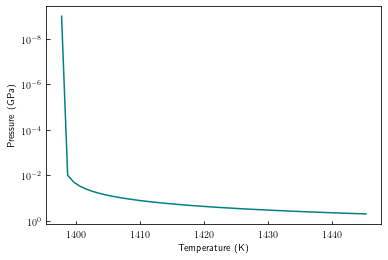

In [15]:
fig,ax = plt.subplots()
ax.plot(soli_df['T_K'],soli_df['P_Pa']/1e9, color='teal') 
ax.set_yscale('log')
plt.gca().invert_yaxis()
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (GPa)')
plt.savefig('PT_Solidus.jpg', dpi=1000)
plt.show()

In [17]:
pO2_arr_IW = []

for i in np.arange(0,51,1):
    pO2_vals_IW = buffer_fO2(soli_df.T_K[i], soli_df.P_bar[i], 'IW')
    pO2_arr_IW.append(pO2_vals_IW)


print(np.arange(0,1001,1))


[   0    1    2 ...  998  999 1000]


In [21]:
Total_Fe = 0.06 #iron content of source material (constant)
mantle_mass = 4e24 #kg, used to calculate source volatile concentrations
mantle_CO2_mass = 1e-3*mantle_mass ## 1e-3 = 0.1 wt% CO2
mantle_H2O_mass = 1e-2*mantle_mass ## 1e-2 = 1 wt% H2O
input_melt_fraction = 0.23 ## Fraction of source material that is melted during emplacement (maybe sample range?)
planetary_melt_fraction = 3.2e9 #g/s, planetary melt production. Nominal Earth is default value

pO2_try = buffer_fO2(soli_df.T_K[0], soli_df.P_bar[0], 'IW')
trial = outgas_flux_cal(soli_df.T_K[0], soli_df.P_Pa[0], pO2_try,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
print(trial)


[792311.1738268011, 229.73126945294686, 983925.5579940963, 600.8776009025925, 3.8983057240367276e-13, 492263.21779749944, 36555.09638487504, 3163444.903615125, 3200000.0, 1397.813417275862, 1.0, 4e+24, 4e+21, 4e+22, 3200000000.0, 0.23]


/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [ ]:
results_IW_arr = []
results_IWm1_arr = []
results_IWm3_arr = []
results_IWm4_arr = []
results_IWm6_arr = []
results_IWp1_arr = []
for i in np.arange(0,1001,1):
    pO2_IW = buffer_fO2(soli_df.T_K[i], soli_df.P_bar[i], 'IW')
    pO2_IWm1 = pO2_IW/1e1
    pO2_IWm3 = pO2_IW/1e3
    pO2_IWm4 = pO2_IW/1e4 
    pO2_IWm6 = pO2_IW/1e6
    pO2_IWp1 = pO2_IW*1e1

    results_IW = outgas_flux_cal(soli_df.T_K[i], soli_df.P_Pa[i], pO2_IW,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
    results_IW_arr.append(results_IW)

    results_IWm1 = outgas_flux_cal(soli_df.T_K[i], soli_df.P_Pa[i], pO2_IWm1,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
    results_IWm1_arr.append(results_IWm1)

    results_IWm3 = outgas_flux_cal(soli_df.T_K[i], soli_df.P_Pa[i], pO2_IWm3,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
    results_IWm3_arr.append(results_IWm3)  

    results_IWm4 = outgas_flux_cal(soli_df.T_K[i], soli_df.P_Pa[i], pO2_IWm4,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
    results_IWm4_arr.append(results_IWm4) 

    results_IWm6 = outgas_flux_cal(soli_df.T_K[i], soli_df.P_Pa[i], pO2_IWm6,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
    results_IWm6_arr.append(results_IWm6)

    results_IWp1 = outgas_flux_cal(soli_df.T_K[i], soli_df.P_Pa[i], pO2_IWp1,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
    results_IWp1_arr.append(results_IWp1) 

In [ ]:
results_IW_df = pd.DataFrame(data = results_IW_arr)
results_IW_df.columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'M_MELT', 'F']
results_IW_df['T_K']=soli_df.T_K

results_IWm1_df = pd.DataFrame(data = results_IWm1_arr)
results_IWm1_df.columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'M_MELT', 'F']
results_IWm1_df['T_K']=soli_df.T_K

results_IWm3_df = pd.DataFrame(data = results_IWm3_arr)
results_IWm3_df.columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'M_MELT', 'F']
results_IWm3_df['T_K']=soli_df.T_K

results_IWm4_df = pd.DataFrame(data = results_IWm4_arr)
results_IWm4_df.columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'M_MELT', 'F']
results_IWm4_df['T_K']=soli_df.T_K

results_IWm6_df = pd.DataFrame(data = results_IWm6_arr)
results_IWm6_df.columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'M_MELT', 'F']
results_IWm6_df['T_K']=soli_df.T_K

results_IWp1_df = pd.DataFrame(data = results_IWp1_arr)
results_IWp1_df.columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'M_MELT', 'F']
results_IWp1_df['T_K']=soli_df.T_K

In [ ]:
fig,ax=plt.subplots()
plt.plot(results_IWp1_df.T_K, results_IWp1_df.F_CH4, color='green', label='IW+1')
plt.plot(results_IW_df.T_K, results_IW_df.F_CH4, color='teal', label='IW')
plt.plot(results_IWm1_df.T_K, results_IWm1_df.F_CH4, color='darkviolet', label='IW-1')
plt.plot(results_IWm3_df.T_K, results_IWm3_df.F_CH4, color='skyblue', label='IW-3')
plt.plot(results_IWm4_df.T_K, results_IWm4_df.F_CH4, color='deeppink', alpha=0.5, label='IW-4')
plt.plot(results_IWm6_df.T_K, results_IWm6_df.F_CH4, color='orange', alpha=0.5, label='IW-6')
plt.yscale('log')
plt.ylim(1E-5, 1E4)
plt.xlim(1390,1440)
plt.xlabel('Temperature (K)')
plt.ylabel('CH4 Outgassing Flux (mol/s)')
plt.legend()
plt.savefig('CH4Flux_FuncIW.jpg', dpi=1000)
plt.show()
plt.plot(results_IW_df.T_K, results_IW_df.Remaining_graphite, label='Remaining Graphite (g/s)')


In [ ]:
results_IWp2_arr = []
results_IWm2_arr = []
results_IWp3_arr = []
results_IWp4_arr = []
results_IWp5_arr = []
results_IWp6_arr = []
results_IWm11_arr = []

for i in np.arange(0,1001,1):
    pO2_IW = buffer_fO2(soli_df.T_K[i], soli_df.P_bar[i], 'IW')
    pO2_IWp2 = pO2_IW*1e2
    pO2_IWm2 = pO2_IW/1e2
    pO2_IWp3 = pO2_IW*1e3
    pO2_IWp4 = pO2_IW*1e4
    pO2_IWp5 = pO2_IW*1e5
    pO2_IWp6 = pO2_IW*1e6
    pO2_IWm11 = pO2_IW/1e11


    results_IWp2 = graphite_cal(soli_df.T_K[i], soli_df.P_Pa[i], pO2_IWp2,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
    results_IWp2_arr.append(results_IWp2)

    results_IWm2 = graphite_cal(soli_df.T_K[i], soli_df.P_Pa[i], pO2_IWm2,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
    results_IWm2_arr.append(results_IWm2)    

    results_IWp3 = graphite_cal(soli_df.T_K[i], soli_df.P_Pa[i], pO2_IWp3,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
    results_IWp3_arr.append(results_IWp3)

    results_IWp4 = graphite_cal(soli_df.T_K[i], soli_df.P_Pa[i], pO2_IWp4,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
    results_IWp4_arr.append(results_IWp4)

    results_IWp5 = graphite_cal(soli_df.T_K[i], soli_df.P_Pa[i], pO2_IWp5,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
    results_IWp5_arr.append(results_IWp5)

    results_IWp6 = graphite_cal(soli_df.T_K[i], soli_df.P_Pa[i], pO2_IWp6,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
    results_IWp6_arr.append(results_IWp6)

    results_IWm11 = graphite_cal(soli_df.T_K[i], soli_df.P_Pa[i], pO2_IWm11,mantle_mass,mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
    results_IWm11_arr.append(results_IWm11)    


results_IWp2_df = pd.DataFrame(data = results_IWp2_arr)
results_IWp2_df.columns=['CO2_in_melt','Remaining_graphite','Original_carbon']
results_IWp2_df['T_K']=soli_df.T_K

results_IWm2_df = pd.DataFrame(data = results_IWm2_arr)
results_IWm2_df.columns=['CO2_in_melt','Remaining_graphite','Original_carbon']
results_IWm2_df['T_K']=soli_df.T_K

results_IWp3_df = pd.DataFrame(data = results_IWp3_arr)
results_IWp3_df.columns=['CO2_in_melt','Remaining_graphite','Original_carbon']
results_IWp3_df['T_K']=soli_df.T_K

results_IWp4_df = pd.DataFrame(data = results_IWp4_arr)
results_IWp4_df.columns=['CO2_in_melt','Remaining_graphite','Original_carbon']
results_IWp4_df['T_K']=soli_df.T_K

results_IWp5_df = pd.DataFrame(data = results_IWp5_arr)
results_IWp5_df.columns=['CO2_in_melt','Remaining_graphite','Original_carbon']
results_IWp5_df['T_K']=soli_df.T_K

results_IWp6_df = pd.DataFrame(data = results_IWp6_arr)
results_IWp6_df.columns=['CO2_in_melt','Remaining_graphite','Original_carbon']
results_IWp6_df['T_K']=soli_df.T_K

results_IWm11_df = pd.DataFrame(data = results_IWm11_arr)
results_IWm11_df.columns=['CO2_in_melt','Remaining_graphite','Original_carbon']
results_IWm11_df['T_K']=soli_df.T_K

In [ ]:
X=[results_IWm11_df, results_IWm3_df, results_IWm2_df, results_IWm1_df, results_IW_df, results_IWp1_df, results_IWp2_df, results_IWp3_df, results_IWp4_df, results_IWp5_df, results_IWp6_df]
X_names=['IW-11', 'IW-3', 'IW-2', 'IW-1', 'IW', 'IW+1', 'IW+2', 'IW+3', 'IW+4', 'IW+5', 'IW+6']
Y = np.arange(1,12,1)

fig, ax = plt.subplots()
for (i,j) in zip(X,Y):
    plt.scatter(j, np.sum(i['Remaining_graphite']), s=100)
ax.axhline(y=np.sum(results_IWm11_df['Original_carbon']), xmin=0, xmax=13, linestyle='--', label='Original Carbon')
ax.set_xticks(Y)
ax.set_xticklabels(X_names, rotation=30, fontsize=10)
plt.ylabel('Remaining Graphite Summed over 10 km (g/s)')
plt.legend()
plt.savefig('RemainingGraphiteSumoverDepth.jpg', dpi=1000)

## Exploring the Parameter Space

In [22]:
def loguniform(low=0, high=1, size=None, base=10):
    return np.power(base, np.random.uniform(low, high, size))

NIters=100
Total_Fe_arr=np.random.uniform(0.01,0.5, NIters)
mantle_mass_arr = np.random.uniform(0.1*mantle_mass, 10*mantle_mass, NIters)
mantle_CO2_mass_arr = loguniform(-5, -2,size=NIters)
mantle_H2O_mass_arr = loguniform(-5, -1, size=NIters)
input_melt_fraction_arr = np.random.uniform(0.01, 0.5,NIters)
planetary_melt_fraction_arr = np.random.uniform(0.1*planetary_melt_fraction, 10*planetary_melt_fraction, NIters)

               
#print(mantle_mass_arr)



In [ ]:
#IW_explore = explore_params(mantle_mass_arr, 1.0)
Total_Fe = 0.06 #iron content of source material (constant)
mantle_mass = 4e24 #kg, used to calculate source volatile concentrations
mantle_CO2_mass = 1e-3*mantle_mass ## 1e-3 = 0.1 wt% CO2
mantle_H2O_mass = 1e-2*mantle_mass ## 1e-2 = 1 wt% H2O
input_melt_fraction = 0.23 ## Fraction of source material that is melted during emplacement (maybe sample range?)
planetary_melt_fraction = 3.2e9 #g/s, planetary melt production. Nominal Earth is default value



In [372]:
def explore_params(param_explore, i, N, IW_factor):
    results_param=[]
    for j in param_explore:
        pO2_IW_OG = buffer_fO2(soli_df.T_K[i], soli_df.P_bar[i], 'IW')
        pO2_IW_use = pO2_IW_OG*IW_factor
        res = outgas_flux_cal(soli_df.T_K[i], soli_df.P_Pa[i], pO2_IW_use, j, mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
        results_param.append(res)
    results_param_df = pd.DataFrame(data = results_param)
    results_param_df.columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon']
    results_param_df['Temp'] = np.full(N, soli_df.T_K[i]) 
    return results_param_df

def exploregraphite_params(param_explore, i, N, IW_factor):
    results_param=[]
    for j in param_explore:
        pO2_IW_OG = buffer_fO2(soli_df.T_K[i], soli_df.P_bar[i], 'IW')
        pO2_IW_use = pO2_IW_OG*IW_factor
        res = graphite_cal(soli_df.T_K[i], soli_df.P_Pa[i], pO2_IW_use, j, mantle_CO2_mass,mantle_H2O_mass,planetary_melt_fraction,Total_Fe,input_melt_fraction)
        results_param.append(res)
    results_param_df = pd.DataFrame(data = results_param)
    results_param_df.columns=['CO2_in_melt','Remaining_graphite','Original_carbon']
    results_param_df['Temp'] = np.full(N, soli_df.T_K[i]) 
    return results_param_df

In [ ]:
mantle_mass_explore = exploregraphite_params(mantle_mass_arr, 0, 100, 1.0)

#print(mantle_mass_explore)

In [373]:
mantle_mass_full_IW = []
for i in np.arange(0,1001,1):
    res_mantle = exploregraphite_params(mantle_mass_arr, i, 100, 1.0)
    mantle_mass_full_IW.append(res_mantle)
frames=mantle_mass_full_IW
mantle_mass_IWdf=pd.concat(frames)


mantle_mass_full_IWm1 = []
for i in np.arange(0,1001,1):
    res_mantle_IWm1 = exploregraphite_params(mantle_mass_arr, i, 100, 1.0e-1)
    mantle_mass_full_IWm1.append(res_mantle_IWm1)
frames_IWm1=mantle_mass_full_IWm1
mantle_mass_IWm1df=pd.concat(frames_IWm1)


mantle_mass_full_IWm2 = []
for i in np.arange(0,1001,1):
    res_mantle_IWm2 = exploregraphite_params(mantle_mass_arr, i, 100, 1.0e-2)
    mantle_mass_full_IWm2.append(res_mantle_IWm2)
frames_IWm2=mantle_mass_full_IWm2
mantle_mass_IWm2df=pd.concat(frames_IWm2)

KeyError: 51

In [ ]:
mantle_mass_full_IWm3 = []
for i in np.arange(0,1001,1):
    res_mantle_IWm3 = exploregraphite_params(mantle_mass_arr, i, 100, 1.0e-3)
    mantle_mass_full_IWm3.append(res_mantle_IWm3)
frames_IWm3=mantle_mass_full_IWm3
mantle_mass_IWm3df=pd.concat(frames_IWm3)

mantle_mass_full_IWp1 = []
for i in np.arange(0,1001,1):
    res_mantle_IWp1 = exploregraphite_params(mantle_mass_arr, i, 100, 1.0e1)
    mantle_mass_full_IWp1.append(res_mantle_IWp1)
frames_IWp1=mantle_mass_full_IWp1
mantle_mass_IWp1df=pd.concat(frames_IWp1)



In [ ]:
mantle_mass_full_IWp2 = []
for i in np.arange(0,1001,1):
    res_mantle_IWp2 = exploregraphite_params(mantle_mass_arr, i, 100, 1.0e2)
    mantle_mass_full_IWp2.append(res_mantle_IWp2)
frames_IWp2=mantle_mass_full_IWp2
mantle_mass_IWp2df=pd.concat(frames_IWp2)

In [ ]:
mantle_mass_IWm3_Sum = []
for i in np.arange(0,100,1):
    mm_IWm3_sum = np.sum(mantle_mass_IWm3df.Remaining_graphite[i])
    mantle_mass_IWm3_Sum.append(mm_IWm3_sum)
    #print(np.sum(mantle_mass_IWm2df.Remaining_graphite[99]))
#print(mantle_mass_IWm3df.Temp[40])
#print(np.arange(0,100,1))
#print(np.max(mantle_mass_IWm3_Sum))
#print(np.min(mantle_mass_IWm3_Sum))
print((mantle_mass_IWm3df.Original_carbon))


In [ ]:
X_names=['IW-3', 'IW-2', 'IW-1', 'IW', 'IW+1', 'IW+2']
Y = np.arange(1,7,1)

fig, ax =plt.subplots()
for i in np.arange(0,100,1):
    plt.scatter(1, np.sum(mantle_mass_IWm3df.Remaining_graphite[i]), s=100, color='dodgerblue', alpha=0.5)
    plt.scatter(2, np.sum(mantle_mass_IWm2df.Remaining_graphite[i]), s=100, color='forestgreen', alpha=0.5)
    plt.scatter(3, np.sum(mantle_mass_IWm1df.Remaining_graphite[i]), s=100, color='darkviolet', alpha=0.5)
    plt.scatter(4, np.sum(mantle_mass_IWdf.Remaining_graphite[i]), s=100, color='deeppink', alpha=0.5)
    plt.scatter(5, np.sum(mantle_mass_IWp1df.Remaining_graphite[i]), s=100, color='orangered', alpha=0.5)
    plt.scatter(6, np.sum(mantle_mass_IWp2df.Remaining_graphite[i]), s=100, color='orange', alpha=0.5)
ax.set_xticks(Y)
ax.set_xticklabels(X_names, rotation=30, fontsize=10)
#plt.legend(('IW-3', 'IW-2', 'IW-1', 'IW', 'IW+1'))
plt.yscale('log')
plt.title('Varying Mantle Mass')
plt.show()

## Explore All Parameters At Once

In [57]:
Total_Fe_arr=np.random.uniform(0.01,0.5, NIters)
mantle_mass_arr = np.random.uniform(0.1*mantle_mass, 10*mantle_mass, NIters)
mantle_CO2_mass_arr = loguniform(-5, -2,size=NIters)
mantle_H2O_mass_arr = loguniform(-5, -1, size=NIters)
input_melt_fraction_arr = np.random.uniform(0.01, 1.0,NIters)
planetary_melt_fraction_arr = np.random.uniform(0.1*planetary_melt_fraction, 10*planetary_melt_fraction, NIters)



def exploreall(numTrials, IW_factor):
    Results_Vals=[]
    for iTrial in range(numTrials):
        Total_Fe_val = np.random.uniform(0.01,0.5)
        mantle_mass_val = np.random.uniform(0.1*mantle_mass, 10*mantle_mass)
        mantle_CO2_mass_val = loguniform(-5,-2)*mantle_mass
        mantle_H2O_mass_val = loguniform(-5,-1)*mantle_mass
        input_melt_fraction_val = np.random.uniform(0.1,0.5)
        planetary_melt_fraction_val = loguniform(-1,1)*planetary_melt_fraction
        for i in range(soli_df['T_K'].size):
            pO2_IWval = buffer_fO2(soli_df.T_K[i], soli_df.P_bar[i], 'IW')
            pO2_val = pO2_IWval*IW_factor
            res = graphite_calv2(soli_df.T_K[i], soli_df.P_Pa[i], pO2_val, mantle_mass_val, mantle_CO2_mass_val, mantle_H2O_mass_val, planetary_melt_fraction_val, Total_Fe_val, input_melt_fraction_val)
            Results_Vals.append(res)
    RES_DF = pd.DataFrame(data=Results_Vals, columns=['CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'pO2','mantle_mass','mantle_CO2_mass','mantle_H2O_mass','M_MELT','Total_Fe','F'])
    return(RES_DF)

In [60]:
IW_RES = exploreall(1000,1e0)


In [61]:
IWp1_RES = exploreall(1000,1e1)
IWp2_RES = exploreall(1000,1e2)
IWm1_RES = exploreall(1000,1e-1)
IWm2_RES = exploreall(1000,1e-2)
IWm3_RES = exploreall(1000,1e-3)

In [62]:
IWp3_RES = exploreall(1000,1e3)
IWp4_RES = exploreall(1000,1e4)
IWp5_RES = exploreall(1000,1e5)
IWm11_RES = exploreall(1000,1e-11)


In [63]:
for i,j in zip(IWp1_RES.Remaining_graphite, IWp1_RES.Original_carbon):
    if i > j:
        print('true')
        

In [107]:
#print(loguniform(-5,-2))
#print(IW_RES.mantle_CO2_mass)
IWm11_SUM_RG = []
IWm3_SUM_RG = []
IWm2_SUM_RG = []
IWm1_SUM_RG = []
IW_SUM_RG = []
IWp1_SUM_RG = []
IWp2_SUM_RG = []
IWp3_SUM_RG = []
IWp4_SUM_RG = []
IWp5_SUM_RG = []
for i in np.arange(0,1000,1):
    IWm11_val = np.sum(IWm11_RES.Remaining_graphite[i*51:(51*(i+1))])/np.sum(IWm11_RES.Original_carbon[i*51:(51*(i+1))])
    IWm3_val = np.sum(IWm3_RES.Remaining_graphite[i*51:(51*(i+1))])/np.sum(IWm3_RES.Original_carbon[i*51:(51*(i+1))])
    IWm2_val = np.sum(IWm2_RES.Remaining_graphite[i*51:(51*(i+1))])/np.sum(IWm2_RES.Original_carbon[i*51:(51*(i+1))])   
    IWm1_val = np.sum(IWm1_RES.Remaining_graphite[i*51:(51*(i+1))])/np.sum(IWm1_RES.Original_carbon[i*51:(51*(i+1))])
    IW_val = np.sum(IW_RES.Remaining_graphite[i*51:(51*(i+1))])/np.sum(IW_RES.Original_carbon[i*51:(51*(i+1))])
    IWp1_val = np.sum(IWp1_RES.Remaining_graphite[i*51:(51*(i+1))])/np.sum(IWp1_RES.Original_carbon[i*51:(51*(i+1))])
    IWp2_val = np.sum(IWp2_RES.Remaining_graphite[i*51:(51*(i+1))])/np.sum(IWp2_RES.Original_carbon[i*51:(51*(i+1))])
    IWp3_val = np.sum(IWp3_RES.Remaining_graphite[i*51:(51*(i+1))])/np.sum(IWp3_RES.Original_carbon[i*51:(51*(i+1))])
    IWp4_val = np.sum(IWp4_RES.Remaining_graphite[i*51:(51*(i+1))])/np.sum(IWp4_RES.Original_carbon[i*51:(51*(i+1))])
    IWp5_val = np.sum(IWp5_RES.Remaining_graphite[i*51:(51*(i+1))])/np.sum(IWp5_RES.Original_carbon[i*51:(51*(i+1))])

    IWm11_SUM_RG.append(IWm11_val)
    IWm3_SUM_RG.append(IWm3_val)
    IWm2_SUM_RG.append(IWm2_val)
    IWm1_SUM_RG.append(IWm1_val)
    IW_SUM_RG.append(IW_val)
    IWp1_SUM_RG.append(IWp1_val)
    IWp2_SUM_RG.append(IWp2_val)
    IWp3_SUM_RG.append(IWp3_val)
    IWp4_SUM_RG.append(IWp4_val)
    IWp5_SUM_RG.append(IWp5_val)



#print(IW_RES.Remaining_graphite[0:364], IW_RES.Temp[0:364])
#print(IW_RES.mantle_CO2_mass[0:364])
#print(IW_RES.mantle_CO2_mass[364:364*2], IW_RES.Temp[364:364*2])

In [ ]:
print(np.mean(IWm11_SUM_RG))
print(np.std(IWm11_SUM_RG))
#print(np.average(IWp3_SUM_RG))
#print(np.std(IWp3_SUM_RG))

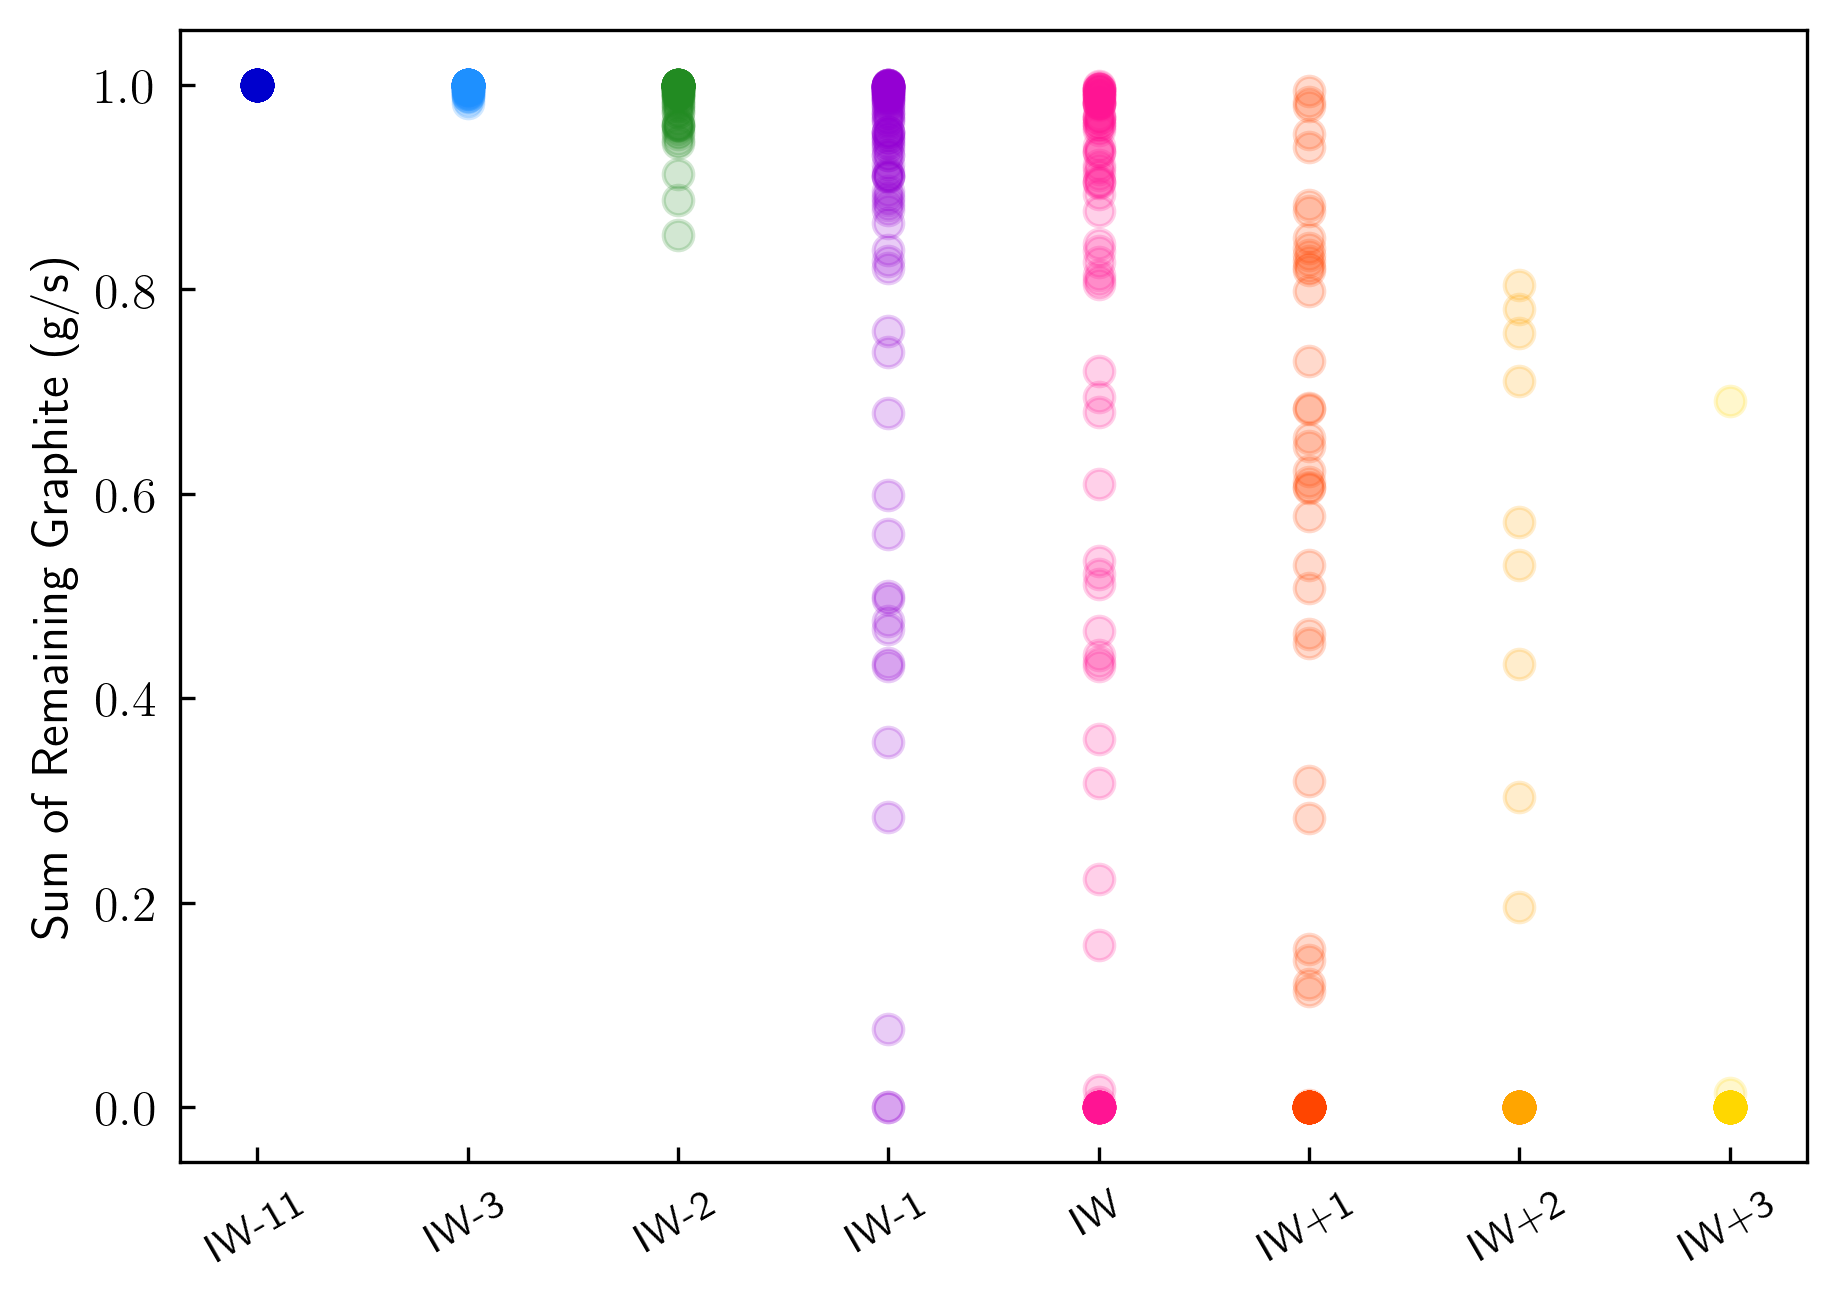

In [65]:
X_names=['IW-11','IW-3', 'IW-2', 'IW-1', 'IW', 'IW+1', 'IW+2', 'IW+3']
Y = np.arange(1,9,1)

fig, ax =plt.subplots()
for i in np.arange(0,100,1):
    b=51
    plt.scatter(1, np.sum(IWm11_RES.Remaining_graphite[i*b:(b*(i+1))])/np.sum(IWm11_RES.Original_carbon[i*b:(b*(i+1))]), s=50, color='mediumblue', alpha=0.2)
    plt.scatter(2, np.sum(IWm3_RES.Remaining_graphite[i*b:(b*(i+1))])/np.sum(IWm3_RES.Original_carbon[i*b:(b*(i+1))]), s=50, color='dodgerblue', alpha=0.2)
    plt.scatter(3, np.sum(IWm2_RES.Remaining_graphite[i*b:(b*(i+1))])/np.sum(IWm2_RES.Original_carbon[i*b:(b*(i+1))]), s=50, color='forestgreen', alpha=0.2)
    plt.scatter(4, np.sum(IWm1_RES.Remaining_graphite[i*b:(b*(i+1))])/np.sum(IWm1_RES.Original_carbon[i*b:(b*(i+1))]), s=50, color='darkviolet', alpha=0.2)
    plt.scatter(5, np.sum(IW_RES.Remaining_graphite[i*b:(b*(i+1))])/np.sum(IW_RES.Original_carbon[i*b:(b*(i+1))]), s=50, color='deeppink', alpha=0.2)
    plt.scatter(6, np.sum(IWp1_RES.Remaining_graphite[i*b:(b*(i+1))])/np.sum(IWp1_RES.Original_carbon[i*b:(b*(i+1))]), s=50, color='orangered', alpha=0.2)
    plt.scatter(7, np.sum(IWp2_RES.Remaining_graphite[i*b:(b*(i+1))])/np.sum(IWp2_RES.Original_carbon[i*b:(b*(i+1))]), s=50, color='orange', alpha=0.2)
    plt.scatter(8, np.sum(IWp3_RES.Remaining_graphite[i*b:(b*(i+1))])/np.sum(IWp3_RES.Original_carbon[i*b:(b*(i+1))]), s=50, color='gold', alpha=0.2)

ax.set_xticks(Y)
ax.set_xticklabels(X_names, rotation=30, fontsize=10)
#plt.legend(('IW-3', 'IW-2', 'IW-1', 'IW', 'IW+1'))
#plt.yscale('symlog')
#plt.ylim(-1e-1,1e11)
plt.ylabel('Sum of Remaining Graphite (g/s)')
#plt.savefig('RemainingGraphite_ExploreAllParams.jpg', dpi=1000)
plt.show()

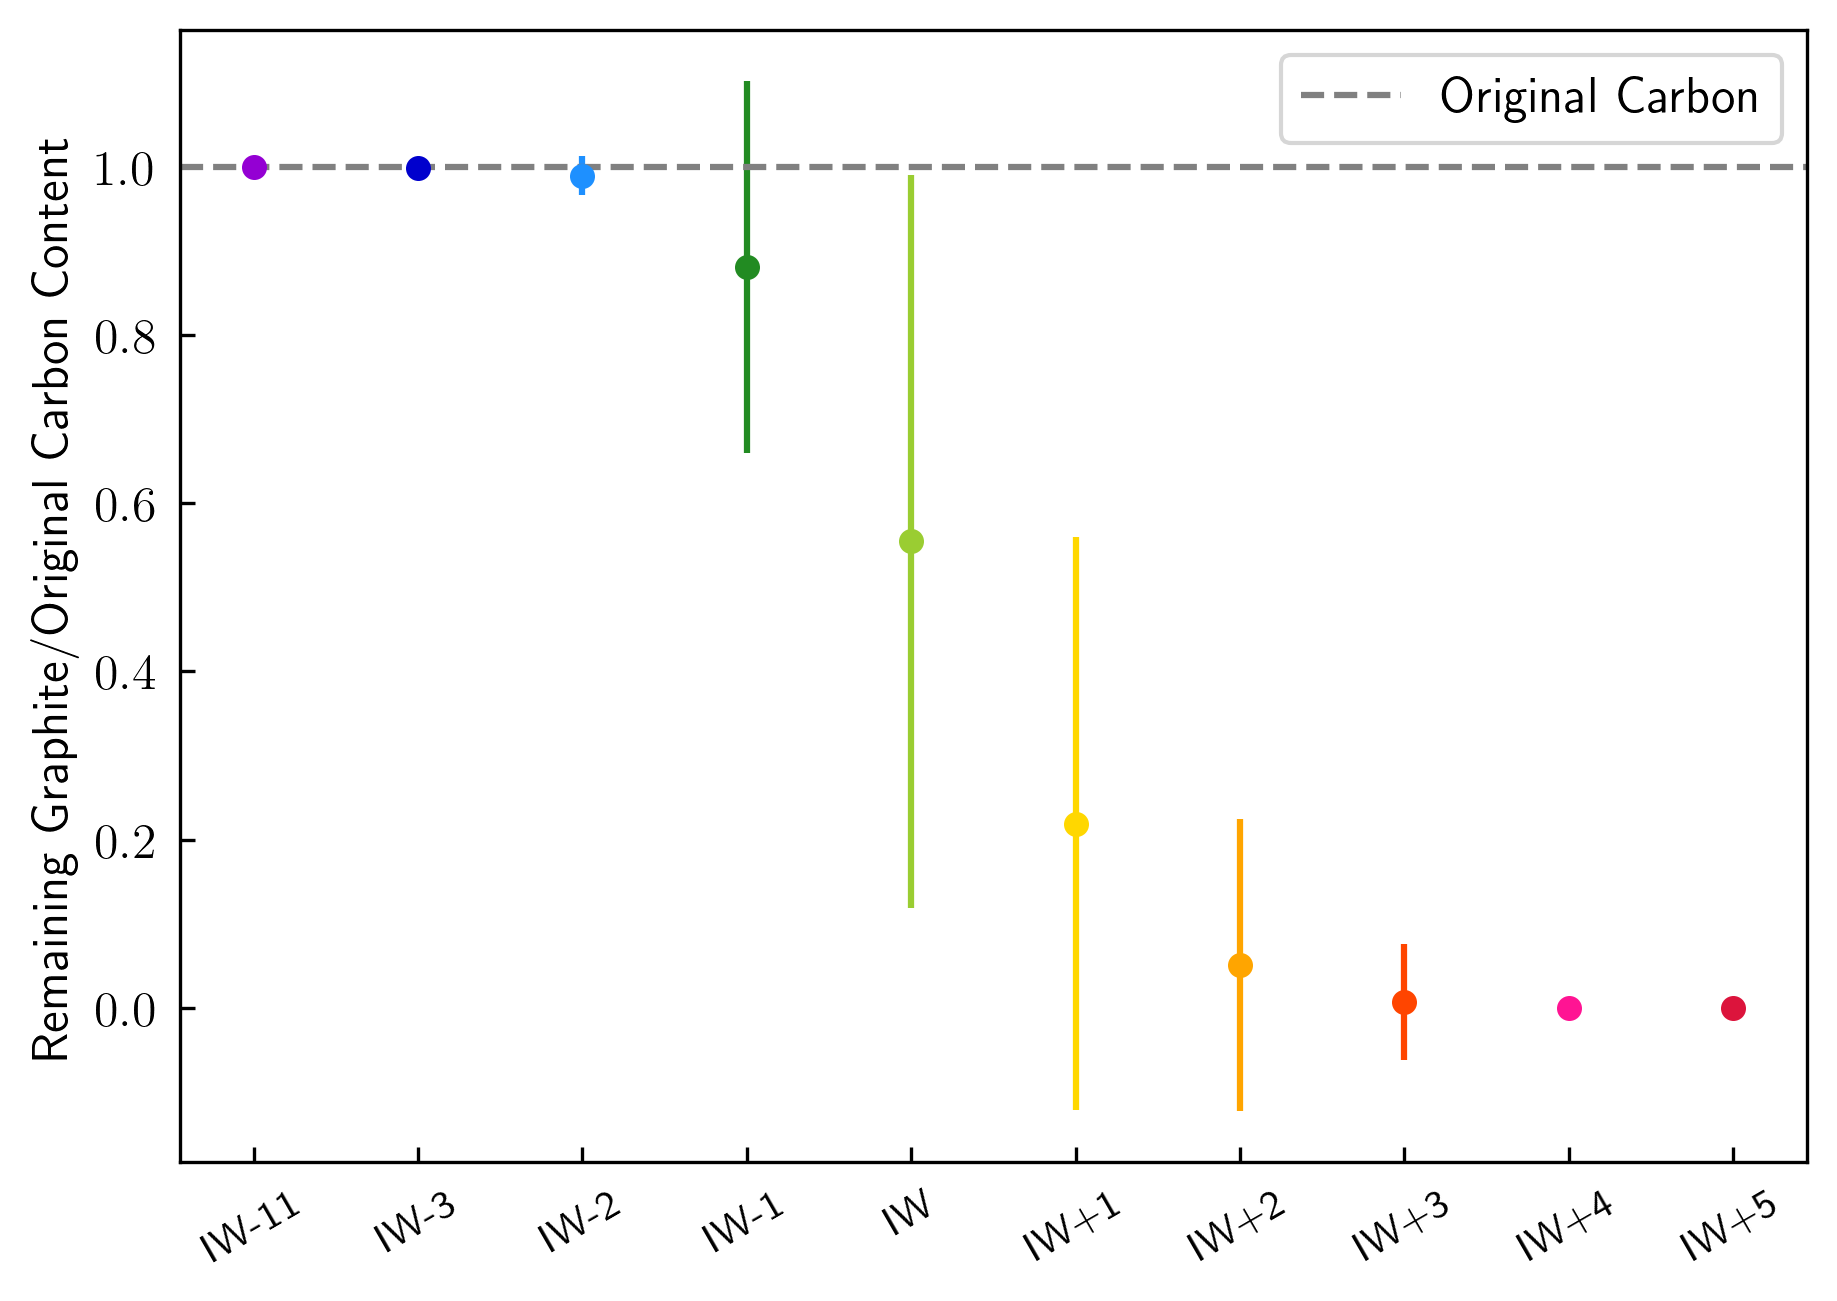

In [67]:

X_names=['IW-11','IW-3', 'IW-2', 'IW-1', 'IW', 'IW+1', 'IW+2', 'IW+3', 'IW+4', 'IW+5']
Y = np.arange(1,11,1)

fig, ax =plt.subplots()

plt.errorbar(1, np.mean(IWm11_SUM_RG), yerr=np.std(IWm11_SUM_RG), marker='.', ms=10, color='darkviolet')
plt.errorbar(2, np.mean(IWm3_SUM_RG), yerr=np.std(IWm3_SUM_RG), marker='.', ms=10, color='mediumblue')
plt.errorbar(3, np.mean(IWm2_SUM_RG), yerr=np.std(IWm2_SUM_RG), marker='.', ms=10, color='dodgerblue')
plt.errorbar(4, np.mean(IWm1_SUM_RG), yerr=np.std(IWm1_SUM_RG), marker='.', ms=10, color='forestgreen')
plt.errorbar(5, np.mean(IW_SUM_RG), yerr=np.std(IW_SUM_RG), marker='.', ms=10, color='yellowgreen')
plt.errorbar(6, np.mean(IWp1_SUM_RG), yerr=np.std(IWp1_SUM_RG), marker='.', ms=10, color='gold')
plt.errorbar(7, np.mean(IWp2_SUM_RG), yerr=np.std(IWp2_SUM_RG), marker='.', ms=10, color='orange')
plt.errorbar(8, np.mean(IWp3_SUM_RG), yerr=np.std(IWp3_SUM_RG), marker='.', ms=10, color='orangered')
plt.errorbar(9, np.mean(IWp4_SUM_RG), yerr=np.std(IWp4_SUM_RG), marker='.', ms=10, color='deeppink')
plt.errorbar(10, np.mean(IWp5_SUM_RG), yerr=np.std(IWp5_SUM_RG), marker='.', ms=10, color='crimson')
ax.axhline(y=1, xmin=0, xmax=10, linestyle='--', color='grey', label='Original Carbon')
ax.set_xticks(Y)
ax.set_xticklabels(X_names, rotation=30, fontsize=10)

plt.legend()
#plt.yscale('symlog')
#plt.ylim(-1e-1,1e11)
plt.ylabel('Remaining Graphite/Original Carbon Content')
#plt.savefig('RemainingGraphiteoverOGCarbon_ExploreAllParams.jpg', dpi=1000)
plt.show()

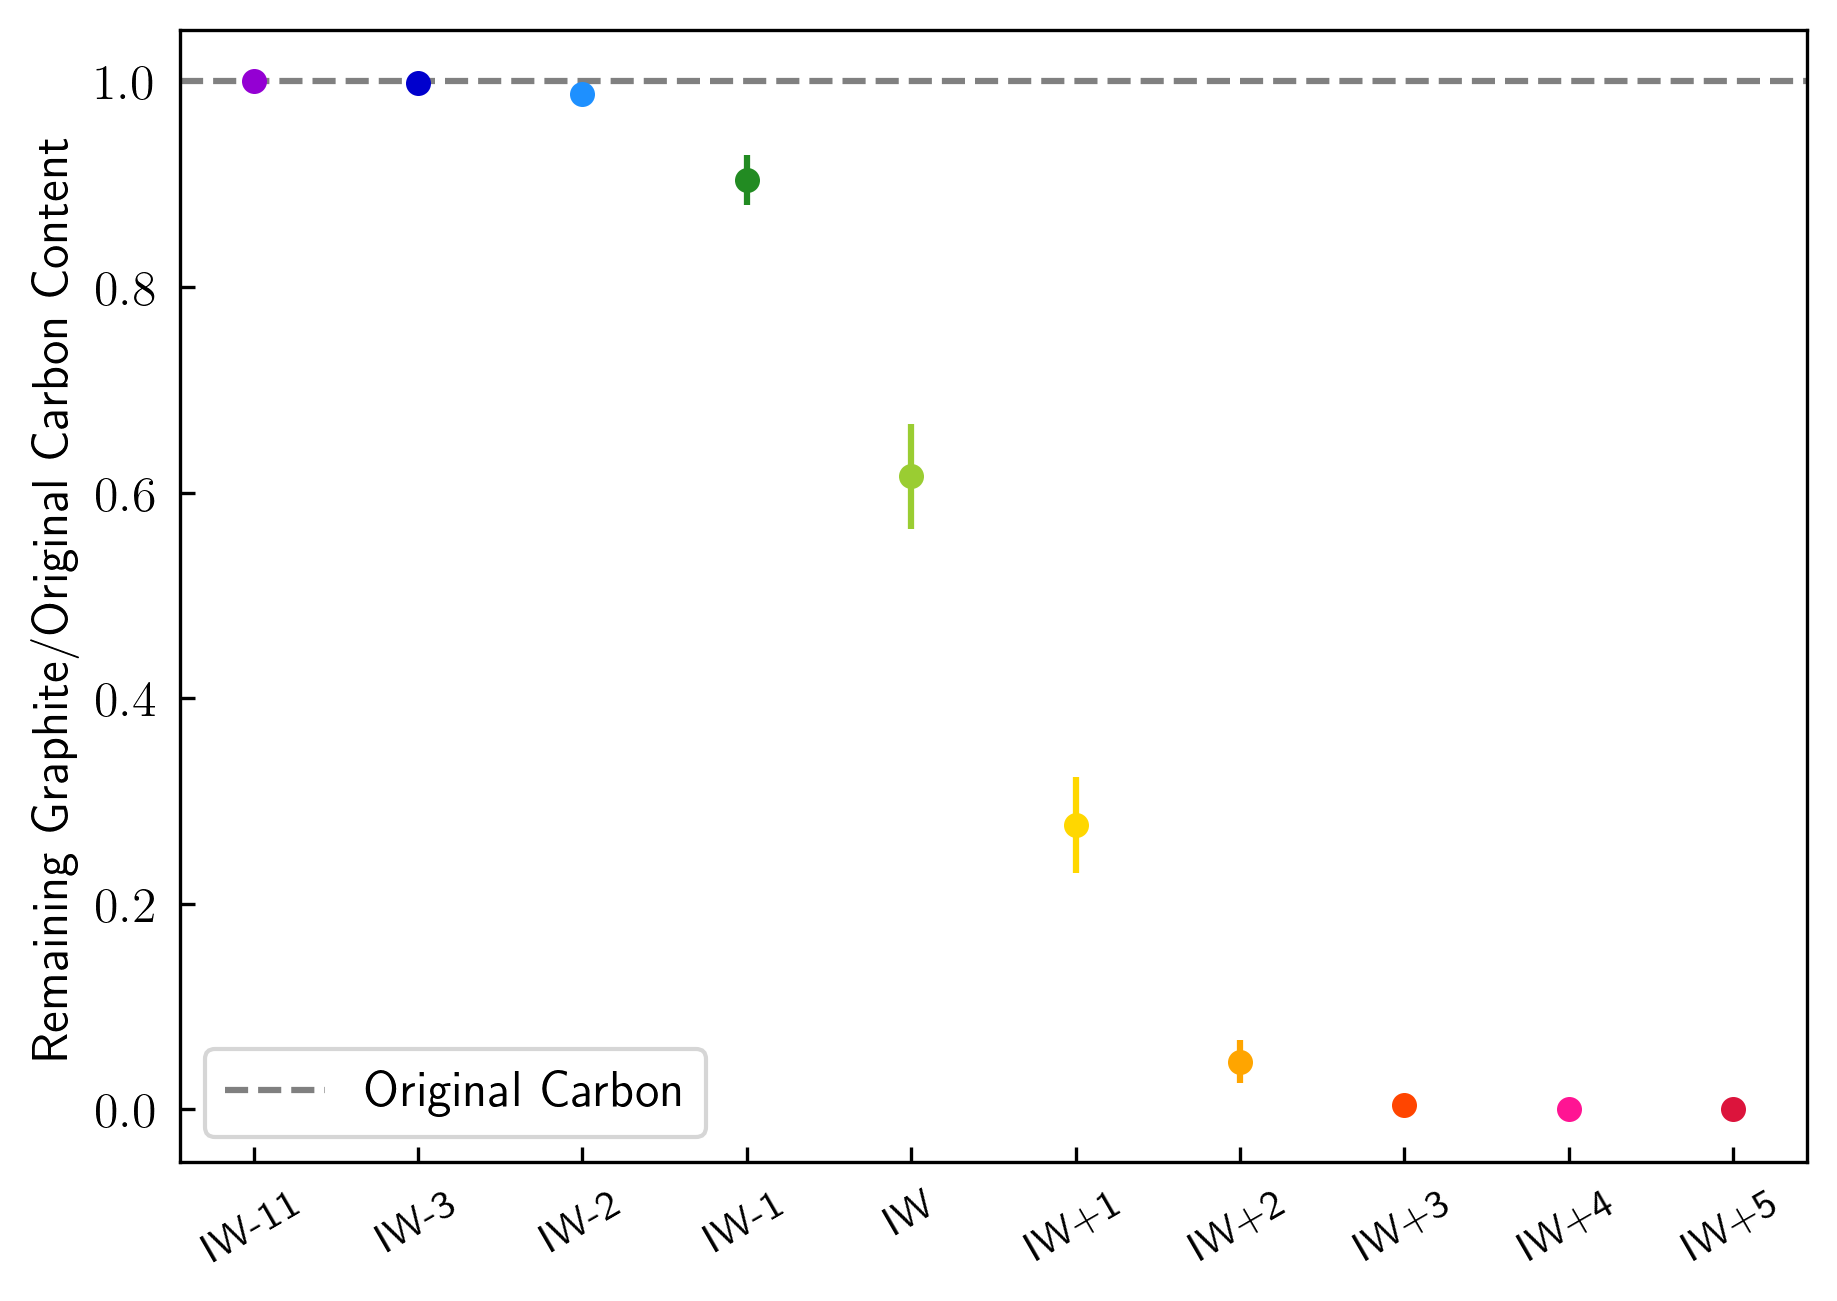

In [108]:
import scipy.stats as st
IWm11_confidenceInt95 = st.t.interval(alpha=0.95, df=len(IWm11_SUM_RG)-1, loc=np.mean(IWm11_SUM_RG), scale=st.sem(IWm11_SUM_RG)) 
IWm11_confidenceInt68 = st.t.interval(alpha=0.68, df=len(IWm11_SUM_RG)-1, loc=np.mean(IWm11_SUM_RG), scale=st.sem(IWm11_SUM_RG)) 

IWm3_confidenceInt95 = st.t.interval(alpha=0.95, df=len(IWm3_SUM_RG)-1, loc=np.mean(IWm3_SUM_RG), scale=st.sem(IWm3_SUM_RG)) 
IWm3_confidenceInt68 = st.t.interval(alpha=0.68, df=len(IWm3_SUM_RG)-1, loc=np.mean(IWm3_SUM_RG), scale=st.sem(IWm3_SUM_RG)) 

IWm2_confidenceInt95 = st.t.interval(alpha=0.95, df=len(IWm2_SUM_RG)-1, loc=np.mean(IWm2_SUM_RG), scale=st.sem(IWm2_SUM_RG)) 
IWm2_confidenceInt68 = st.t.interval(alpha=0.68, df=len(IWm2_SUM_RG)-1, loc=np.mean(IWm2_SUM_RG), scale=st.sem(IWm2_SUM_RG)) 

IWm1_confidenceInt95 = st.t.interval(alpha=0.95, df=len(IWm1_SUM_RG)-1, loc=np.mean(IWm1_SUM_RG), scale=st.sem(IWm1_SUM_RG)) 
IWm1_confidenceInt68 = st.t.interval(alpha=0.68, df=len(IWm1_SUM_RG)-1, loc=np.mean(IWm1_SUM_RG), scale=st.sem(IWm1_SUM_RG)) 

IW_confidenceInt95 = st.t.interval(alpha=0.95, df=len(IW_SUM_RG)-1, loc=np.mean(IW_SUM_RG), scale=st.sem(IW_SUM_RG)) 
IW_confidenceInt68 = st.t.interval(alpha=0.68, df=len(IW_SUM_RG)-1, loc=np.mean(IW_SUM_RG), scale=st.sem(IW_SUM_RG)) 

IWp1_confidenceInt95 = st.t.interval(alpha=0.95, df=len(IWp1_SUM_RG)-1, loc=np.mean(IWp1_SUM_RG), scale=st.sem(IWp1_SUM_RG)) 
IWp1_confidenceInt68 = st.t.interval(alpha=0.68, df=len(IWp1_SUM_RG)-1, loc=np.mean(IWp1_SUM_RG), scale=st.sem(IWp1_SUM_RG)) 

IWp2_confidenceInt95 = st.t.interval(alpha=0.95, df=len(IWp2_SUM_RG)-1, loc=np.mean(IWp2_SUM_RG), scale=st.sem(IWp2_SUM_RG)) 
IWp2_confidenceInt68 = st.t.interval(alpha=0.68, df=len(IWp2_SUM_RG)-1, loc=np.mean(IWp2_SUM_RG), scale=st.sem(IWp2_SUM_RG)) 

IWp3_confidenceInt95 = st.t.interval(alpha=0.95, df=len(IWp3_SUM_RG)-1, loc=np.mean(IWp3_SUM_RG), scale=st.sem(IWp3_SUM_RG)) 
IWp3_confidenceInt68 = st.t.interval(alpha=0.68, df=len(IWp3_SUM_RG)-1, loc=np.mean(IWp3_SUM_RG), scale=st.sem(IWp3_SUM_RG)) 

IWp4_confidenceInt95 = st.t.interval(alpha=0.95, df=len(IWp4_SUM_RG)-1, loc=np.mean(IWp4_SUM_RG), scale=st.sem(IWp4_SUM_RG)) 
IWp4_confidenceInt68 = st.t.interval(alpha=0.68, df=len(IWp4_SUM_RG)-1, loc=np.mean(IWp4_SUM_RG), scale=st.sem(IWp4_SUM_RG)) 

IWp5_confidenceInt95 = st.t.interval(alpha=0.95, df=len(IWp5_SUM_RG)-1, loc=np.mean(IWp5_SUM_RG), scale=st.sem(IWp5_SUM_RG)) 
IWp5_confidenceInt68 = st.t.interval(alpha=0.68, df=len(IWp5_SUM_RG)-1, loc=np.mean(IWp5_SUM_RG), scale=st.sem(IWp5_SUM_RG)) 

#print(confidenceInt[1]-confidenceInt[0])

fig, ax =plt.subplots()

plt.errorbar(1, np.mean(IWm11_SUM_RG), yerr=IWm11_confidenceInt95[1]-IWm11_confidenceInt95[0], marker='.', ms=10, color='darkviolet')
plt.errorbar(2, np.mean(IWm3_SUM_RG), yerr=IWm3_confidenceInt95[1]-IWm3_confidenceInt95[0], marker='.', ms=10, color='mediumblue')
plt.errorbar(3, np.mean(IWm2_SUM_RG), yerr=IWm2_confidenceInt95[1]-IWm2_confidenceInt95[0], marker='.', ms=10, color='dodgerblue')
plt.errorbar(4, np.mean(IWm1_SUM_RG), yerr=IWm1_confidenceInt95[1]-IWm1_confidenceInt95[0], marker='.', ms=10, color='forestgreen')
plt.errorbar(5, np.mean(IW_SUM_RG), yerr=IW_confidenceInt95[1]-IW_confidenceInt95[0], marker='.', ms=10, color='yellowgreen')
plt.errorbar(6, np.mean(IWp1_SUM_RG), yerr=IWp1_confidenceInt95[1]-IWp1_confidenceInt95[0], marker='.', ms=10, color='gold')
plt.errorbar(7, np.mean(IWp2_SUM_RG), yerr=IWp2_confidenceInt95[1]-IWp2_confidenceInt95[0], marker='.', ms=10, color='orange')
plt.errorbar(8, np.mean(IWp3_SUM_RG), yerr=IWp3_confidenceInt95[1]-IWp3_confidenceInt95[0], marker='.', ms=10, color='orangered')
plt.errorbar(9, np.mean(IWp4_SUM_RG), yerr=IWp4_confidenceInt95[1]-IWp4_confidenceInt95[0], marker='.', ms=10, color='deeppink')
plt.errorbar(10, np.mean(IWp5_SUM_RG), yerr=IWp5_confidenceInt95[1]-IWp5_confidenceInt95[0], marker='.', ms=10, color='crimson')
ax.axhline(y=1, xmin=0, xmax=10, linestyle='--', color='grey', label='Original Carbon')
ax.set_xticks(Y)
ax.set_xticklabels(X_names, rotation=30, fontsize=10)

plt.legend()
#plt.yscale('symlog')
#plt.ylim(-1e-1,1e11)
plt.ylabel('Remaining Graphite/Original Carbon Content')
#plt.savefig('RemainingGraphiteoverOGCarbon_ExploreAllParams.jpg', dpi=1000)
plt.show()

### Full Calculation

In [33]:
def exploreall_full(numTrials, IW_factor):
    Results_Vals=[]
    for iTrial in range(numTrials):
        Total_Fe_val = 0.06
        mantle_mass_val = loguniform(-1, 1)*mantle_mass
        mantle_CO2_mass_val = loguniform(-5,-2)*mantle_mass
        mantle_H2O_mass_val = loguniform(-5,-1)*mantle_mass
        input_melt_fraction_val = np.random.uniform(0.1,0.5)
        planetary_melt_fraction_val = loguniform(-1,1)*planetary_melt_fraction
        for i in range(soli_df['T_K'].size):
            pO2_IWval = buffer_fO2(soli_df.T_K[i], soli_df.P_bar[i], 'IW')
            pO2_val = pO2_IWval*IW_factor
            res = outgas_flux_cal_og(soli_df.T_K[i], soli_df.P_Pa[i], pO2_val, mantle_mass_val, mantle_CO2_mass_val, mantle_H2O_mass_val, planetary_melt_fraction_val, Total_Fe_val, input_melt_fraction_val)
            Results_Vals.append(res)
    RES_DF = pd.DataFrame(data=Results_Vals, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
    return(RES_DF)

In [406]:
def exploreall_full_constantT(numTrials, IW_factor):
    Results_Vals=[]
    for iTrial in range(numTrials):
        Total_Fe_val = 0.06
        mantle_mass_val = loguniform(-1, 1)*mantle_mass
        mantle_CO2_mass_val = loguniform(-5,-2)*mantle_mass
        mantle_H2O_mass_val = loguniform(-5,-1)*mantle_mass
        input_melt_fraction_val = np.random.uniform(0.1,0.5)
        planetary_melt_fraction_val = loguniform(-1,1)*planetary_melt_fraction
        for i in range(soli_df2['T_K'].size):
            pO2_IWval = buffer_fO2(soli_df2.T_K[i], soli_df2.P_bar[i], 'IW')
            pO2_val = pO2_IWval*IW_factor
            res = outgas_flux_cal_og(soli_df2.T_K[i], soli_df2.P_Pa[i], pO2_val, mantle_mass_val, mantle_CO2_mass_val, mantle_H2O_mass_val, planetary_melt_fraction_val, Total_Fe_val, input_melt_fraction_val)
            Results_Vals.append(res)
    RES_DF = pd.DataFrame(data=Results_Vals, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
    return(RES_DF)

In [27]:
IW_RES_Full = exploreall_full(1000,1e0)


/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [28]:
IW_RES_Full.to_csv('IW_RES_Full.csv')

In [523]:
#IW_RES_Full.Remaining_graphite
print(np.random.uniform(0.1,0.5))

0.36640488928623227


In [524]:
IWm1_RES_Full = exploreall_full(1000,1.0e-1)

#print(len(IWm1_RES_Full))

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [30]:
IWm1_RES_Full.to_csv('IWm1_RES_Full.csv')

In [34]:
IWm2_RES_Full = exploreall_full(1000,1.0e-2) 


/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [35]:
IWm2_RES_Full.to_csv('IWm2_RES_Full.csv')

In [36]:
IWm3_RES_Full = exploreall_full(1000,1.0e-3)

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  


In [37]:
IWm3_RES_Full.to_csv('IWm3_RES_Full.csv')

In [549]:
IWm5_RES_Full = exploreall_full(1000, 1.0e-5)

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  


In [551]:
IWm5_RES_Full.to_csv('IWm5_RES_Full.csv')

In [39]:
IWm11_RES_Full = exploreall_full(1000,1.0e-11)

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [40]:
IWm11_RES_Full.to_csv('IWm11_RES_Full.csv')

In [41]:
IWp1_RES_Full = exploreall_full(1000,1.0e1)


/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [42]:
IWp1_RES_Full.to_csv('IWp1_RES_Full.csv')

In [43]:
IWp2_RES_Full = exploreall_full(1000,1.0e2)

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [44]:
IWp2_RES_Full.to_csv('IWp2_RES_Full.csv')

In [45]:
IWp3_RES_Full = exploreall_full(1000,1.0e3)

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [46]:
IWp3_RES_Full.to_csv('IWp3_RES_Full.csv')

In [47]:
IWp4_RES_Full = exploreall_full(1000,1.0e4)


/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [48]:
IWp4_RES_Full.to_csv('IWp4_RES_Full.csv')

In [49]:
IWp5_RES_Full = exploreall_full(1000,1.0e5)


/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [50]:
IWp5_RES_Full.to_csv('IWp5_RES_Full.csv')

#### Constant Temperature

In [533]:
IW_RES_Full_ConstantT = exploreall_full_constantT(1000,1.0e0)

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [534]:
IW_RES_Full_ConstantT.to_csv('IW_RES_Full_ConstantT.csv')

In [531]:
IWp1_RES_Full_ConstantT = exploreall_full_constantT(1000,1.0e1)

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [532]:
IWp1_RES_Full_ConstantT.to_csv('IWp1_RES_Full_ConstantT.csv')

In [529]:
IWp2_RES_Full_ConstantT = exploreall_full_constantT(1000,1.0e2)

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [530]:
IWp2_RES_Full_ConstantT.to_csv('IWp2_RES_Full_ConstantT.csv')

In [407]:
IWp3_RES_Full_ConstantT = exploreall_full_constantT(1000,1.0e3)

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [408]:
IWp3_RES_Full_ConstantT.to_csv('IWp3_RES_Full_ConstantT.csv')

In [432]:
IWp4_RES_Full_ConstantT = exploreall_full_constantT(1000,1.0e4)

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [433]:
IWp4_RES_Full_ConstantT.to_csv('IWp4_RES_Full_ConstantT.csv')

In [542]:
IWp5_RES_Full_ConstantT = exploreall_full_constantT(1000,1.0e5)

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [543]:
IWp5_RES_Full_ConstantT.to_csv('IWp5_RES_Full_ConstantT.csv')

In [441]:
IWm11_RES_Full_ConstantT = exploreall_full_constantT(1000,1.0e-11)

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [442]:
IWm11_RES_Full_ConstantT.to_csv('IWm11_RES_Full_ConstantT.csv')

In [535]:
IWm3_RES_Full_ConstantT = exploreall_full_constantT(1000,1.0e-3)

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  


In [536]:
IWm3_RES_Full_ConstantT.to_csv('IWm3_RES_Full_ConstantT.csv')

In [537]:
IWm2_RES_Full_ConstantT = exploreall_full_constantT(1000,1.0e-2)

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [538]:
IWm2_RES_Full_ConstantT.to_csv('IWm2_RES_Full_ConstantT.csv')

In [539]:
IWm1_RES_Full_ConstantT = exploreall_full_constantT(1000,1.0e-1)

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [540]:
IWm1_RES_Full_ConstantT.to_csv('IWm1_RES_Full_ConstantT.csv')

#### Calculate Mean Arrays

In [9]:
IW_Mean = []
IWm1_Mean = []
IWm2_Mean = []
IWm3_Mean = []
IWm5_Mean = []
IWm11_Mean = []
IWp1_Mean = []
IWp2_Mean = []
IWp3_Mean = []
IWp4_Mean = []
IWp5_Mean = []
for i in IW_RES_Full.Temp[0:51].values:
    IW_mean_val = np.mean(IW_RES_Full[IW_RES_Full.Temp==i])
    IW_Mean.append(IW_mean_val)
    
    IWm1_mean_val = np.mean(IWm1_RES_Full[IWm1_RES_Full.Temp==i])
    IWm1_Mean.append(IWm1_mean_val) 
    
    IWm2_mean_val = np.mean(IWm2_RES_Full[IWm2_RES_Full.Temp==i])
    IWm2_Mean.append(IWm2_mean_val)
    
    IWm3_mean_val = np.mean(IWm3_RES_Full[IWm3_RES_Full.Temp==i])
    IWm3_Mean.append(IWm3_mean_val)
    
    IWm5_mean_val = np.mean(IWm5_RES_Full[IWm5_RES_Full.Temp==i])
    IWm5_Mean.append(IWm5_mean_val)
    
    IWm11_mean_val = np.mean(IWm11_RES_Full[IWm11_RES_Full.Temp==i])
    IWm11_Mean.append(IWm11_mean_val)
    
    IWp1_mean_val = np.mean(IWp1_RES_Full[IWp1_RES_Full.Temp==i])
    IWp1_Mean.append(IWp1_mean_val)
    
    IWp2_mean_val = np.mean(IWp2_RES_Full[IWp2_RES_Full.Temp==i])
    IWp2_Mean.append(IWp2_mean_val)
    
    IWp3_mean_val = np.mean(IWp3_RES_Full[IWp3_RES_Full.Temp==i])
    IWp3_Mean.append(IWp3_mean_val)
    
    IWp4_mean_val = np.mean(IWp4_RES_Full[IWp4_RES_Full.Temp==i])
    IWp4_Mean.append(IWp4_mean_val)
    
    IWp5_mean_val = np.mean(IWp5_RES_Full[IWp5_RES_Full.Temp==i])
    IWp5_Mean.append(IWp5_mean_val)
    
IW_Mean_DF = pd.DataFrame(data=IW_Mean, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWm1_Mean_DF = pd.DataFrame(data=IWm1_Mean, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWm2_Mean_DF = pd.DataFrame(data=IWm2_Mean, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWm3_Mean_DF = pd.DataFrame(data=IWm3_Mean, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWm5_Mean_DF = pd.DataFrame(data=IWm5_Mean, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWm11_Mean_DF = pd.DataFrame(data=IWm11_Mean, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWp1_Mean_DF = pd.DataFrame(data=IWp1_Mean, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWp2_Mean_DF = pd.DataFrame(data=IWp2_Mean, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWp3_Mean_DF = pd.DataFrame(data=IWp3_Mean, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWp4_Mean_DF = pd.DataFrame(data=IWp4_Mean, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWp5_Mean_DF = pd.DataFrame(data=IWp5_Mean, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])



In [10]:

IWm11_Mean_ConstantT = []
IWm3_Mean_ConstantT = []
IWm2_Mean_ConstantT = []
IWm1_Mean_ConstantT = []
IW_Mean_ConstantT = []
IWp1_Mean_ConstantT = []
IWp2_Mean_ConstantT = []
IWp3_Mean_ConstantT = []
IWp4_Mean_ConstantT = []
IWp5_Mean_ConstantT = []

for i in IWp3_RES_Full_ConstantT.Pressure[0:51].values:
    
    IWm11_mean_val_constantT = np.mean(IWm11_RES_Full_ConstantT[IWm11_RES_Full_ConstantT.Pressure==i])
    IWm11_Mean_ConstantT.append(IWm11_mean_val_constantT)
    
    IWm3_mean_val_constantT = np.mean(IWm3_RES_Full_ConstantT[IWm3_RES_Full_ConstantT.Pressure==i])
    IWm3_Mean_ConstantT.append(IWm3_mean_val_constantT)
    
    IWm2_mean_val_constantT = np.mean(IWm2_RES_Full_ConstantT[IWm2_RES_Full_ConstantT.Pressure==i])
    IWm2_Mean_ConstantT.append(IWm2_mean_val_constantT)
    
    IWm1_mean_val_constantT = np.mean(IWm1_RES_Full_ConstantT[IWm1_RES_Full_ConstantT.Pressure==i])
    IWm1_Mean_ConstantT.append(IWm1_mean_val_constantT)
    
    IW_mean_val_constantT = np.mean(IW_RES_Full_ConstantT[IW_RES_Full_ConstantT.Pressure==i])
    IW_Mean_ConstantT.append(IW_mean_val_constantT)
    
    IWp1_mean_val_constantT = np.mean(IWp1_RES_Full_ConstantT[IWp1_RES_Full_ConstantT.Pressure==i])
    IWp1_Mean_ConstantT.append(IWp1_mean_val_constantT)
    
    IWp2_mean_val_constantT = np.mean(IWp2_RES_Full_ConstantT[IWp2_RES_Full_ConstantT.Pressure==i])
    IWp2_Mean_ConstantT.append(IWp2_mean_val_constantT)
    
    IWp3_mean_val_constantT = np.mean(IWp3_RES_Full_ConstantT[IWp3_RES_Full_ConstantT.Pressure==i])
    IWp3_Mean_ConstantT.append(IWp3_mean_val_constantT)
    
    IWp4_mean_val_constantT = np.mean(IWp4_RES_Full_ConstantT[IWp4_RES_Full_ConstantT.Pressure==i])
    IWp4_Mean_ConstantT.append(IWp4_mean_val_constantT)
    
    IWp5_mean_val_constantT = np.mean(IWp5_RES_Full_ConstantT[IWp5_RES_Full_ConstantT.Pressure==i])
    IWp5_Mean_ConstantT.append(IWp5_mean_val_constantT)

    
IWm11_Mean_DF_ConstantT = pd.DataFrame(data=IWm11_Mean_ConstantT, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWm3_Mean_DF_ConstantT = pd.DataFrame(data=IWm3_Mean_ConstantT, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWm2_Mean_DF_ConstantT = pd.DataFrame(data=IWm2_Mean_ConstantT, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWm1_Mean_DF_ConstantT = pd.DataFrame(data=IWm1_Mean_ConstantT, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IW_Mean_DF_ConstantT = pd.DataFrame(data=IW_Mean_ConstantT, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWp1_Mean_DF_ConstantT = pd.DataFrame(data=IWp1_Mean_ConstantT, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWp2_Mean_DF_ConstantT = pd.DataFrame(data=IWp2_Mean_ConstantT, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWp3_Mean_DF_ConstantT = pd.DataFrame(data=IWp3_Mean_ConstantT, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWp4_Mean_DF_ConstantT = pd.DataFrame(data=IWp4_Mean_ConstantT, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])
IWp5_Mean_DF_ConstantT = pd.DataFrame(data=IWp5_Mean_ConstantT, columns=['F_H2O','F_CO2','F_H2', 'F_CO', 'F_CH4','O2_consumption','CO2_in_melt','Remaining_graphite','Original_carbon', 'Temp', 'Pressure', 'mantle_mass', 'mantle_CO2_mass', 'mantle_H2O_mass', 'planetary_melt_fraction', 'input_melt_fraction_val'])



In [ ]:
for i in IWm11_RES_Full.planetary_melt_fraction:
    if i < 0:
        print('true')

In [11]:
#Calculate the total amount of outgassed CH4 per g of melt 
IWm1_SUM_Flux = []
IWm2_SUM_Flux = []
IWm3_SUM_Flux = []
IWm11_SUM_Flux = []
IW_SUM_Flux = []
IWp1_SUM_Flux = []
IWp2_SUM_Flux=[]
IWp3_SUM_Flux = []
IWp4_SUM_Flux = []
IWp5_SUM_Flux = []

for i in np.arange(0,1000,1):
    b=51
    IW_val = np.sum(IW_RES_Full.F_CH4[i*b:(b*(i+1))]/IW_RES_Full.planetary_melt_fraction[i*b:(b*(i+1))])
    IWm1_val = np.sum(IWm1_RES_Full.F_CH4[i*b:(b*(i+1))]/IWm1_RES_Full.planetary_melt_fraction[i*b:(b*(i+1))])
    IWm2_val = np.sum(IWm2_RES_Full.F_CH4[i*b:(b*(i+1))]/IWm2_RES_Full.planetary_melt_fraction[i*b:(b*(i+1))])
    IWm3_val = np.sum(IWm3_RES_Full.F_CH4[i*b:(b*(i+1))]/IWm3_RES_Full.planetary_melt_fraction[i*b:(b*(i+1))])
    IWm11_val = np.sum(IWm11_RES_Full.F_CH4[i*b:(b*(i+1))]/IWm11_RES_Full.planetary_melt_fraction[i*b:(b*(i+1))])
    IWp1_val = np.sum(IWp1_RES_Full.F_CH4[i*b:(b*(i+1))]/IWp1_RES_Full.planetary_melt_fraction[i*b:(b*(i+1))])
    IWp2_val = np.sum(IWp2_RES_Full.F_CH4[i*b:(b*(i+1))]/IWp2_RES_Full.planetary_melt_fraction[i*b:(b*(i+1))])
    IWp3_val = np.sum(IWp3_RES_Full.F_CH4[i*b:(b*(i+1))]/IWp3_RES_Full.planetary_melt_fraction[i*b:(b*(i+1))])
    IWp4_val = np.sum(IWp4_RES_Full.F_CH4[i*b:(b*(i+1))]/IWp4_RES_Full.planetary_melt_fraction[i*b:(b*(i+1))])
    IWp5_val = np.sum(IWp5_RES_Full.F_CH4[i*b:(b*(i+1))]/IWp5_RES_Full.planetary_melt_fraction[i*b:(b*(i+1))])

    IW_SUM_Flux.append(IW_val)
    IWm1_SUM_Flux.append(IWm1_val)
    IWm2_SUM_Flux.append(IWm2_val)
    IWm3_SUM_Flux.append(IWm3_val)
    IWm11_SUM_Flux.append(IWm11_val)
    IWp1_SUM_Flux.append(IWp1_val)
    IWp2_SUM_Flux.append(IWp2_val)
    IWp3_SUM_Flux.append(IWp3_val)
    IWp4_SUM_Flux.append(IWp4_val)
    IWp5_SUM_Flux.append(IWp5_val)

In [12]:
#CH4/CO2 ratio:
IWm1_SUM_Ratio = []
IWm2_SUM_Ratio = []
IWm3_SUM_Ratio = []
IWm11_SUM_Ratio = []
IW_SUM_Ratio = []
IWp1_SUM_Ratio = []
IWp2_SUM_Ratio=[]
IWp3_SUM_Ratio = []
IWp4_SUM_Ratio = []
IWp5_SUM_Ratio = []

for i in np.arange(0,100,1):
    b=1001
    IW_R = np.sum(IW_RES_Full.F_CH4[i*b:(b*(i+1))]/IW_RES_Full.F_CO2[i*b:(b*(i+1))])
    IWm1_R = np.sum(IWm1_RES_Full.F_CH4[i*b:(b*(i+1))]/IWm1_RES_Full.F_CO2[i*b:(b*(i+1))])
    IWm2_R = np.sum(IWm2_RES_Full.F_CH4[i*b:(b*(i+1))]/IWm2_RES_Full.F_CO2[i*b:(b*(i+1))])
    IWm3_R = np.sum(IWm3_RES_Full.F_CH4[i*b:(b*(i+1))]/IWm3_RES_Full.F_CO2[i*b:(b*(i+1))])
    IWm11_R = np.sum(IWm11_RES_Full.F_CH4[i*b:(b*(i+1))]/IWm11_RES_Full.F_CO2[i*b:(b*(i+1))])
    IWp1_R = np.sum(IWp1_RES_Full.F_CH4[i*b:(b*(i+1))]/IWp1_RES_Full.F_CO2[i*b:(b*(i+1))])
    IWp2_R = np.sum(IWp2_RES_Full.F_CH4[i*b:(b*(i+1))]/IWp2_RES_Full.F_CO2[i*b:(b*(i+1))])
    IWp3_R = np.sum(IWp3_RES_Full.F_CH4[i*b:(b*(i+1))]/IWp3_RES_Full.F_CO2[i*b:(b*(i+1))])
    IWp4_R = np.sum(IWp4_RES_Full.F_CH4[i*b:(b*(i+1))]/IWp4_RES_Full.F_CO2[i*b:(b*(i+1))])
    IWp5_R = np.sum(IWp5_RES_Full.F_CH4[i*b:(b*(i+1))]/IWp5_RES_Full.F_CO2[i*b:(b*(i+1))])

    IW_SUM_Ratio.append(IW_R)
    IWm1_SUM_Ratio.append(IWm1_R)
    IWm2_SUM_Ratio.append(IWm2_R)
    IWm3_SUM_Ratio.append(IWm3_R)
    IWm11_SUM_Ratio.append(IWm11_R)
    IWp1_SUM_Ratio.append(IWp1_R)
    IWp2_SUM_Ratio.append(IWp2_R)
    IWp3_SUM_Ratio.append(IWp3_R)
    IWp4_SUM_Ratio.append(IWp4_R)
    IWp5_SUM_Ratio.append(IWp5_R)
    

In [13]:
def calcratio(file, a, b, N):
    Ratio_Arr = []
    for i in np.arange(0,N,1):
        c=51
        Val = np.sum(file[a][i*c:(c*(i+1))]/file[b][i*c:(c*(i+1))])
        Ratio_Arr.append(Val)
    return Ratio_Arr
        

In [14]:
IW_CO2Ratio = calcratio(IW_RES_Full, 'F_CH4', 'F_CO2', 1000)
IW_CORatio = calcratio(IW_RES_Full, 'F_CH4', 'F_CO', 1000)
IWm1_CORatio = calcratio(IWm1_RES_Full, 'F_CH4', 'F_CO', 1000)
IWm2_CORatio = calcratio(IWm2_RES_Full, 'F_CH4', 'F_CO', 1000)
IWm3_CORatio = calcratio(IWm3_RES_Full, 'F_CH4', 'F_CO', 1000)
IWm11_CORatio = calcratio(IWm11_RES_Full, 'F_CH4', 'F_CO', 1000)

IWp1_CORatio = calcratio(IWp1_RES_Full, 'F_CH4', 'F_CO', 1000)
IWp2_CORatio = calcratio(IWp2_RES_Full, 'F_CH4', 'F_CO', 1000)
IWp3_CORatio = calcratio(IWp3_RES_Full, 'F_CH4', 'F_CO', 1000)
IWp4_CORatio = calcratio(IWp4_RES_Full, 'F_CH4', 'F_CO', 1000)
IWp5_CORatio = calcratio(IWp5_RES_Full, 'F_CH4', 'F_CO', 1000)


In [ ]:
for i in IWp2_RES_Full.F_CH4:
    if i==0:
        print('True')

In [15]:
import scipy.stats as st

def calc95confidenceint(file):
    interval_range = st.t.interval(alpha=0.95, df=len(file)-1, loc=np.mean(file), scale=st.sem(file))
    interval = (interval_range[1]-interval_range[0])/2
    return interval

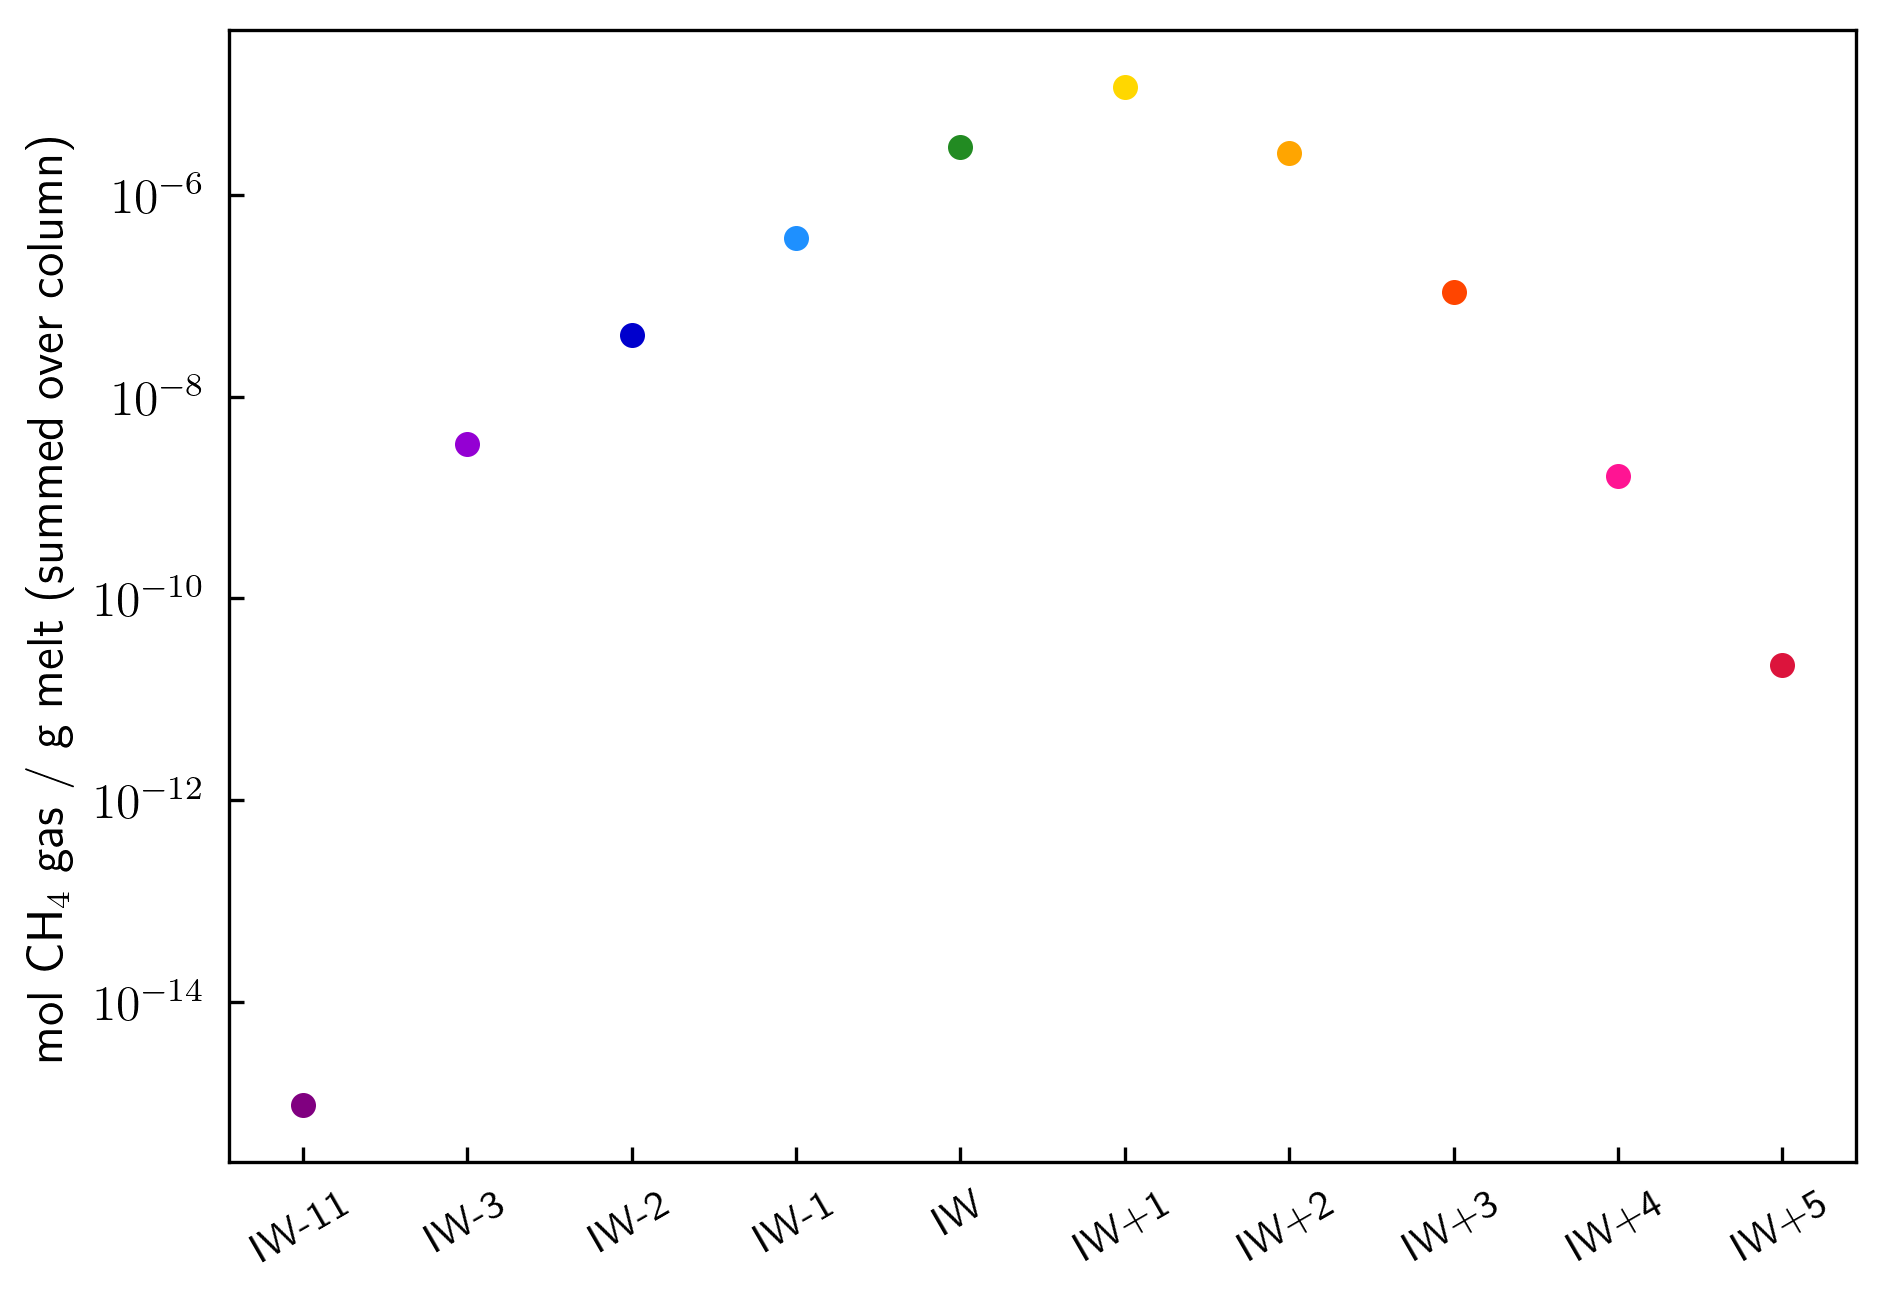

In [61]:
X_names=['IW-11', 'IW-3', 'IW-2', 'IW-1', 'IW', 'IW+1', 'IW+2', 'IW+3', 'IW+4', 'IW+5']
Y = np.arange(1,11,1)

fig, ax =plt.subplots()
plt.errorbar(1, np.mean(IWm11_SUM_Flux), yerr=calc95confidenceint(IWm11_SUM_Flux), marker='.', ms=10, color='purple')
plt.errorbar(2, np.mean(IWm3_SUM_Flux), yerr=calc95confidenceint(IWm3_SUM_Flux), marker='.', ms=10, color='darkviolet')
plt.errorbar(3, np.mean(IWm2_SUM_Flux), yerr=calc95confidenceint(IWm2_SUM_Flux), marker='.', ms=10, color='mediumblue')
plt.errorbar(4, np.mean(IWm1_SUM_Flux), yerr=calc95confidenceint(IWm1_SUM_Flux), marker='.', ms=10, color='dodgerblue')
plt.errorbar(5, np.mean(IW_SUM_Flux), yerr=calc95confidenceint(IW_SUM_Flux), marker='.', ms=10, color='forestgreen')
plt.errorbar(6, np.mean(IWp1_SUM_Flux), yerr=calc95confidenceint(IWp1_SUM_Flux), marker='.', ms=10, color='gold')
plt.errorbar(7, np.mean(IWp2_SUM_Flux), yerr=calc95confidenceint(IWp2_SUM_Flux), marker='.', ms=10, color='orange')
plt.errorbar(8, np.mean(IWp3_SUM_Flux), yerr=calc95confidenceint(IWp3_SUM_Flux), marker='.', ms=10, color='orangered')
plt.errorbar(9, np.mean(IWp4_SUM_Flux), yerr=calc95confidenceint(IWp4_SUM_Flux), marker='.', ms=10, color='deeppink')
plt.errorbar(10, np.mean(IWp5_SUM_Flux), yerr=calc95confidenceint(IWp5_SUM_Flux), marker='.', ms=10, color='crimson')

ax.set_xticks(Y)
ax.set_xticklabels(X_names, rotation=30, fontsize=10)
plt.yscale('log')
#plt.ylim(-0.006,1e-2)
plt.ylabel(r'mol CH$_{4}$ gas / g melt (summed over column)')
#plt.savefig('CH4Abundance_ExploreAllParams.jpg', dpi=1000)
plt.show()

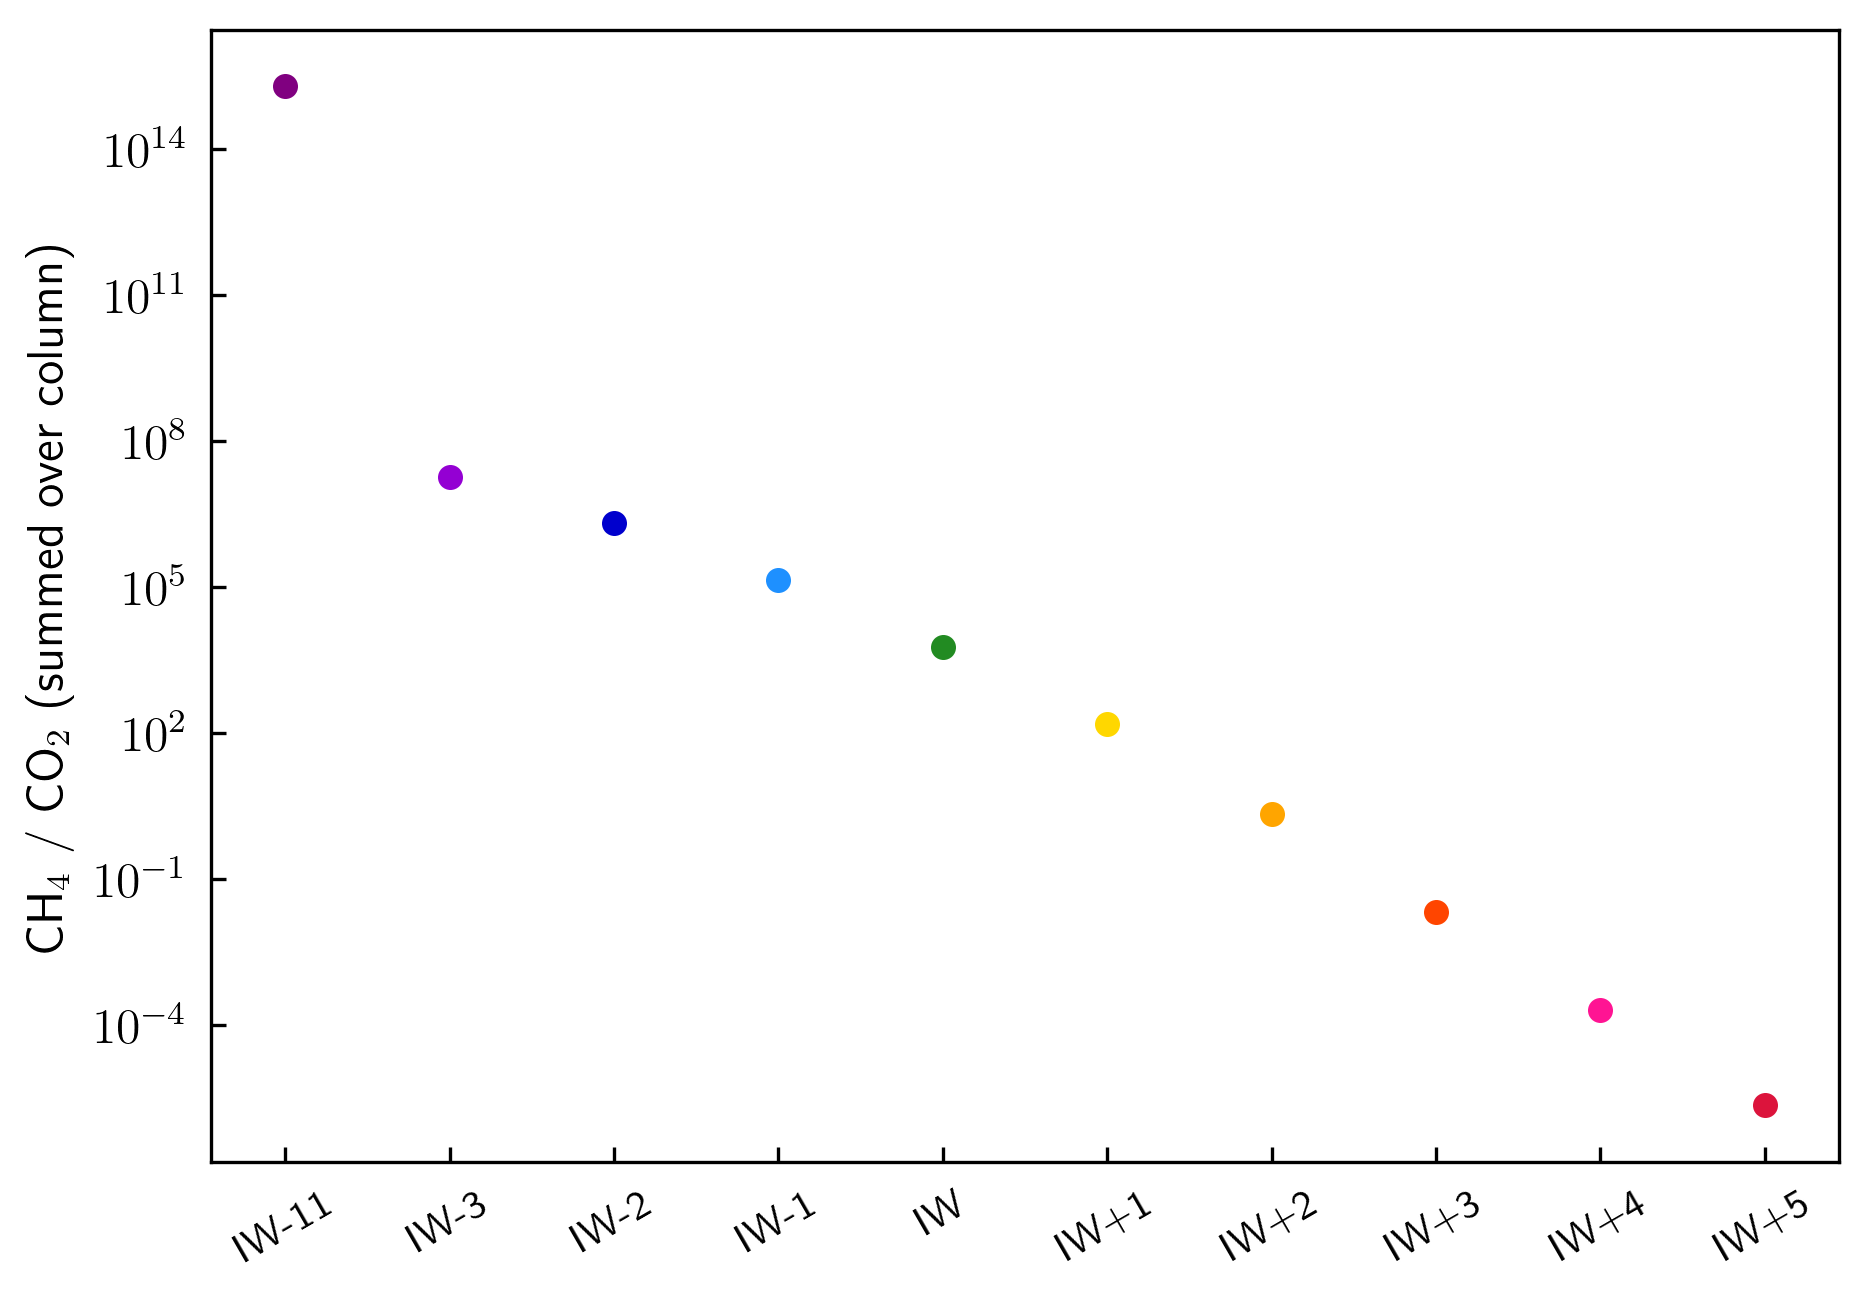

In [64]:
X_names=['IW-11', 'IW-3', 'IW-2', 'IW-1', 'IW', 'IW+1', 'IW+2', 'IW+3', 'IW+4', 'IW+5']
Y = np.arange(1,11,1)

fig, ax =plt.subplots()
plt.errorbar(1, np.mean(IWm11_SUM_Ratio), yerr=calc95confidenceint(IWm11_SUM_Ratio), marker='.', ms=10, color='purple')
plt.errorbar(2, np.mean(IWm3_SUM_Ratio), yerr=calc95confidenceint(IWm3_SUM_Ratio), marker='.', ms=10, color='darkviolet')
plt.errorbar(3, np.mean(IWm2_SUM_Ratio), yerr=calc95confidenceint(IWm2_SUM_Ratio), marker='.', ms=10, color='mediumblue')
plt.errorbar(4, np.mean(IWm1_SUM_Ratio), yerr=calc95confidenceint(IWm1_SUM_Ratio), marker='.', ms=10, color='dodgerblue')
plt.errorbar(5, np.mean(IW_SUM_Ratio), yerr=calc95confidenceint(IW_SUM_Ratio), marker='.', ms=10, color='forestgreen')
plt.errorbar(6, np.mean(IWp1_SUM_Ratio), yerr=calc95confidenceint(IWp1_SUM_Ratio), marker='.', ms=10, color='gold')
plt.errorbar(7, np.mean(IWp2_SUM_Ratio), yerr=calc95confidenceint(IWp2_SUM_Ratio), marker='.', ms=10, color='orange')
plt.errorbar(8, np.mean(IWp3_SUM_Ratio), yerr=calc95confidenceint(IWp3_SUM_Ratio), marker='.', ms=10, color='orangered')
plt.errorbar(9, np.mean(IWp4_SUM_Ratio), yerr=calc95confidenceint(IWp4_SUM_Ratio), marker='.', ms=10, color='deeppink')
plt.errorbar(10, np.mean(IWp5_SUM_Ratio), yerr=calc95confidenceint(IWp5_SUM_Ratio), marker='.', ms=10, color='crimson')

ax.set_xticks(Y)
ax.set_xticklabels(X_names, rotation=30, fontsize=10)
plt.yscale('log')
#plt.ylim(-0.006,1e-2)
plt.ylabel(r'CH$_{4}$ / CO$_{2}$ (summed over column)')
#plt.savefig('CH4Abundance_ExploreAllParams.jpg', dpi=1000)
plt.show()

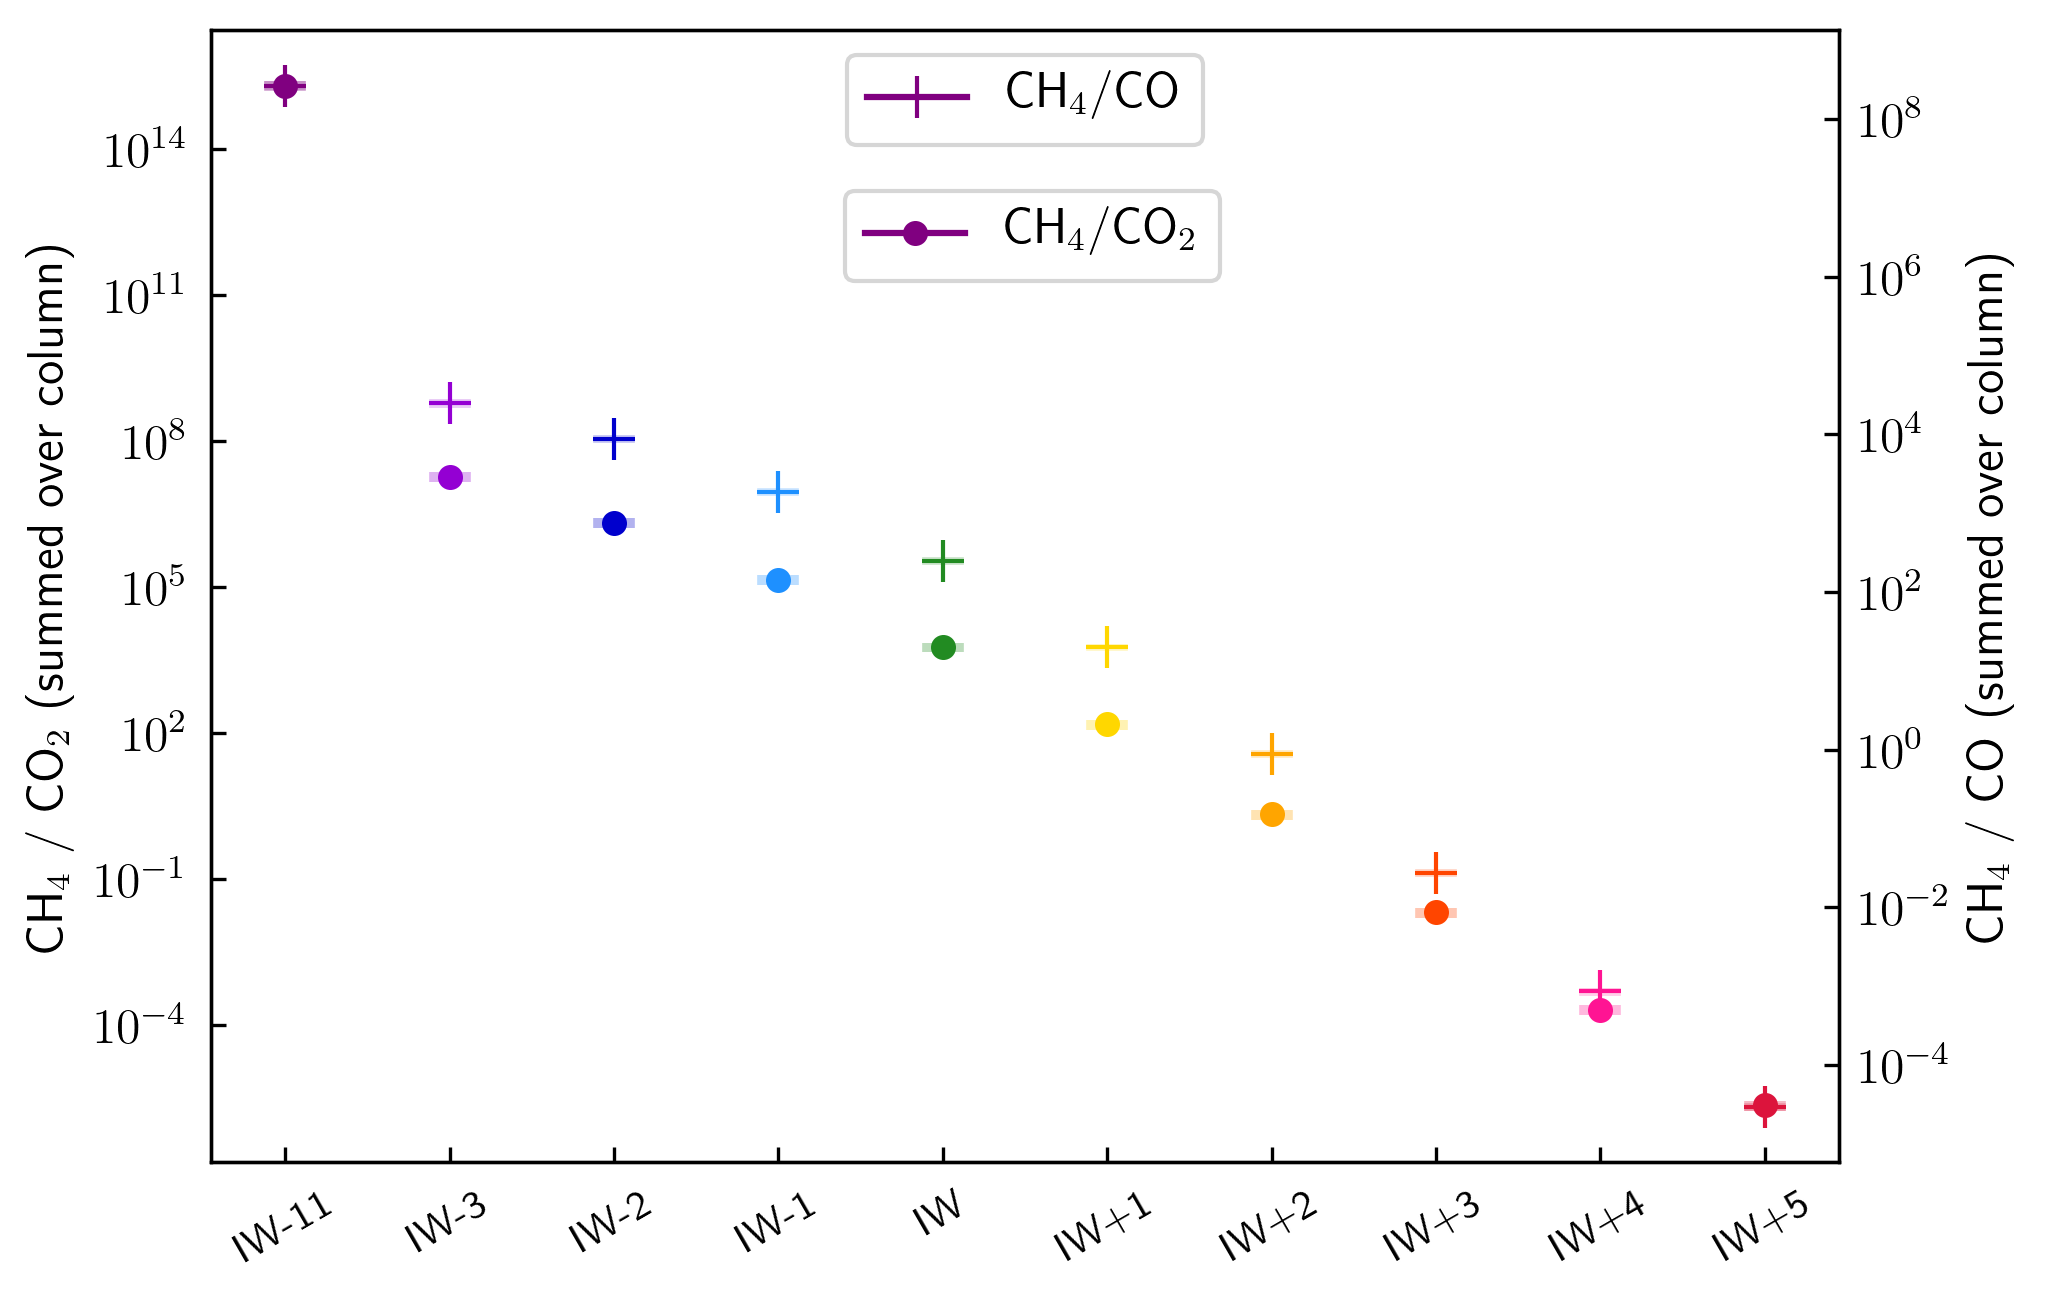

In [67]:
fig, ax1 =plt.subplots()
ax1.plot(1, np.mean(IWm11_SUM_Ratio), marker='.', ms=10, color='purple', label=r'CH$_{4}$/CO$_{2}$')
ax1.fill_between([1], np.mean(IWm11_SUM_Ratio)-calc95confidenceint(IWm11_SUM_Ratio), np.mean(IWm11_SUM_Ratio)+calc95confidenceint(IWm11_SUM_Ratio), color='purple', lw=10, alpha=0.3)
ax1.plot(2, np.mean(IWm3_SUM_Ratio),  marker='.', ms=10, color='darkviolet')
ax1.fill_between([2], np.mean(IWm3_SUM_Ratio)-calc95confidenceint(IWm3_SUM_Ratio), np.mean(IWm3_SUM_Ratio)+calc95confidenceint(IWm3_SUM_Ratio), color='darkviolet', lw=10, alpha=0.3)
ax1.plot(3, np.mean(IWm2_SUM_Ratio),  marker='.', ms=10, color='mediumblue')
ax1.fill_between([3], np.mean(IWm2_SUM_Ratio)-calc95confidenceint(IWm2_SUM_Ratio), np.mean(IWm2_SUM_Ratio)+calc95confidenceint(IWm2_SUM_Ratio), color='mediumblue', lw=10, alpha=0.3)
ax1.plot(4, np.mean(IWm1_SUM_Ratio),  marker='.', ms=10, color='dodgerblue')
ax1.fill_between([4], np.mean(IWm1_SUM_Ratio)-calc95confidenceint(IWm1_SUM_Ratio), np.mean(IWm1_SUM_Ratio)+calc95confidenceint(IWm1_SUM_Ratio), color='dodgerblue', lw=10, alpha=0.3)
ax1.plot(5, np.mean(IW_SUM_Ratio),  marker='.', ms=10, color='forestgreen')
ax1.fill_between([5], np.mean(IW_SUM_Ratio)-calc95confidenceint(IW_SUM_Ratio), np.mean(IW_SUM_Ratio)+calc95confidenceint(IW_SUM_Ratio), color='forestgreen', lw=10, alpha=0.3)
ax1.plot(6, np.mean(IWp1_SUM_Ratio),  marker='.', ms=10, color='gold')
ax1.fill_between([6], np.mean(IWp1_SUM_Ratio)-calc95confidenceint(IWp1_SUM_Ratio), np.mean(IWp1_SUM_Ratio)+calc95confidenceint(IWp1_SUM_Ratio), color='gold', lw=10, alpha=0.3)
ax1.plot(7, np.mean(IWp2_SUM_Ratio),  marker='.', ms=10, color='orange')
ax1.fill_between([7], np.mean(IWp2_SUM_Ratio)-calc95confidenceint(IWp2_SUM_Ratio), np.mean(IWp2_SUM_Ratio)+calc95confidenceint(IWp2_SUM_Ratio), color='orange', lw=10, alpha=0.3)
ax1.plot(8, np.mean(IWp3_SUM_Ratio),  marker='.', ms=10, color='orangered')
ax1.fill_between([8], np.mean(IWp3_SUM_Ratio)-calc95confidenceint(IWp3_SUM_Ratio), np.mean(IWp3_SUM_Ratio)+calc95confidenceint(IWp3_SUM_Ratio), color='orangered', lw=10, alpha=0.3)
ax1.plot(9, np.mean(IWp4_SUM_Ratio), marker='.', ms=10, color='deeppink')
ax1.fill_between([9], np.mean(IWp4_SUM_Ratio)-calc95confidenceint(IWp4_SUM_Ratio), np.mean(IWp4_SUM_Ratio)+calc95confidenceint(IWp4_SUM_Ratio), color='deeppink', lw=10, alpha=0.3)
ax1.plot(10, np.mean(IWp5_SUM_Ratio),  marker='.', ms=10, color='crimson')
ax1.fill_between([10], np.mean(IWp5_SUM_Ratio)-calc95confidenceint(IWp5_SUM_Ratio), np.mean(IWp5_SUM_Ratio)+calc95confidenceint(IWp5_SUM_Ratio), color='crimson', lw=10, alpha=0.3)
plt.legend(bbox_to_anchor=(0.635,0.88))
ax2 = ax1.twinx()
ax2.plot(1, np.mean(IWm11_CORatio), marker='+', ms=10, color='purple', label='CH$_{4}$/CO')
ax2.fill_between([1], np.mean(IWm11_CORatio)-calc95confidenceint(IWm11_CORatio), np.mean(IWm11_CORatio)+calc95confidenceint(IWm11_CORatio), color='purple', lw=10, alpha=0.2, hatch='-')
ax2.plot(2, np.mean(IWm3_CORatio), marker='+', ms=10, color='darkviolet')
ax2.fill_between([2], np.mean(IWm3_CORatio)-calc95confidenceint(IWm3_CORatio), np.mean(IWm3_CORatio)+calc95confidenceint(IWm3_CORatio), color='darkviolet', lw=10, alpha=0.2)
ax2.plot(3, np.mean(IWm2_CORatio), marker='+', ms=10, color='mediumblue')
ax2.fill_between([3], np.mean(IWm2_CORatio)-calc95confidenceint(IWm2_CORatio), np.mean(IWm2_CORatio)+calc95confidenceint(IWm2_CORatio), color='mediumblue', lw=10, alpha=0.2)
ax2.plot(4, np.mean(IWm1_CORatio), marker='+', ms=10, color='dodgerblue')
ax2.fill_between([4], np.mean(IWm1_CORatio)-calc95confidenceint(IWm1_CORatio), np.mean(IWm1_CORatio)+calc95confidenceint(IWm1_CORatio), color='dodgerblue', lw=10, alpha=0.2)
ax2.plot(5, np.mean(IW_CORatio), marker='+', ms=10, color='forestgreen')
ax2.fill_between([5], np.mean(IW_CORatio)-calc95confidenceint(IW_CORatio), np.mean(IW_CORatio)+calc95confidenceint(IW_CORatio), color='forestgreen', lw=10, alpha=0.2)
ax2.plot(6, np.mean(IWp1_CORatio), marker='+', ms=10, color='gold')
ax2.fill_between([6], np.mean(IWp1_CORatio)-calc95confidenceint(IWp1_CORatio), np.mean(IWp1_CORatio)+calc95confidenceint(IWp1_CORatio), color='gold', lw=10, alpha=0.2)
ax2.plot(7, np.mean(IWp2_CORatio), marker='+', ms=10, color='orange')
ax2.fill_between([7], np.mean(IWp2_CORatio)-calc95confidenceint(IWp2_CORatio), np.mean(IWp2_CORatio)+calc95confidenceint(IWp2_CORatio), color='orange', lw=10, alpha=0.2, hatch='-')
ax2.plot(8, np.mean(IWp3_CORatio), marker='+', ms=10, color='orangered')
ax2.fill_between([8], np.mean(IWp3_CORatio)-calc95confidenceint(IWp3_CORatio), np.mean(IWp3_CORatio)+calc95confidenceint(IWp3_CORatio), color='orangered', lw=10, alpha=0.2)
ax2.plot(9, np.mean(IWp4_CORatio), marker='+', ms=10, color='deeppink')
ax2.fill_between([9], np.mean(IWp4_CORatio)-calc95confidenceint(IWp4_CORatio), np.mean(IWp4_CORatio)+calc95confidenceint(IWp4_CORatio), color='deeppink', lw=10, alpha=0.2)
ax2.plot(10, np.mean(IWp5_CORatio), marker='+', ms=10, color='crimson')
ax2.fill_between([10], np.mean(IWp5_CORatio)-calc95confidenceint(IWp5_CORatio), np.mean(IWp5_CORatio)+calc95confidenceint(IWp5_CORatio), color='crimson', lw=10, alpha=0.2)



ax1.set_xticks(Y)
ax1.set_xticklabels(X_names, rotation=30, fontsize=10)
ax1.set_yscale('log')
#plt.ylim(-0.006,1e-2)
ax1.set_ylabel(r'CH$_{4}$ / CO$_{2}$ (summed over column)')
ax2.set_ylabel(r'CH$_{4}$ / CO (summed over column)')
ax2.set_yscale('log')
plt.legend(loc=9)
#plt.savefig('CH4AbundanceRatios_ExploreAllParams.jpg', dpi=1000)
plt.show()

In [5]:
def calcratio(file, a, b, N):
    Ratio_Arr = []
    for i in np.arange(0,N,1):
        c=51
        Val = np.sum(file[a][i*c:(c*(i+1))]/file[b][i*c:(c*(i+1))])
        Ratio_Arr.append(Val)
    return Ratio_Arr

def calcsumvalue(file, a, N):
    sum_arr = []
    for i in np.arange(0,N,1):
        c=51
        val = np.sum(file[a][i*c:(c*(i+1))])
        sum_arr.append(val)
    return sum_arr

def calcavgvalue(file, a, N):
    avg_arr = []
    for i in np.arange(0,N,1):
        c=51
        val = np.mean(file[a][i*c:(c*(i+1))])
        avg_arr.append(val)
    return avg_arr

#### Plot Outgassing Fluxes

In [6]:
IW_CH4 = calcsumvalue(IW_RES_Full, 'F_CH4', 1000)
IWm1_CH4 = calcsumvalue(IWm1_RES_Full, 'F_CH4',  1000)
IWm2_CH4 = calcsumvalue(IWm2_RES_Full, 'F_CH4', 1000)
IWm3_CH4 = calcsumvalue(IWm3_RES_Full, 'F_CH4',  1000)
IWm11_CH4 = calcsumvalue(IWm11_RES_Full, 'F_CH4', 1000)

IWp1_CH4 = calcsumvalue(IWp1_RES_Full, 'F_CH4',  1000)
IWp2_CH4 = calcsumvalue(IWp2_RES_Full, 'F_CH4', 1000)
IWp3_CH4= calcsumvalue(IWp3_RES_Full, 'F_CH4',  1000)
IWp4_CH4 = calcsumvalue(IWp4_RES_Full, 'F_CH4', 1000)
IWp5_CH4 = calcsumvalue(IWp5_RES_Full, 'F_CH4',  1000)

In [7]:
IW_CO2 = calcsumvalue(IW_RES_Full, 'F_CO2', 1000)
IWm1_CO2 = calcsumvalue(IWm1_RES_Full, 'F_CO2',  1000)
IWm2_CO2 = calcsumvalue(IWm2_RES_Full, 'F_CO2', 1000)
IWm3_CO2 = calcsumvalue(IWm3_RES_Full, 'F_CO2',  1000)
IWm11_CO2 = calcsumvalue(IWm11_RES_Full, 'F_CO2', 1000)

IWp1_CO2 = calcsumvalue(IWp1_RES_Full, 'F_CO2',  1000)
IWp2_CO2 = calcsumvalue(IWp2_RES_Full, 'F_CO2', 1000)
IWp3_CO2= calcsumvalue(IWp3_RES_Full, 'F_CO2',  1000)
IWp4_CO2 = calcsumvalue(IWp4_RES_Full, 'F_CO2', 1000)
IWp5_CO2 = calcsumvalue(IWp5_RES_Full, 'F_CO2',  1000)

In [8]:
IW_CO = calcsumvalue(IW_RES_Full, 'F_CO', 1000)
IWm1_CO = calcsumvalue(IWm1_RES_Full, 'F_CO',  1000)
IWm2_CO = calcsumvalue(IWm2_RES_Full, 'F_CO', 1000)
IWm3_CO = calcsumvalue(IWm3_RES_Full, 'F_CO',  1000)
IWm11_CO = calcsumvalue(IWm11_RES_Full, 'F_CO', 1000)

IWp1_CO = calcsumvalue(IWp1_RES_Full, 'F_CO',  1000)
IWp2_CO = calcsumvalue(IWp2_RES_Full, 'F_CO', 1000)
IWp3_CO= calcsumvalue(IWp3_RES_Full, 'F_CO',  1000)
IWp4_CO = calcsumvalue(IWp4_RES_Full, 'F_CO', 1000)
IWp5_CO = calcsumvalue(IWp5_RES_Full, 'F_CO',  1000)

In [9]:
IW_Graphite = calcavgvalue(IW_RES_Full, 'Remaining_graphite', 1000)
IWm1_Graphite = calcavgvalue(IWm1_RES_Full, 'Remaining_graphite',  1000)
IWm2_Graphite = calcavgvalue(IWm2_RES_Full, 'Remaining_graphite', 1000)
IWm3_Graphite = calcavgvalue(IWm3_RES_Full, 'Remaining_graphite',  1000)
IWm11_Graphite = calcavgvalue(IWm11_RES_Full, 'Remaining_graphite', 1000)

IWp1_Graphite = calcavgvalue(IWp1_RES_Full, 'Remaining_graphite',  1000)
IWp2_Graphite = calcavgvalue(IWp2_RES_Full, 'Remaining_graphite', 1000)
IWp3_Graphite= calcavgvalue(IWp3_RES_Full, 'Remaining_graphite',  1000)
IWp4_Graphite = calcavgvalue(IWp4_RES_Full, 'Remaining_graphite', 1000)
IWp5_Graphite = calcavgvalue(IWp5_RES_Full, 'Remaining_graphite',  1000)

In [10]:
IW_OC = calcavgvalue(IW_RES_Full, 'Original_carbon', 1000)
IWm1_OC = calcavgvalue(IWm1_RES_Full, 'Original_carbon',  1000)
IWm2_OC = calcavgvalue(IWm2_RES_Full, 'Original_carbon', 1000)
IWm3_OC = calcavgvalue(IWm3_RES_Full, 'Original_carbon',  1000)
IWm11_OC = calcavgvalue(IWm11_RES_Full, 'Original_carbon', 1000)

IWp1_OC = calcavgvalue(IWp1_RES_Full, 'Original_carbon',  1000)
IWp2_OC = calcavgvalue(IWp2_RES_Full, 'Original_carbon', 1000)
IWp3_OC= calcavgvalue(IWp3_RES_Full, 'Original_carbon',  1000)
IWp4_OC = calcavgvalue(IWp4_RES_Full, 'Original_carbon', 1000)
IWp5_OC = calcavgvalue(IWp5_RES_Full, 'Original_carbon',  1000)

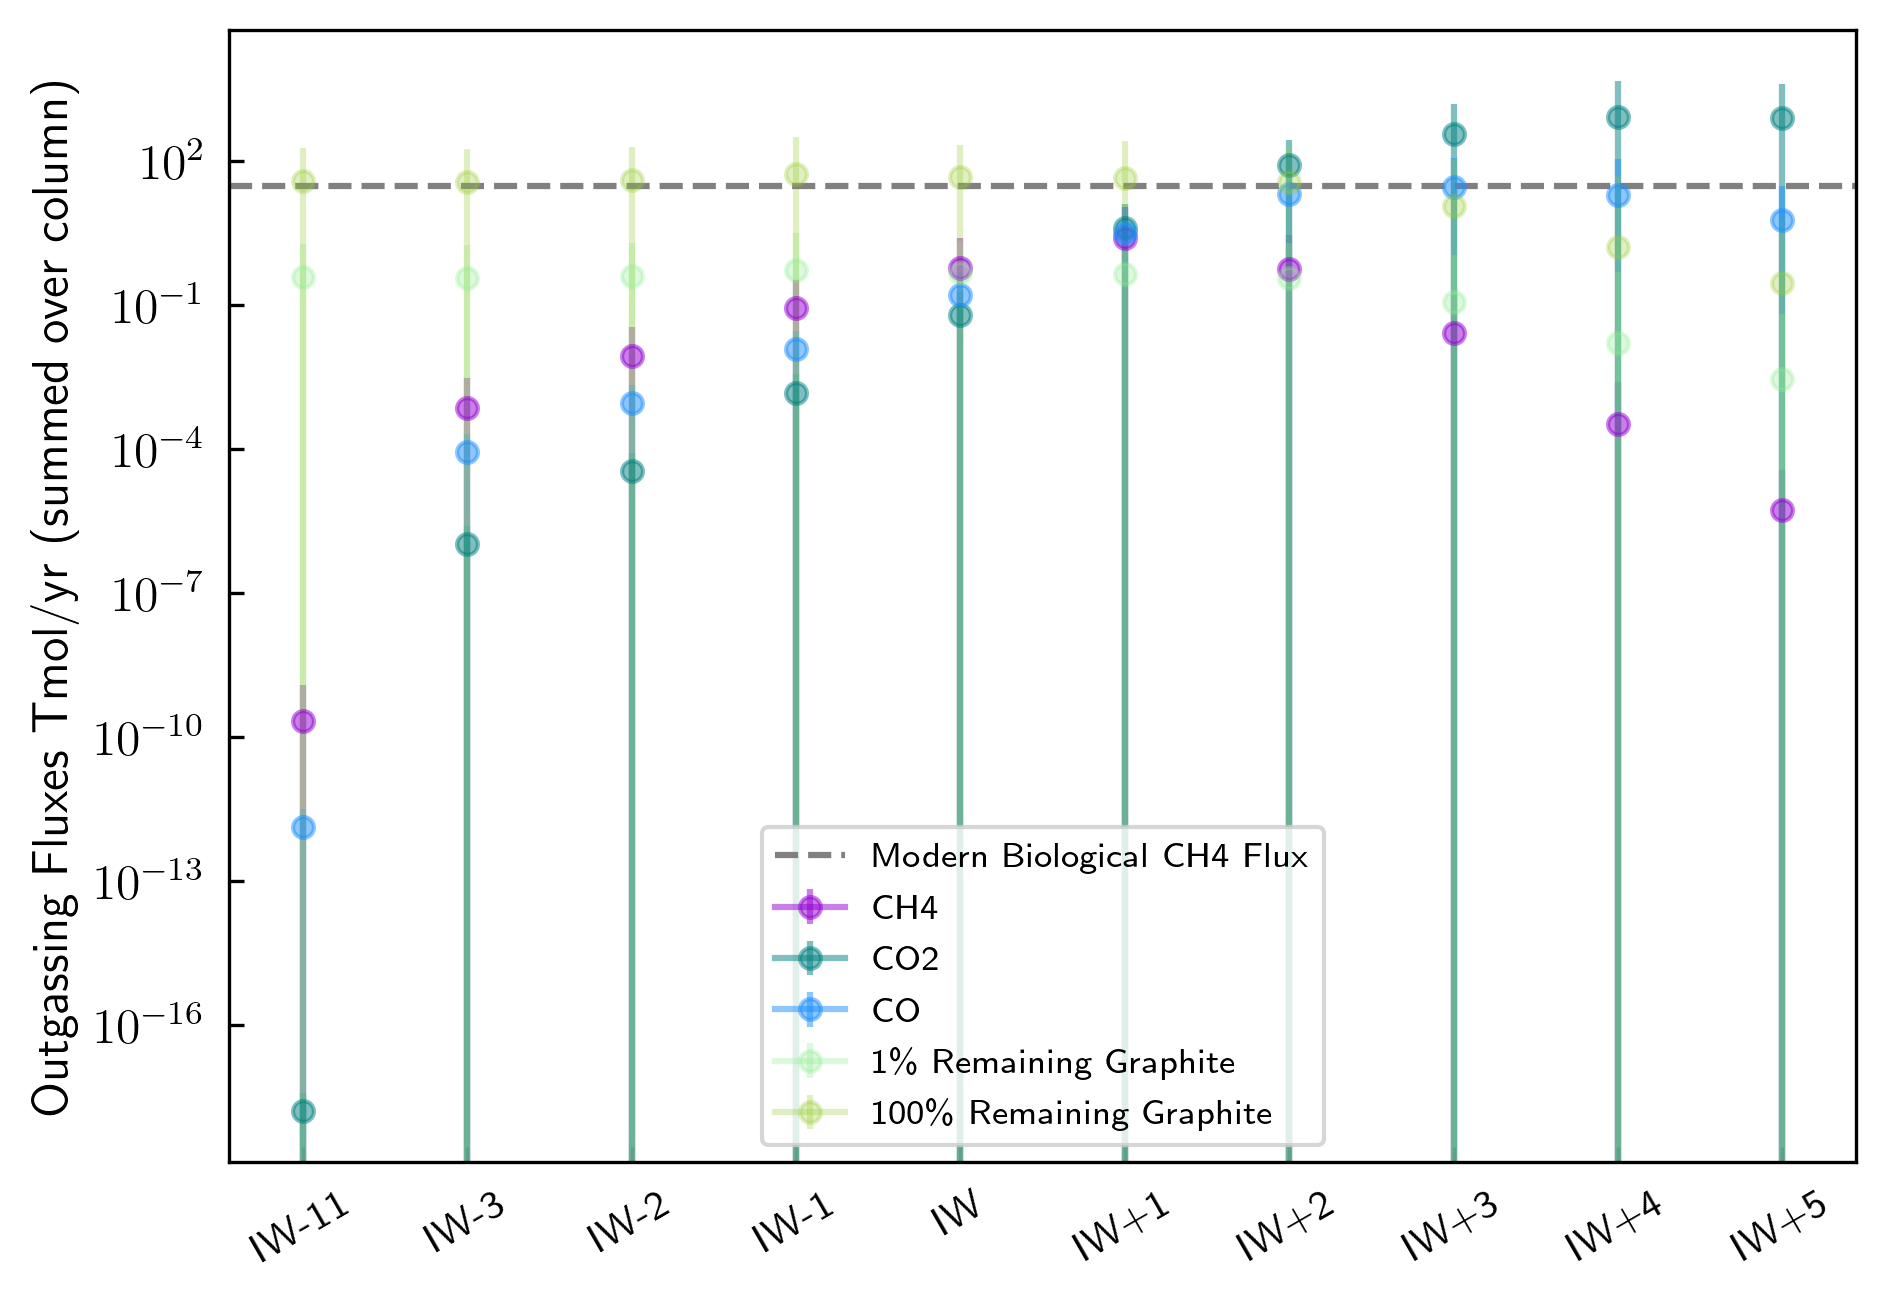

In [13]:
X_names=['IW-11', 'IW-3', 'IW-2', 'IW-1', 'IW', 'IW+1', 'IW+2', 'IW+3', 'IW+4', 'IW+5']
Y = np.arange(1,11,1)

fig, ax =plt.subplots()
Tmol_yr = (60*60*24*365)/1e12
plt.errorbar(1, np.mean(IWm11_CH4)*Tmol_yr, yerr=np.std(IWm11_CH4)*Tmol_yr, marker='.', alpha=0.5, ms=10, color='darkviolet', label='CH4')
plt.errorbar(2, np.mean(IWm3_CH4)*Tmol_yr, yerr=np.std(IWm3_CH4)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='darkviolet')
plt.errorbar(3, np.mean(IWm2_CH4)*Tmol_yr, yerr=np.std(IWm2_CH4)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='darkviolet')
plt.errorbar(4, np.mean(IWm1_CH4)*Tmol_yr, yerr=np.std(IWm1_CH4)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='darkviolet')
plt.errorbar(5, np.mean(IW_CH4)*Tmol_yr, yerr=np.std(IW_CH4)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='darkviolet')
plt.errorbar(6, np.mean(IWp1_CH4)*Tmol_yr, yerr=np.std(IWp1_CH4)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='darkviolet')
plt.errorbar(7, np.mean(IWp2_CH4)*Tmol_yr, yerr=np.std(IWp2_CH4)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='darkviolet')
plt.errorbar(8, np.mean(IWp3_CH4)*Tmol_yr, yerr=np.std(IWp3_CH4)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='darkviolet')
plt.errorbar(9, np.mean(IWp4_CH4)*Tmol_yr, yerr=np.std(IWp4_CH4)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='darkviolet')
plt.errorbar(10, np.mean(IWp5_CH4)*Tmol_yr, yerr=np.std(IWp5_CH4)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='darkviolet')

plt.errorbar(1, np.mean(IWm11_CO2)*Tmol_yr, yerr=np.std(IWm11_CO2)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='teal', label='CO2')
plt.errorbar(2, np.mean(IWm3_CO2)*Tmol_yr, yerr=np.std(IWm3_CO2)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='teal')
plt.errorbar(3, np.mean(IWm2_CO2)*Tmol_yr, yerr=np.std(IWm2_CO2)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='teal')
plt.errorbar(4, np.mean(IWm1_CO2)*Tmol_yr, yerr=np.std(IWm1_CO2)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='teal')
plt.errorbar(5, np.mean(IW_CO2)*Tmol_yr, yerr=np.std(IW_CO2)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='teal')
plt.errorbar(6, np.mean(IWp1_CO2)*Tmol_yr, yerr=np.std(IWp1_CO2)*Tmol_yr, marker='.',alpha=0.5, ms=10, color='teal')
plt.errorbar(7, np.mean(IWp2_CO2)*Tmol_yr, yerr=np.std(IWp2_CO2)*Tmol_yr, marker='.',alpha=0.5, ms=10, color='teal')
plt.errorbar(8, np.mean(IWp3_CO2)*Tmol_yr, yerr=np.std(IWp3_CO2)*Tmol_yr, marker='.',alpha=0.5, ms=10, color='teal')
plt.errorbar(9, np.mean(IWp4_CO2)*Tmol_yr, yerr=np.std(IWp4_CO2)*Tmol_yr, marker='.',alpha=0.5, ms=10, color='teal')
plt.errorbar(10, np.mean(IWp5_CO2)*Tmol_yr, yerr=np.std(IWp5_CO2)*Tmol_yr, marker='.',alpha=0.5, ms=10, color='teal')

plt.errorbar(1, np.mean(IWm11_CO)*Tmol_yr, yerr=np.std(IWm11_CO)*Tmol_yr, marker='.',alpha=0.5, ms=10, color='dodgerblue', label='CO')
plt.errorbar(2, np.mean(IWm3_CO)*Tmol_yr, yerr=np.std(IWm3_CO)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='dodgerblue')
plt.errorbar(3, np.mean(IWm2_CO)*Tmol_yr, yerr=np.std(IWm2_CO)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='dodgerblue')
plt.errorbar(4, np.mean(IWm1_CO)*Tmol_yr, yerr=np.std(IWm1_CO)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='dodgerblue')
plt.errorbar(5, np.mean(IW_CO)*Tmol_yr, yerr=np.std(IW_CO)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='dodgerblue')
plt.errorbar(6, np.mean(IWp1_CO)*Tmol_yr, yerr=np.std(IWp1_CO)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='dodgerblue')
plt.errorbar(7, np.mean(IWp2_CO)*Tmol_yr, yerr=np.std(IWp2_CO)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='dodgerblue')
plt.errorbar(8, np.mean(IWp3_CO)*Tmol_yr, yerr=np.std(IWp3_CO)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='dodgerblue')
plt.errorbar(9, np.mean(IWp4_CO)*Tmol_yr, yerr=np.std(IWp4_CO)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='dodgerblue')
plt.errorbar(10, np.mean(IWp5_CO)*Tmol_yr, yerr=np.std(IWp5_CO)*Tmol_yr, marker='.', alpha=0.5,ms=10, color='dodgerblue')

g_s_to_Tmol_yr= (60*60*24*365)/(16.04*1e12)
N=0.01
plt.errorbar(1, N*np.mean(IWm11_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWm11_Graphite)*g_s_to_Tmol_yr*N, alpha=0.3,marker='.', ms=10, color='lightgreen', label=r'1\% Remaining Graphite')
plt.errorbar(2, N*np.mean(IWm3_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWm3_Graphite)*g_s_to_Tmol_yr*N, alpha=0.3,marker='.', ms=10, color='lightgreen')
plt.errorbar(3, N*np.mean(IWm2_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWm2_Graphite)*g_s_to_Tmol_yr*N, alpha=0.3,marker='.', ms=10, color='lightgreen')
plt.errorbar(4, N*np.mean(IWm1_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWm1_Graphite)*g_s_to_Tmol_yr*N, alpha=0.3,marker='.', ms=10, color='lightgreen')
plt.errorbar(5, N*np.mean(IW_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IW_Graphite)*g_s_to_Tmol_yr*N, alpha=0.3,marker='.', ms=10, color='lightgreen')
plt.errorbar(6, N*np.mean(IWp1_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWp1_Graphite)*g_s_to_Tmol_yr*N,alpha=0.3,marker='.', ms=10, color='lightgreen')
plt.errorbar(7, N*np.mean(IWp2_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWp2_Graphite)*g_s_to_Tmol_yr*N, alpha=0.3,marker='.', ms=10, color='lightgreen')
plt.errorbar(8, N*np.mean(IWp3_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWp3_Graphite)*g_s_to_Tmol_yr*N, alpha=0.3,marker='.', ms=10, color='lightgreen')
plt.errorbar(9, N*np.mean(IWp4_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWp4_Graphite)*g_s_to_Tmol_yr*N, alpha=0.3,marker='.', ms=10, color='lightgreen')
plt.errorbar(10, N*np.mean(IWp5_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWp5_Graphite)*g_s_to_Tmol_yr*N, alpha=0.3,marker='.', ms=10, color='lightgreen')

plt.errorbar(1, np.mean(IWm11_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWm11_Graphite)*g_s_to_Tmol_yr, alpha=0.3,marker='.', ms=10, color='yellowgreen', label=r'100\% Remaining Graphite')
plt.errorbar(2, np.mean(IWm3_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWm3_Graphite)*g_s_to_Tmol_yr, alpha=0.3,marker='.', ms=10, color='yellowgreen')
plt.errorbar(3, np.mean(IWm2_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWm2_Graphite)*g_s_to_Tmol_yr, alpha=0.3,marker='.', ms=10, color='yellowgreen')
plt.errorbar(4, np.mean(IWm1_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWm1_Graphite)*g_s_to_Tmol_yr, alpha=0.3,marker='.', ms=10, color='yellowgreen')
plt.errorbar(5, np.mean(IW_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IW_Graphite)*g_s_to_Tmol_yr, alpha=0.3,marker='.', ms=10, color='yellowgreen')
plt.errorbar(6, np.mean(IWp1_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWp1_Graphite)*g_s_to_Tmol_yr, alpha=0.3,marker='.', ms=10, color='yellowgreen')
plt.errorbar(7, np.mean(IWp2_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWp2_Graphite)*g_s_to_Tmol_yr, alpha=0.3,marker='.', ms=10, color='yellowgreen')
plt.errorbar(8, np.mean(IWp3_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWp3_Graphite)*g_s_to_Tmol_yr, alpha=0.3,marker='.', ms=10, color='yellowgreen')
plt.errorbar(9, np.mean(IWp4_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWp4_Graphite)*g_s_to_Tmol_yr, alpha=0.3,marker='.', ms=10, color='yellowgreen')
plt.errorbar(10, np.mean(IWp5_Graphite)*g_s_to_Tmol_yr, yerr=np.std(IWp5_Graphite)*g_s_to_Tmol_yr, alpha=0.3,marker='.', ms=10, color='yellowgreen')

plt.axhline(y=30, linestyle='--', color='gray', label='Modern Biological CH4 Flux')
ax.set_xticks(Y)
ax.set_xticklabels(X_names, rotation=30, fontsize=10)
plt.yscale('log')
#plt.ylim(-0.006,1e-2)
plt.legend(fontsize='x-small', loc='lower center')
plt.ylabel(r'Outgassing Fluxes Tmol/yr (summed over column)')
plt.savefig('OutgassingFluxes_withGraphite.jpg', dpi=1000)
plt.show()

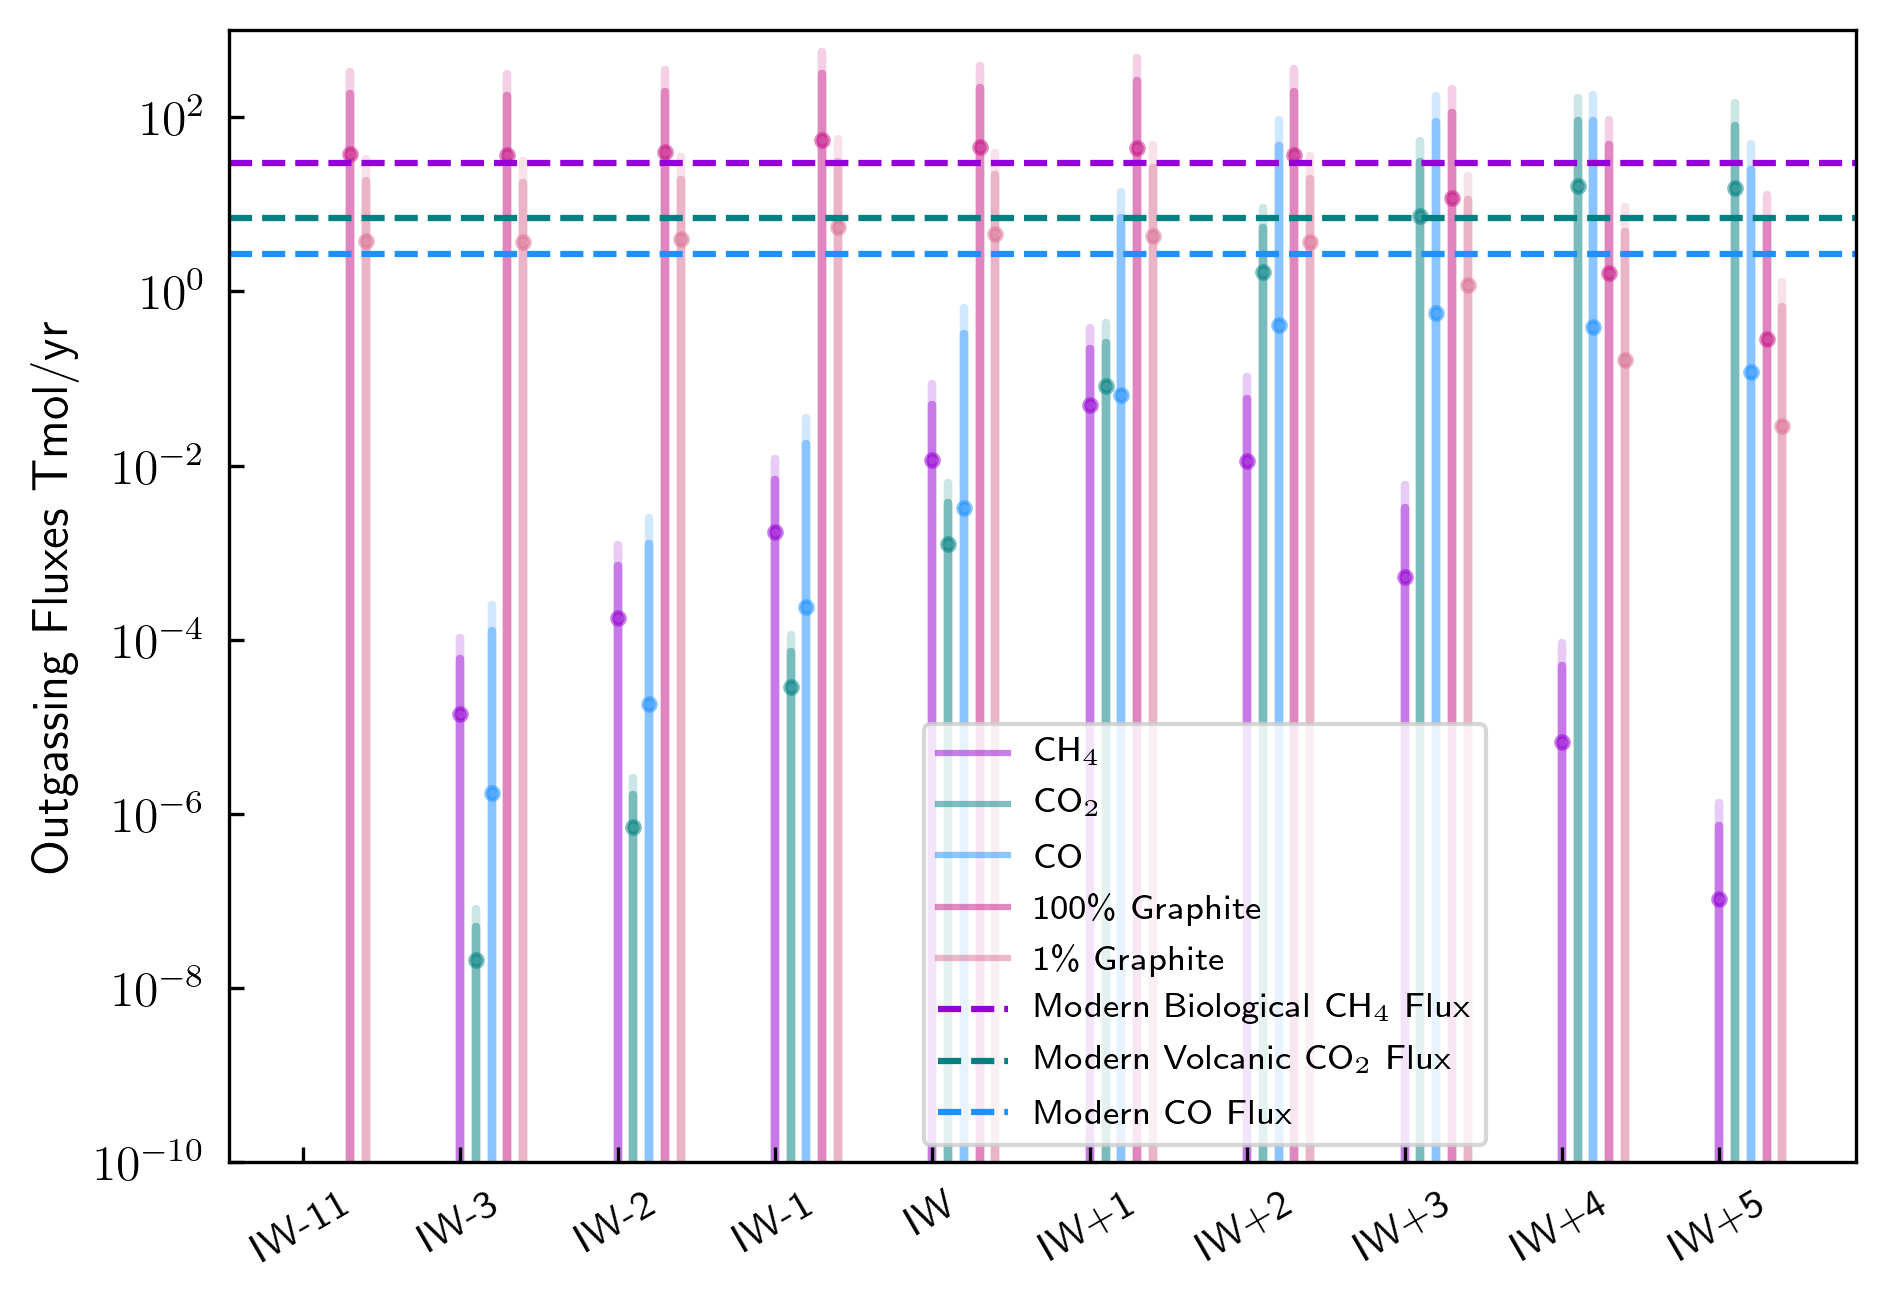

In [16]:
X_CH4=[IWm11_CH4, IWm3_CH4, IWm2_CH4, IWm1_CH4, IW_CH4, IWp1_CH4, IWp2_CH4, IWp3_CH4, IWp4_CH4, IWp5_CH4]
X_CO2=[IWm11_CO2, IWm3_CO2, IWm2_CO2, IWm1_CO2, IW_CO2, IWp1_CO2, IWp2_CO2, IWp3_CO2, IWp4_CO2, IWp5_CO2]
X_CO=[IWm11_CO, IWm3_CO, IWm2_CO, IWm1_CO, IW_CO, IWp1_CO, IWp2_CO, IWp3_CO, IWp4_CO, IWp5_CO]
X_Graphite=[IWm11_Graphite, IWm3_Graphite, IWm2_Graphite, IWm1_Graphite, IW_Graphite, IWp1_Graphite, IWp2_Graphite, IWp3_Graphite, IWp4_Graphite, IWp5_Graphite]

Y = np.arange(1,11,1)
import matplotlib.lines as mlines
fig, ax = plt.subplots()
Tmol_yr = (60*60*24*365)/1e12
for i,j in zip(X_CH4, Y):
    plt.fill_between(j, ((np.mean(i)/50*Tmol_yr)-(np.std(i)/50*Tmol_yr), (np.mean(i)/50*Tmol_yr)), ((np.mean(i)/50*Tmol_yr)+(np.std(i)/50*Tmol_yr), (np.mean(i)/50*Tmol_yr)), color='darkviolet', lw=2, alpha=0.4)
    plt.fill_between(j, ((np.mean(i)/50*Tmol_yr)-(2*np.std(i)/50*Tmol_yr), (np.mean(i)/50*Tmol_yr)), ((np.mean(i)/50*Tmol_yr)+(2*np.std(i)/50*Tmol_yr), (np.mean(i)/50*Tmol_yr)), color='darkviolet', lw=2, alpha=0.2)
    plt.plot(j, np.mean(i)/50*Tmol_yr, marker='.',alpha=0.5, ms=6, color='darkviolet')
for i, j in zip(X_CO2, Y):
    plt.fill_between(j+0.1, ((np.mean(i)/50*Tmol_yr)-(np.std(i)/50*Tmol_yr), (np.mean(i)/50*Tmol_yr)), ((np.mean(i)/50*Tmol_yr)+(np.std(i)/50*Tmol_yr), (np.mean(i)/50*Tmol_yr)), color='Teal', lw=2, alpha=0.4)
    plt.fill_between(j+0.1, ((np.mean(i)/50*Tmol_yr)-(2*np.std(i)/50*Tmol_yr), (np.mean(i)/50*Tmol_yr)), ((np.mean(i)/50*Tmol_yr)+(2*np.std(i)/50*Tmol_yr), (np.mean(i)/50*Tmol_yr)), color='Teal', lw=2, alpha=0.2)
    plt.plot(j+0.1, np.mean(i)/50*Tmol_yr, marker='.',alpha=0.5, ms=6, color='Teal')
for i, j in zip(X_CO, Y):
    plt.fill_between(j+0.2, ((np.mean(i)/50*Tmol_yr)-(np.std(i)/50*Tmol_yr), (np.mean(i)/50*Tmol_yr)), ((np.mean(i)/50*Tmol_yr)+(np.std(i)*Tmol_yr), (np.mean(i)/50*Tmol_yr)), color='dodgerblue', lw=2, alpha=0.4)
    plt.fill_between(j+0.2, ((np.mean(i)/50*Tmol_yr)-(2*np.std(i)/50*Tmol_yr), (np.mean(i)/50*Tmol_yr)), ((np.mean(i)/50*Tmol_yr)+(2*np.std(i)*Tmol_yr), (np.mean(i)/50*Tmol_yr)), color='dodgerblue', lw=2, alpha=0.2)
    plt.plot(j+0.2, np.mean(i)/50*Tmol_yr, marker='.',alpha=0.5, ms=6, color='dodgerblue')

g_s_to_Tmol_yr= (60*60*24*365)/(16.04*1e12)
for i, j in zip(X_Graphite, Y):
    plt.fill_between(j+0.3, ((np.mean(i)*g_s_to_Tmol_yr)-(np.std(i)*g_s_to_Tmol_yr), (np.mean(i)*g_s_to_Tmol_yr)), ((np.mean(i)*g_s_to_Tmol_yr)+(np.std(i)*g_s_to_Tmol_yr), (np.mean(i)*g_s_to_Tmol_yr)), color='mediumvioletred', lw=2, alpha=0.4)
    plt.fill_between(j+0.3, ((np.mean(i)*g_s_to_Tmol_yr)-(2*np.std(i)*g_s_to_Tmol_yr), (np.mean(i)*g_s_to_Tmol_yr)), ((np.mean(i)*g_s_to_Tmol_yr)+(2*np.std(i)*g_s_to_Tmol_yr), (np.mean(i)*g_s_to_Tmol_yr)), color='mediumvioletred', lw=2, alpha=0.2)
    plt.plot(j+0.3, np.mean(i)*g_s_to_Tmol_yr, marker='.',alpha=0.5, ms=6, color='mediumvioletred')
N=0.1
for i, j in zip(X_Graphite, Y):
    plt.fill_between(j+0.4, (N*((np.mean(i)*g_s_to_Tmol_yr)-(np.std(i)*g_s_to_Tmol_yr)), N*(np.mean(i)*g_s_to_Tmol_yr)), (N*((np.mean(i)*g_s_to_Tmol_yr)+(np.std(i)*g_s_to_Tmol_yr)), N*(np.mean(i)*g_s_to_Tmol_yr)), color='palevioletred', lw=2, alpha=0.4)
    plt.fill_between(j+0.4, (N*((np.mean(i)*g_s_to_Tmol_yr)-(2*np.std(i)*g_s_to_Tmol_yr)), N*(np.mean(i)*g_s_to_Tmol_yr)), (N*((np.mean(i)*g_s_to_Tmol_yr)+(2*np.std(i)*g_s_to_Tmol_yr)), N*(np.mean(i)*g_s_to_Tmol_yr)), color='palevioletred', lw=2, alpha=0.2)
    plt.plot(j+0.4, N*np.mean(i)*g_s_to_Tmol_yr, marker='.',alpha=0.5, ms=6, color='palevioletred')

#plt.axhline(y=752, linestyle='--', color='silver')
plt.axhline(y=30, linestyle='--', color='darkviolet')
plt.axhline(y=7, linestyle='--', color='Teal')
plt.axhline(y=2.7, linestyle='--', color='dodgerblue')

ax.set_xticks(Y)
ax.set_xticklabels(X_names, rotation=30, fontsize=10)
plt.yscale('log')
CH4_patch = mlines.Line2D([], [], color='darkviolet', alpha=0.5, label=r'CH$_4$')
CO2_patch = mlines.Line2D([], [], color='Teal', alpha=0.5, label=r'CO$_2$')
CO_patch = mlines.Line2D([], [], color='dodgerblue', alpha=0.5, label='CO')
Graph_patch = mlines.Line2D([], [], color='mediumvioletred', alpha=0.5, label=r'100\% Graphite')
Graph2_patch = mlines.Line2D([], [], color='palevioletred', alpha=0.5, label=r'1\% Graphite')
#CO2TotalFlux_patch = mlines.Line2D([], [], color='silver', ls='--', label=r'Modern CO$_2$ Flux')
BioFlux_patch = mlines.Line2D([], [], color='darkviolet', ls='--', label=r'Modern Biological CH$_4$ Flux')
CO2Earth_patch = mlines.Line2D([], [], color='Teal', ls='--', label=r'Modern Volcanic CO$_2$ Flux')
COEarth_patch = mlines.Line2D([], [], color='dodgerblue', ls='--', label='Modern CO Flux')

plt.legend(handles=[CH4_patch, CO2_patch, CO_patch, Graph_patch, Graph2_patch, BioFlux_patch, CO2Earth_patch, COEarth_patch], fontsize='x-small', loc='lower center', bbox_to_anchor=(0.4, 0., 0.4, 0.4))
plt.ylabel(r'Outgassing Fluxes Tmol/yr')
plt.ylim(1e-10, 1e3)
plt.savefig('OutgassingFluxes_withGraphiteUpdated.jpg', dpi=1000)
plt.show()


In [18]:
X_Graphite=[IWm11_Graphite, IWm3_Graphite, IWm2_Graphite, IWm1_Graphite, IW_Graphite, IWp1_Graphite, IWp2_Graphite, IWp3_Graphite, IWp4_Graphite, IWp5_Graphite]
X_OC=[IWm11_OC, IWm3_OC, IWm2_OC, IWm1_OC, IW_OC, IWp1_OC, IWp2_OC, IWp3_OC, IWp4_OC, IWp5_OC]

def calcratio(Graph_file, OC_file):
    ratio_arr = []
    for i,j in zip(Graph_file, OC_file):
        ratio = i/j
        ratio_arr.append(ratio)
    return ratio_arr

IWm11_Ratio = calcratio(IWm11_Graphite, IWm11_OC)
IWm3_Ratio = calcratio(IWm3_Graphite, IWm3_OC)
IWm2_Ratio = calcratio(IWm2_Graphite, IWm2_OC)
IWm1_Ratio = calcratio(IWm1_Graphite, IWm1_OC)
IW_Ratio = calcratio(IW_Graphite, IW_OC)
IWp1_Ratio = calcratio(IWp1_Graphite, IWp1_OC)
IWp2_Ratio = calcratio(IWp2_Graphite, IWp2_OC)
IWp3_Ratio = calcratio(IWp3_Graphite, IWp3_OC)
IWp4_Ratio = calcratio(IWp4_Graphite, IWp4_OC)
IWp5_Ratio = calcratio(IWp5_Graphite, IWp5_OC)



In [19]:
import scipy.stats as st
IWm11_confidenceInt95_Ratio = st.t.interval(alpha=0.95, df=len(IWm11_Ratio)-1, loc=np.mean(IWm11_Ratio), scale=st.sem(IWm11_Ratio)) 
IWm11_confidenceInt68_Ratio = st.t.interval(alpha=0.68, df=len(IWm11_Ratio)-1, loc=np.mean(IWm11_Ratio), scale=st.sem(IWm11_Ratio)) 

IWm3_confidenceInt95_Ratio = st.t.interval(alpha=0.95, df=len(IWm3_Ratio)-1, loc=np.mean(IWm3_Ratio), scale=st.sem(IWm3_Ratio)) 
IWm3_confidenceInt68_Ratio = st.t.interval(alpha=0.68, df=len(IWm3_Ratio)-1, loc=np.mean(IWm3_Ratio), scale=st.sem(IWm3_Ratio)) 

IWm2_confidenceInt95_Ratio = st.t.interval(alpha=0.95, df=len(IWm2_Ratio)-1, loc=np.mean(IWm2_Ratio), scale=st.sem(IWm2_Ratio)) 
IWm2_confidenceInt68_Ratio = st.t.interval(alpha=0.68, df=len(IWm2_Ratio)-1, loc=np.mean(IWm2_Ratio), scale=st.sem(IWm2_Ratio)) 

IWm1_confidenceInt95_Ratio = st.t.interval(alpha=0.95, df=len(IWm1_Ratio)-1, loc=np.mean(IWm1_Ratio), scale=st.sem(IWm1_Ratio)) 
IWm1_confidenceInt68_Ratio = st.t.interval(alpha=0.68, df=len(IWm1_Ratio)-1, loc=np.mean(IWm1_Ratio), scale=st.sem(IWm1_Ratio)) 

IW_confidenceInt95_Ratio = st.t.interval(alpha=0.95, df=len(IW_Ratio)-1, loc=np.mean(IW_Ratio), scale=st.sem(IW_Ratio)) 
IW_confidenceInt68_Ratio = st.t.interval(alpha=0.68, df=len(IW_Ratio)-1, loc=np.mean(IW_Ratio), scale=st.sem(IW_Ratio)) 

IWp1_confidenceInt95_Ratio = st.t.interval(alpha=0.95, df=len(IWp1_Ratio)-1, loc=np.mean(IWp1_Ratio), scale=st.sem(IWp1_Ratio)) 
IWp1_confidenceInt68_Ratio = st.t.interval(alpha=0.68, df=len(IWp1_Ratio)-1, loc=np.mean(IWp1_Ratio), scale=st.sem(IWp1_Ratio)) 

IWp2_confidenceInt95_Ratio = st.t.interval(alpha=0.95, df=len(IWp2_Ratio)-1, loc=np.mean(IWp2_Ratio), scale=st.sem(IWp2_Ratio)) 
IWp2_confidenceInt68_Ratio = st.t.interval(alpha=0.68, df=len(IWp2_Ratio)-1, loc=np.mean(IWp2_Ratio), scale=st.sem(IWp2_Ratio)) 

IWp3_confidenceInt95_Ratio = st.t.interval(alpha=0.95, df=len(IWp3_Ratio)-1, loc=np.mean(IWp3_Ratio), scale=st.sem(IWp3_Ratio)) 
IWp3_confidenceInt68_Ratio = st.t.interval(alpha=0.68, df=len(IWp3_Ratio)-1, loc=np.mean(IWp3_Ratio), scale=st.sem(IWp3_Ratio)) 

IWp4_confidenceInt95_Ratio = st.t.interval(alpha=0.95, df=len(IWp4_Ratio)-1, loc=np.mean(IWp4_Ratio), scale=st.sem(IWp4_Ratio)) 
IWp4_confidenceInt68_Ratio = st.t.interval(alpha=0.68, df=len(IWp4_Ratio)-1, loc=np.mean(IWp4_Ratio), scale=st.sem(IWp4_Ratio)) 

IWp5_confidenceInt95_Ratio = st.t.interval(alpha=0.95, df=len(IWp5_Ratio)-1, loc=np.mean(IWp5_Ratio), scale=st.sem(IWp5_Ratio)) 
IWp5_confidenceInt68_Ratio = st.t.interval(alpha=0.68, df=len(IWp5_Ratio)-1, loc=np.mean(IWp5_Ratio), scale=st.sem(IWp5_Ratio)) 


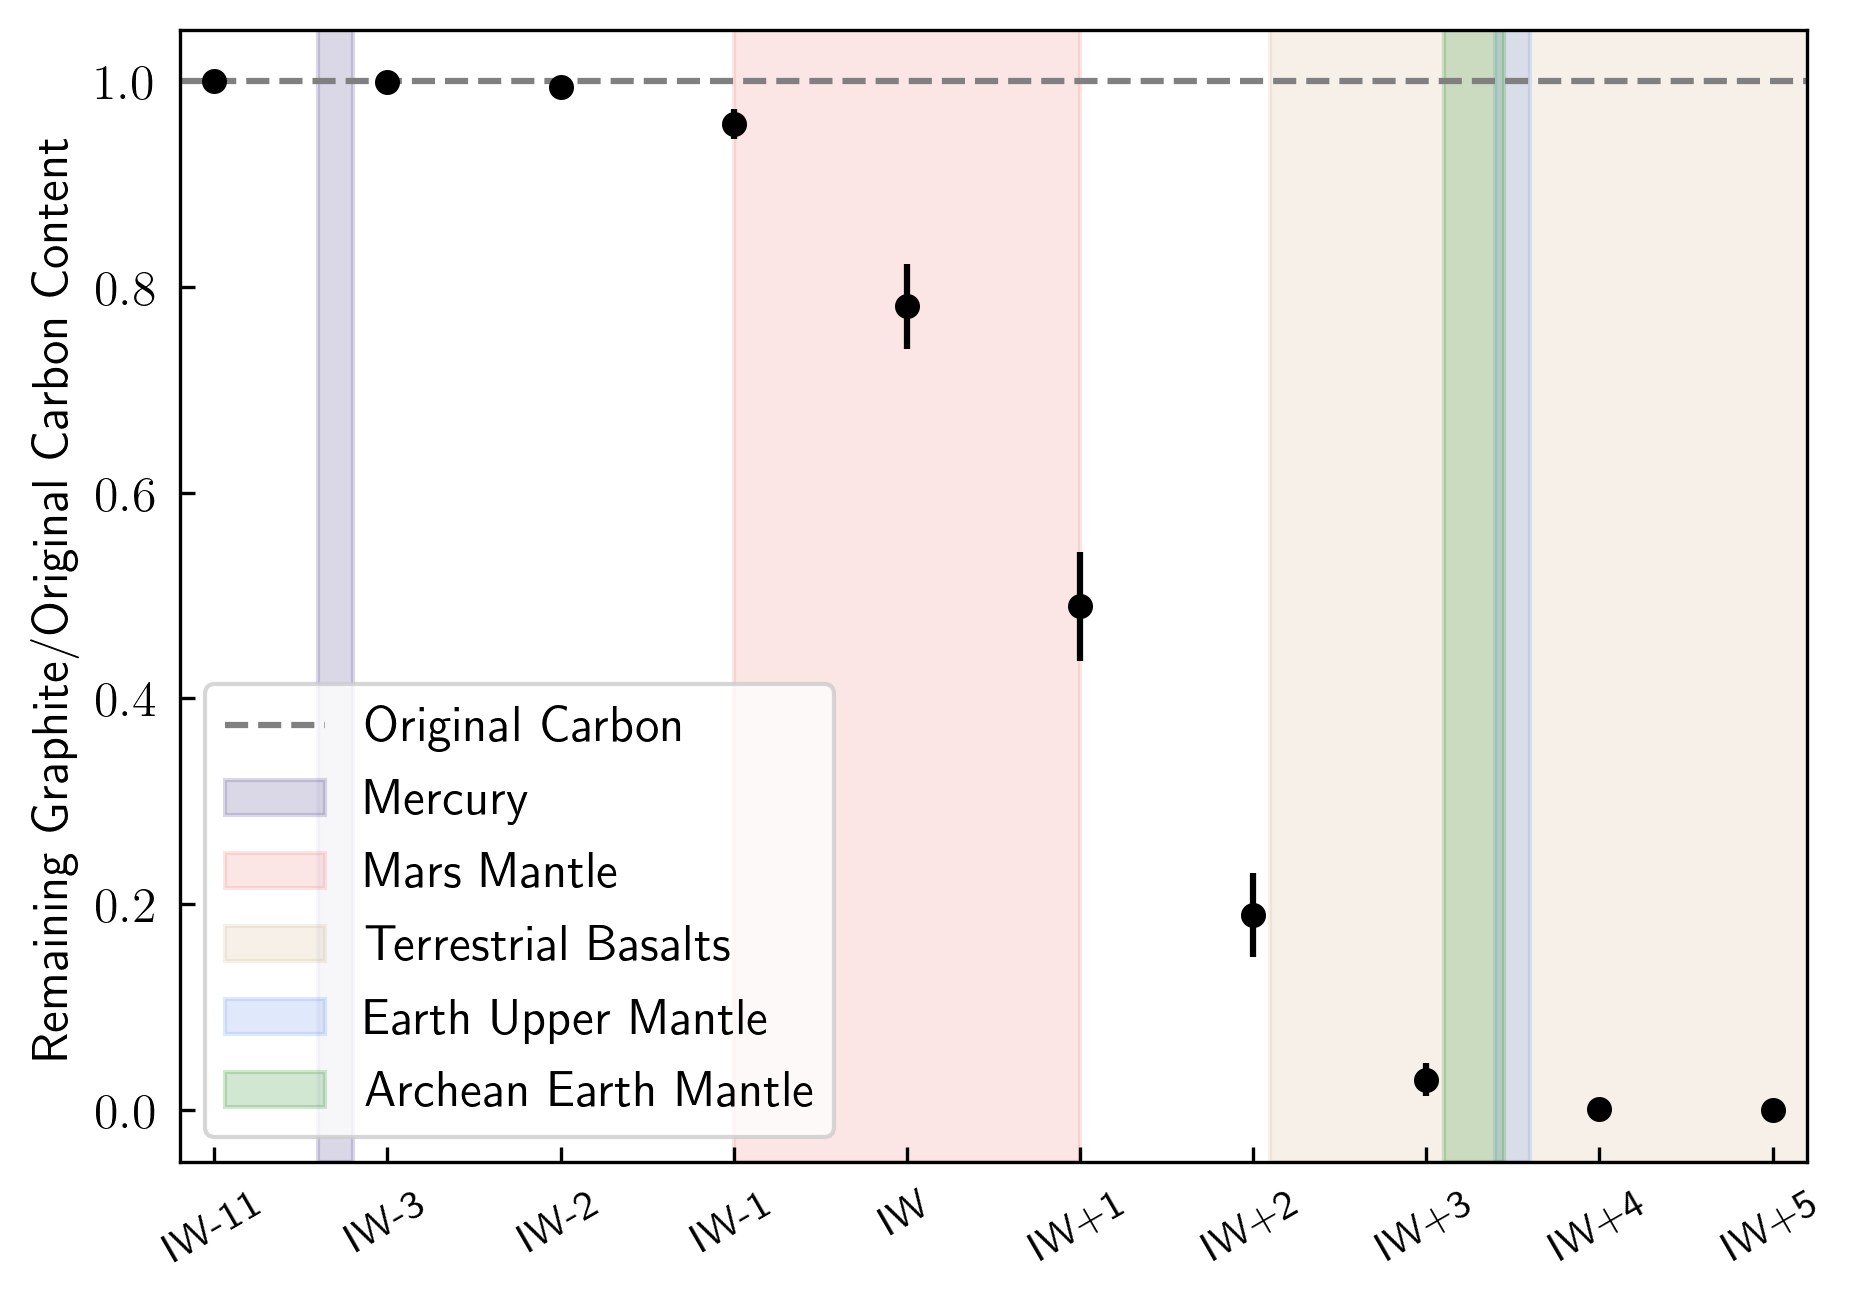

In [21]:


fig, ax =plt.subplots()

plt.errorbar(1, np.mean(IWm11_Ratio), yerr=IWm11_confidenceInt95_Ratio[1]-IWm11_confidenceInt95_Ratio[0], marker='.', ms=10, color='black')
plt.errorbar(2, np.mean(IWm3_Ratio), yerr=IWm3_confidenceInt95_Ratio[1]-IWm3_confidenceInt95_Ratio[0], marker='.', ms=10, color='black')
plt.errorbar(3, np.mean(IWm2_Ratio), yerr=IWm2_confidenceInt95_Ratio[1]-IWm2_confidenceInt95_Ratio[0], marker='.', ms=10, color='black')
plt.errorbar(4, np.mean(IWm1_Ratio), yerr=IWm1_confidenceInt95_Ratio[1]-IWm1_confidenceInt95_Ratio[0], marker='.', ms=10, color='black')
plt.errorbar(5, np.mean(IW_Ratio), yerr=IW_confidenceInt95_Ratio[1]-IW_confidenceInt95_Ratio[0], marker='.', ms=10, color='black')
plt.errorbar(6, np.mean(IWp1_Ratio), yerr=IWp1_confidenceInt95_Ratio[1]-IWp1_confidenceInt95_Ratio[0], marker='.', ms=10, color='black')
plt.errorbar(7, np.mean(IWp2_Ratio), yerr=IWp2_confidenceInt95_Ratio[1]-IWp2_confidenceInt95_Ratio[0], marker='.', ms=10, color='black')
plt.errorbar(8, np.mean(IWp3_Ratio), yerr=IWp3_confidenceInt95_Ratio[1]-IWp3_confidenceInt95_Ratio[0], marker='.', ms=10, color='black')
plt.errorbar(9, np.mean(IWp4_Ratio), yerr=IWp4_confidenceInt95_Ratio[1]-IWp4_confidenceInt95_Ratio[0], marker='.', ms=10, color='black')
plt.errorbar(10, np.mean(IWp5_Ratio), yerr=IWp5_confidenceInt95_Ratio[1]-IWp5_confidenceInt95_Ratio[0], marker='.', ms=10, color='black')
ax.axhline(y=1, xmin=0, xmax=10, linestyle='--', color='gray', label='Original Carbon')
ax.axvspan(1.6, 1.8, alpha=0.2, color='darkslateblue', label='Mercury')
ax.axvspan(4.0,6.0, alpha=0.2, color='lightcoral', label='Mars Mantle')
ax.axvspan(7.1, 11, alpha=0.2, color='tan', label='Terrestrial Basalts')
ax.axvspan(8.4, 8.6, alpha=0.2, color='cornflowerblue', label='Earth Upper Mantle')
ax.axvspan(8.1, 8.45, alpha=0.2, color='forestgreen', label='Archean Earth Mantle')
#ax.axvspan(2.5, 4.5, alpha=0.2, color='tan', label='Most Solar System Rocky Bodies')
ax.set_xticks(Y)
ax.set_xticklabels(X_names, rotation=30, fontsize=10)
plt.xlim(0.8,10.2)
plt.legend()
#plt.yscale('log')
#plt.ylim(0,1.1)
plt.ylabel('Remaining Graphite/Original Carbon Content')
plt.savefig('RemainingGraphiteoverOGCarbon_Updated.jpg', dpi=1000)
plt.show()

In [ ]:
#Archean Mantle fO2 Estimate:
ArcheanFMQ_Min = -0.8661971830985915
ArcheanFMQ_Max = -0.549295774647887
ArcheanFMQ_Avg = -0.7077464788732395
 